# **London Property Pricing: To What Extent Has COVID-19 Had An Impact**

## **Context**

First we try to look at how london property prices have changed in the last decade.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

### Property Data

Loading the Property Price dataset for London as a whole.

In [2]:
prop_price_df = pd.read_csv('Data Sets/Housing Price GOV/ukhpi-london-from-2010-01-01-to-2020-11-01.csv')

prop_price_df.head()

Name                                               URI Region GSS code  \
0  London  http://landregistry.data.gov.uk/id/region/london       E12000007   
1  London  http://landregistry.data.gov.uk/id/region/london       E12000007   
2  London  http://landregistry.data.gov.uk/id/region/london       E12000007   
3  London  http://landregistry.data.gov.uk/id/region/london       E12000007   
4  London  http://landregistry.data.gov.uk/id/region/london       E12000007   

    Period  Sales volume Reporting period  Average price All property types  \
0  2010-01        6212.0          monthly                            279724   
1  2010-02        6312.0          monthly                            278753   
2  2010-03        7308.0          monthly                            280472   
3  2010-04        7032.0          monthly                            281981   
4  2010-05        7106.0          monthly                            281762   

   Percentage change (yearly) All property types  \
0                                          10.52   
1                                          11.57   
2                                          13.43   
3                                          14.93   
4                                          12.71   

   Percentage change (monthly) All property types  \
0                                            3.56   
1                                           -0.35   
2                                            0.62   
3                                            0.54   
4                                           -0.08   

   House price index All property types  ...  \
0                                 69.44  ...   
1                                 69.20  ...   
2                                 69.62  ...   
3                                 70.00  ...   
4                                 69.94  ...   

   Percentage change (yearly) New build  \
0                                 -0.05   
1                                  6.02   
2                                  8.07   
3                                  9.39   
4                                  7.42   

   Percentage change (monthly) New build  House price index New build  \
0                                  -0.78                        64.12   
1                                   4.76                        67.17   
2                                   1.28                        68.03   
3                                  -1.09                        67.29   
4                                  -1.23                        66.46   

   Sales volume New build  Average price Existing properties  \
0                   586.0                           281423.0   
1                   543.0                           279313.0   
2                   763.0                           280886.0   
3                   543.0                           282771.0   
4                   699.0                           282817.0   

   Percentage change (yearly) Existing properties  \
0                                           11.65   
1                                           12.26   
2                                           14.12   
3                                           15.60   
4                                           13.32   

   Percentage change (monthly) Existing properties  \
0                                             4.00   
1                                            -0.75   
2                                             0.56   
3                                             0.67   
4                                             0.02   

   House price index Existing properties  Sales volume Existing properties  \
0                                  69.93                            5626.0   
1                                  69.41                            5769.0   
2                                  69.80                            6545.0   
3                                  70.27                            6489.0   
4                

The below is a month on month look at average prices for all property types from January 2010 to September 2020.

It was important to change the 'Period' column into a datetime object to carry out date-based data extraction.

Text(0, 0.5, 'Average Price')

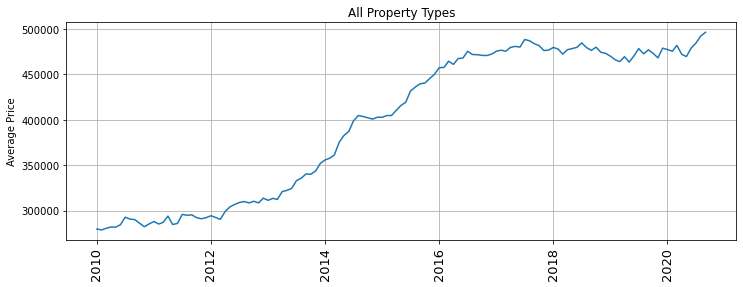

In [3]:
prop_price_df['Period'] = pd.to_datetime(prop_price_df['Period'])

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plt.plot(prop_price_df['Period'],prop_price_df['Average price All property types'])
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)
ax.set_title('All Property Types')
ax.set_ylabel('Average Price')

Percentage change month on month in price for all property types.

Text(0, 0.5, 'Average Price % Change (Monthly)')

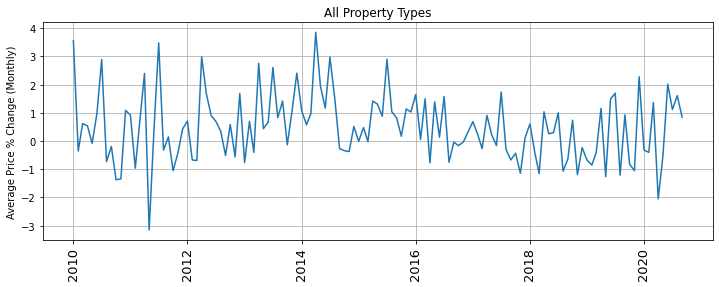

In [4]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plt.plot(prop_price_df['Period'],prop_price_df['Percentage change (monthly) All property types'])
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)
ax.set_title('All Property Types')
ax.set_ylabel('Average Price % Change (Monthly)')

Percentage change (yearly) of price for all property types.

Text(0, 0.5, 'Average Price % Change (Yearly)')

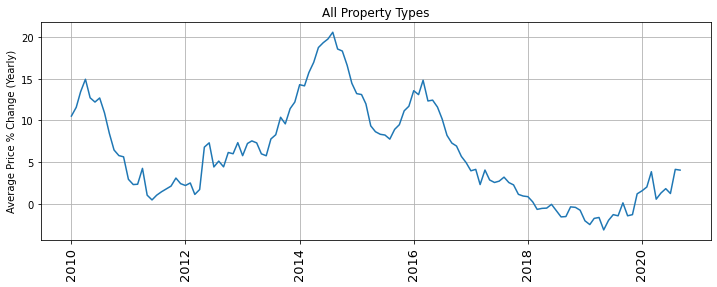

In [5]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plt.plot(prop_price_df['Period'],prop_price_df['Percentage change (yearly) All property types'])
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)
ax.set_title('All Property Types')
ax.set_ylabel('Average Price % Change (Yearly)')

Below we are looking at the average price for January 2010 and January 2020 for London as a whole and calculating the % increased.

In [6]:
prop_price_df2010 = prop_price_df.loc[(prop_price_df['Period']== '2010-01-01')]
prop_price_df2010 = prop_price_df2010['Average price All property types']
prop_price_df2020 = prop_price_df.loc[(prop_price_df['Period']== '2020-01-01')]
prop_price_df2020 = prop_price_df2020['Average price All property types']

print('Average Property Price for London January 2010: ', prop_price_df2010.values)
print('Average Property Price for London January 2020: ', prop_price_df2020.values)

Diff = prop_price_df2020.values-prop_price_df2010.values
pct_change = Diff/prop_price_df2020.values
pct_change = pct_change*100

print('Property Price change since 2010: ', pct_change,'%')


Average Property Price for London January 2010:  [279724]
Average Property Price for London January 2020:  [477440]
Property Price change since 2010:  [41.41169571] %


Below we are visualising on a time lime the average property price for each year to more clearly see the difference year to year.

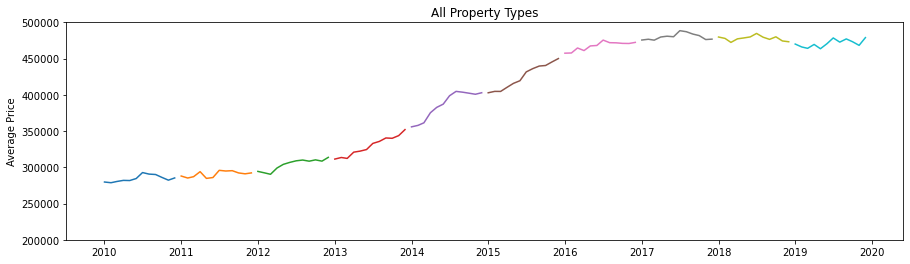

In [7]:
#prop_price_df['Period'] = pd.to_datetime(prop_price_df['Period'])

# To adjust the sample to get to the right time period the first 121 rows must be removed.
#prop_price_df = prop_price_df.drop(prop_price_df.head(121).index)
#prop_price_df__2010 = prop_price_df.drop(prop_price_df.head(2).index)
prop_price_df__2010 = prop_price_df.drop(prop_price_df.tail(117).index)

prop_price_df__2010

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

#fig = plt.figure(figsize=(12,4))
#ax = fig.add_subplot(111)
ax1.plot(prop_price_df__2010['Period'],prop_price_df__2010['Average price All property types'])
ax1.set_title('All Property Types')
ax1.set_ylabel('Average Price')
ax1.set_ylim(200000, 500000)

prop_price_df__2011_head = prop_price_df.drop(prop_price_df.head(12).index)
prop_price_df__2011 = prop_price_df__2011_head.drop(prop_price_df.tail(105).index)

prop_price_df__2011
ax1.plot(prop_price_df__2011['Period'],prop_price_df__2011['Average price All property types'])

#f, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(25, 4))

prop_price_df__2012_head = prop_price_df.drop(prop_price_df.head(24).index)
prop_price_df__2012 = prop_price_df__2012_head.drop(prop_price_df.tail(93).index)

prop_price_df__2012
ax1.plot(prop_price_df__2012['Period'],prop_price_df__2012['Average price All property types'])

prop_price_df__2013_head = prop_price_df.drop(prop_price_df.head(36).index)
prop_price_df__2013 = prop_price_df__2013_head.drop(prop_price_df.tail(81).index)

prop_price_df__2013
ax1.plot(prop_price_df__2013['Period'],prop_price_df__2013['Average price All property types'])


prop_price_df__2014_head = prop_price_df.drop(prop_price_df.head(48).index)
prop_price_df__2014 = prop_price_df__2014_head.drop(prop_price_df.tail(69).index)

prop_price_df__2014
ax1.plot(prop_price_df__2014['Period'],prop_price_df__2014['Average price All property types'])

prop_price_df__2015_head = prop_price_df.drop(prop_price_df.head(60).index)
prop_price_df__2015 = prop_price_df__2015_head.drop(prop_price_df.tail(57).index)

prop_price_df__2015
ax1.plot(prop_price_df__2015['Period'],prop_price_df__2015['Average price All property types'])

prop_price_df__2016_head = prop_price_df.drop(prop_price_df.head(72).index)
prop_price_df__2016 = prop_price_df__2016_head.drop(prop_price_df.tail(45).index)

prop_price_df__2016
ax1.plot(prop_price_df__2016['Period'],prop_price_df__2016['Average price All property types'])

prop_price_df__2017_head = prop_price_df.drop(prop_price_df.head(84).index)
prop_price_df__2017 = prop_price_df__2017_head.drop(prop_price_df.tail(33).index)

prop_price_df__2017
ax1.plot(prop_price_df__2017['Period'],prop_price_df__2017['Average price All property types'])

prop_price_df__2018_head = prop_price_df.drop(prop_price_df.head(96).index)
prop_price_df__2018 = prop_price_df__2018_head.drop(prop_price_df.tail(21).index)

prop_price_df__2018
ax1.plot(prop_price_df__2018['Period'],prop_price_df__2018['Average price All property types'])

prop_price_df__2019_head = prop_price_df.drop(prop_price_df.head(108).index)
prop_price_df__2019 = prop_price_df__2019_head.drop(prop_price_df.tail(9).index)

prop_price_df__2019
ax1.plot(prop_price_df__2019['Period'],prop_price_df__2019['Average price All property types'])

Below also wanted to see the difference between property prices for January 2012 (When prices started to substantially increase) and January 2017 (when prices started to plateau).

In [8]:
prop_price_df__2012_head = prop_price_df.drop(prop_price_df.head(24).index)
prop_price_df__2012 = prop_price_df__2012_head.drop(prop_price_df.tail(93).index)


prop_price_df__2012_01 = prop_price_df__2012.loc[(prop_price_df__2012['Period']== '2012-01-01')]
prop_price_df__2012_01 = prop_price_df__2012_01['Average price All property types']

prop_price_df__2017_01 = prop_price_df__2017.loc[(prop_price_df__2017['Period']== '2017-01-01')]
prop_price_df__2017_01 = prop_price_df__2017_01['Average price All property types']

print('January 2012: ', prop_price_df__2012_01.values)
print('January 2017: ', prop_price_df__2017_01.values)

print('% Change in price between 2012 and 2017: ', ((475619-294360)/475619)*100)

January 2012:  [294360]
January 2017:  [475619]
% Change in price between 2012 and 2017:  38.110125962167196


### COVID-19 Data 

First we load the Covid-19 dataset for London as a whole.

In [9]:
total_london_covid = pd.read_csv('Data Sets/COVID/data_2020-Nov-26.csv')

total_london_covid.head()

areaType areaName   areaCode        date  newCasesBySpecimenDate  \
0   region   London  E12000007  2020-11-25                      68   
1   region   London  E12000007  2020-11-24                    1402   
2   region   London  E12000007  2020-11-23                    2289   
3   region   London  E12000007  2020-11-22                    1505   
4   region   London  E12000007  2020-11-21                    1491   

   cumCasesBySpecimenDate  
0                  153858  
1                  153790  
2                  152388  
3                  150099  
4                  148594

The visualised data below shows the number of new COVID-19 cases on a daily basis.

It was important to change the 'date' column into a datetime object to carry out date-based data extraction.

Text(0.5, 1.0, 'Daily New Cases')

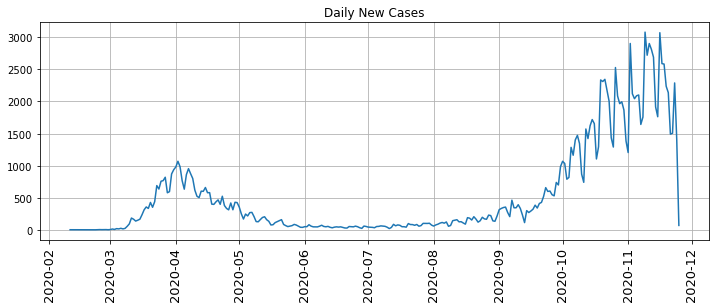

In [10]:
total_london_covid['date'] = pd.to_datetime(total_london_covid['date'])

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plt.plot(total_london_covid['date'],total_london_covid['newCasesBySpecimenDate'])
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)
ax.set_title('Daily New Cases')

## **Analysis**

#### **Data Preparation**

**The property price data set only includes complete property price data up until 2020/07.**

Most of the missing data does not affect the analysis, however, there is missing data for sales volume for 2020/08 and 2020/09 therefore this data has been removed.

In [12]:
prop_price_df.isna().sum()

Name                                                   0
URI                                                    0
Region GSS code                                        0
Period                                                 0
Sales volume                                           2
Reporting period                                       0
Average price All property types                       0
Percentage change (yearly) All property types          0
Percentage change (monthly) All property types         0
House price index All property types                   0
Sales volume All property types                        2
Average price Detached houses                          0
Percentage change (yearly) Detached houses             0
Percentage change (monthly) Detached houses            0
House price index Detached houses                      0
Average price Semi-detached houses                     0
Percentage change (yearly) Semi-detached houses        0
Percentage change (monthly) Sem

In [13]:
# 512 entries in the data set have null values, however most of these do not affect the data used for the analysis.
prop_price_df.isna().sum().sum()

512

Below we can see that there are no missing values for the column Period and Average price all property types which we will be using considerably, therefore at first glance there does not seem to be any missing data that could affect the analysis.

In [14]:
prop_price_df['Period'].isna().sum()

0

In [15]:
prop_price_df['Average price All property types'].isna().sum()

0

Upon further inspection of the property price data set it became clear that some of the missing values could potentially affect the 2020/08 and 2020/09 therefore this data has been removed below.

In [16]:
# Removing the last 2 entries in the data set which contain 2020/08 and 2020/09.

prop_price_df = prop_price_df[:127]

I have also gathered individual data sets for each London borough containing property price information. For convenience and further analysis at a later date I have used the code below which will parse through each csv file and combine the data into a singular csv file.

Please note: I have commented out the code as running it again will create a further csv file.

In [17]:
# Combining property datasets for all London boroughs.

import csv
import glob


#filenames = [i for i in glob.glob("Data Sets/Property Data for all boroughs/ukhpi*.csv")]
#header_keys = []
#merged_rows = []

#for filename in filenames:
#    with open(filename) as f:
#        reader = csv.DictReader(f)
#        merged_rows.extend(list(reader))
#        header_keys.extend([key for key in reader.fieldnames if key not in header_keys])
#
#with open("UKHPI_Combined.csv", "w") as f:
#    w = csv.DictWriter(f, fieldnames=header_keys)
#    w.writeheader()
#    w.writerows(merged_rows)

Below I am loading the newly created combined file to confirm the data has been correctly combined.

In [18]:
UKHPI_Combined = pd.read_csv('UKHPI_Combined.csv')

UKHPI_Combined.head()
#UKHPI_Combined['Name'].unique()

Name                                                URI  \
0  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
1  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
2  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
3  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
4  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   

  Region GSS code   Period  Sales volume Reporting period  \
0       E09000002  2010-01          73.0          monthly   
1       E09000002  2010-02         105.0          monthly   
2       E09000002  2010-03         134.0          monthly   
3       E09000002  2010-04         123.0          monthly   
4       E09000002  2010-05         124.0          monthly   

   Average price All property types  \
0                            162905   
1                            163023   
2                            162831   
3                            162756   
4                            164903   

   Percentage change (yearly) All property types  \
0                                          -2.33   
1                                           0.71   
2                                           3.84   
3                                           6.93   
4                                          11.10   

   Percentage change (monthly) All property types  \
0                                            1.25   
1                                            0.07   
2                                           -0.12   
3                                           -0.05   
4                                            1.32   

   House price index All property types  ...  \
0                                 74.02  ...   
1                                 74.08  ...   
2                                 73.99  ...   
3                                 73.96  ...   
4                                 74.93  ...   

   Percentage change (yearly) New build  \
0                                 -7.60   
1                                 -5.21   
2                                 -2.89   
3                                  1.11   
4                                  5.32   

   Percentage change (monthly) New build  House price index New build  \
0                                  -0.55                        73.18   
1                                   0.32                        73.42   
2                                   0.70                        73.93   
3                                   1.32                        74.90   
4                                   1.51                        76.03   

   Sales volume New build  Average price Existing properties  \
0                     1.0                           161138.0   
1                     0.0                           161146.0   
2                     4.0                           160718.0   
3                    15.0                           160371.0   
4                    24.0                           162450.0   

   Percentage change (yearly) Existing properties  \
0                                           -1.80   
1                                            1.25   
2                                            4.37   
3                                            7.32   
4                                           11.46   

   Percentage change (monthly) Existing properties  \
0                                             1.43   
1                                             0.01   
2                                            -0.27   
3                                            -0.22   
4                                             1.30   

   House price index Existing properties  Sales volume Existing properties  \
0                                  74.22                              72.0   
1                                  74.22                             105.0   
2                                  74.03                          

This shows we have combined the data correctly and although the graph below is not clear it does show that the data is all there.

We will be using this data for further analysis later.

Text(0, 0.5, 'Average Price')

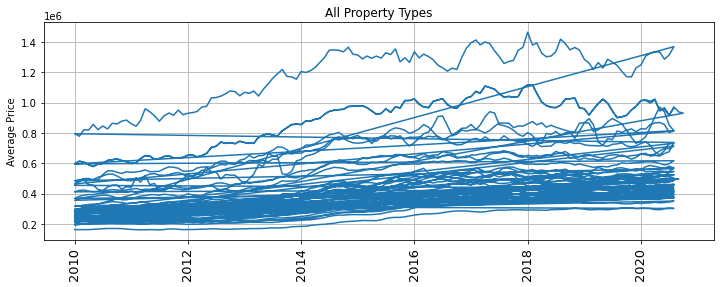

In [19]:
UKHPI_Combined['Period'] = pd.to_datetime(UKHPI_Combined['Period'])

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plt.plot(UKHPI_Combined['Period'],UKHPI_Combined['Average price All property types'])
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)
ax.set_title('All Property Types')
ax.set_ylabel('Average Price')

Below we are cleaning the dataset as it has duplicates and conflicting entries.

In [20]:

UKHPI_Combined_Clean = UKHPI_Combined

UKHPI_Combined_london = UKHPI_Combined_Clean.loc[(UKHPI_Combined_Clean['Name']=='London')]
UKHPI_Combined_Clean = UKHPI_Combined_Clean.drop([3074,3075,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085])


UKHPI_Combined_westminster = UKHPI_Combined_Clean.loc[(UKHPI_Combined_Clean['Name']=='City of Westminster')]
UKHPI_Combined_Clean = UKHPI_Combined_Clean.drop([896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,916,915,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025])

UKHPI_Combined_city = UKHPI_Combined_Clean.loc[(UKHPI_Combined_Clean['Name']=='City of London')]
UKHPI_Combined_Clean = UKHPI_Combined_Clean.drop([768,769])

UKHPI_Combined_city

#prop_2020_04 = prop_2020_04.drop([3074:3085]) # Removed invalid entry London
#prop_2020_04 = prop_2020_04.drop([891])  # Removed city of london due to duplicate.
#prop_2020_04 = prop_2020_04.drop([1661]) # Removed Hackney due to conflict.
#prop_2020_04 = prop_2020_04.drop([1019]) # Removed City of Westminster due to duplicate entry.
#df.drop(df.index[3:5])

Name                                                URI  \
768  City of London  http://landregistry.data.gov.uk/id/region/city...   
769  City of London  http://landregistry.data.gov.uk/id/region/city...   
770  City of London  http://landregistry.data.gov.uk/id/region/city...   
771  City of London  http://landregistry.data.gov.uk/id/region/city...   
772  City of London  http://landregistry.data.gov.uk/id/region/city...   
..              ...                                                ...   
891  City of London  http://landregistry.data.gov.uk/id/region/city...   
892  City of London  http://landregistry.data.gov.uk/id/region/city...   
893  City of London  http://landregistry.data.gov.uk/id/region/city...   
894  City of London  http://landregistry.data.gov.uk/id/region/city...   
895  City of London  http://landregistry.data.gov.uk/id/region/city...   

    Region GSS code     Period  Sales volume Reporting period  \
768       E09000001 2010-01-01          20.0          monthly   
769       E09000001 2010-02-01           9.0          monthly   
770       E09000001 2010-03-01          15.0          monthly   
771       E09000001 2010-04-01          22.0          monthly   
772       E09000001 2010-05-01          21.0          monthly   
..              ...        ...           ...              ...   
891       E09000001 2020-04-01           5.0          monthly   
892       E09000001 2020-05-01           5.0          monthly   
893       E09000001 2020-06-01           3.0          monthly   
894       E09000001 2020-07-01           NaN          monthly   
895       E09000001 2020-08-01           NaN          monthly   

     Average price All property types  \
768                            464436   
769                            490525   
770                            498241   
771                            458246   
772                            454928   
..                                ...   
891                            909210   
892                            970998   
893                            938833   
894                            852151   
895                            814665   

     Percentage change (yearly) All property types  \
768                                          16.02   
769                                          24.70   
770                                          24.80   
771                                          32.69   
772                                          21.80   
..                                             ...   
891                                          23.02   
892                                          34.90   
893                                          23.30   
894                                          12.77   
895                                           0.22   

     Percentage change (monthly) All property types  \
768                                           12.74   
769                                            5.62   
770                                            1.57   
771                                           -8.03   
772                                           -0.72   
..                                              ...   
891                                            8.69   
892                                            6.80   
893                                           -3.31   
894                                           -9.23   
895                                           -4.40   

     House price index All property types  ...  \
768                                 59.26  ...   
769                                 62.59  ...   
770                                 63.58  ...   
771                                 58.47  ...   
772                                 58.05  ...   
..                                    ...  ...   
891                                116.02  ...   
892                                123.90  ...   
893                                119.80  ...   
894                                108.74 

Now that we have combined all the data sets we can more easily have a look at where there are null values.

In [21]:
UKHPI_Combined.isna().sum()

Name                                                     0
URI                                                      0
Region GSS code                                          0
Period                                                   0
Sales volume                                            70
Reporting period                                         0
Average price All property types                         0
Percentage change (yearly) All property types            0
Percentage change (monthly) All property types           0
House price index All property types                     0
Sales volume All property types                         70
Average price Detached houses                          128
Percentage change (yearly) Detached houses             128
Percentage change (monthly) Detached houses            128
House price index Detached houses                      128
Average price Semi-detached houses                     128
Percentage change (yearly) Semi-detached houses        1

In [22]:
UKHPI_Combined.tail()

Name                                                URI  \
4361  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   
4362  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   
4363  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   
4364  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   
4365  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   

     Region GSS code     Period  Sales volume Reporting period  \
4361       E09000033 2020-04-01          85.0          monthly   
4362       E09000033 2020-05-01          57.0          monthly   
4363       E09000033 2020-06-01          74.0          monthly   
4364       E09000033 2020-07-01           NaN          monthly   
4365       E09000033 2020-08-01           NaN          monthly   

      Average price All property types  \
4361                           1015602   
4362                            948798   
4363                            966149   
4364                            916843   
4365                            963725   

      Percentage change (yearly) All property types  \
4361                                           2.19   
4362                                          -7.17   
4363                                          -3.01   
4364                                          -2.97   
4365                                           7.00   

      Percentage change (monthly) All property types  \
4361                                            1.92   
4362                                           -6.58   
4363                                            1.83   
4364                                           -5.10   
4365                                            5.11   

      House price index All property types  ...  \
4361                                103.99  ...   
4362                                 97.15  ...   
4363                                 98.92  ...   
4364                                 93.88  ...   
4365                                 98.68  ...   

      Percentage change (yearly) New build  \
4361                                  2.42   
4362                                 -5.14   
4363                                 -1.29   
4364                                   NaN   
4365                                   NaN   

      Percentage change (monthly) New build  House price index New build  \
4361                                   1.64                       110.99   
4362                                  -5.62                       104.75   
4363                                   0.62                       105.40   
4364                                    NaN                          NaN   
4365                                    NaN                          NaN   

      Sales volume New build  Average price Existing properties  \
4361                     6.0                          1002927.0   
4362                     1.0                           936156.0   
4363                     2.0                           954233.0   
4364                     NaN                                NaN   
4365                     NaN                                NaN   

      Percentage change (yearly) Existing properties  \
4361                                            1.83   
4362                                           -7.78   
4363                                           -3.74   
4364                                             NaN   
4365                                             NaN   

      Percentage change (monthly) Existing properties  \
4361                                             1.94   
4362                                            -6.66   
4363                                             1.93   
4364                                              NaN   
4365                                              NaN   

      House price index Existing properties  Sales volume Existing properties  \
4361             

Once again as we had done with the previous data set for London as a whole there is data missing for 2020-07 and 2020-08 therefore these have also been removed from this data set using the code below.

In [23]:
UKHPI_Combined = UKHPI_Combined.drop(UKHPI_Combined.tail(2).index)

UKHPI_Combined.tail()

Name                                                URI  \
4359  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   
4360  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   
4361  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   
4362  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   
4363  City of Westminster  http://landregistry.data.gov.uk/id/region/city...   

     Region GSS code     Period  Sales volume Reporting period  \
4359       E09000033 2020-02-01         137.0          monthly   
4360       E09000033 2020-03-01         168.0          monthly   
4361       E09000033 2020-04-01          85.0          monthly   
4362       E09000033 2020-05-01          57.0          monthly   
4363       E09000033 2020-06-01          74.0          monthly   

      Average price All property types  \
4359                           1013740   
4360                            996503   
4361                           1015602   
4362                            948798   
4363                            966149   

      Percentage change (yearly) All property types  \
4359                                          10.45   
4360                                           4.22   
4361                                           2.19   
4362                                          -7.17   
4363                                          -3.01   

      Percentage change (monthly) All property types  \
4359                                           -0.03   
4360                                           -1.70   
4361                                            1.92   
4362                                           -6.58   
4363                                            1.83   

      House price index All property types  ...  \
4359                                103.80  ...   
4360                                102.03  ...   
4361                                103.99  ...   
4362                                 97.15  ...   
4363                                 98.92  ...   

      Percentage change (yearly) New build  \
4359                                  9.51   
4360                                  4.97   
4361                                  2.42   
4362                                 -5.14   
4363                                 -1.29   

      Percentage change (monthly) New build  House price index New build  \
4359                                   0.86                       109.02   
4360                                   0.16                       109.20   
4361                                   1.64                       110.99   
4362                                  -5.62                       104.75   
4363                                   0.62                       105.40   

      Sales volume New build  Average price Existing properties  \
4359                    28.0                          1005926.0   
4360                    16.0                           983848.0   
4361                     6.0                          1002927.0   
4362                     1.0                           936156.0   
4363                     2.0                           954233.0   

      Percentage change (yearly) Existing properties  \
4359                                           10.45   
4360                                            3.77   
4361                                            1.83   
4362                                           -7.78   
4363                                           -3.74   

      Percentage change (monthly) Existing properties  \
4359                                            -0.46   
4360                                            -2.19   
4361                                             1.94   
4362                                            -6.66   
4363                                             1.93   

      House price index Existing properties  Sales volume Existing properties  \
4359             

In [24]:
UKHPI_BARKING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-barking-and-dagenham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BARKING.tail()

Name                                                URI  \
123  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
124  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
125  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
126  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
127  Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   

    Region GSS code   Period  Sales volume Reporting period  \
123       E09000002  2020-04          48.0          monthly   
124       E09000002  2020-05          46.0          monthly   
125       E09000002  2020-06          91.0          monthly   
126       E09000002  2020-07           NaN          monthly   
127       E09000002  2020-08           NaN          monthly   

     Average price All property types  \
123                            295082   
124                            293923   
125                            300595   
126                            304223   
127                            302395   

     Percentage change (yearly) All property types  \
123                                          -0.13   
124                                          -0.43   
125                                           2.29   
126                                           2.35   
127                                           0.98   

     Percentage change (monthly) All property types  \
123                                           -2.30   
124                                           -0.39   
125                                            2.27   
126                                            1.21   
127                                           -0.60   

     House price index All property types  ...  \
123                                134.09  ...   
124                                133.56  ...   
125                                136.59  ...   
126                                138.24  ...   
127                                137.41  ...   

     Percentage change (yearly) New build  \
123                                 -0.14   
124                                  2.39   
125                                  5.21   
126                                   NaN   
127                                   NaN   

     Percentage change (monthly) New build  House price index New build  \
123                                  -2.50                       138.74   
124                                   1.19                       140.39   
125                                   1.40                       142.35   
126                                    NaN                          NaN   
127                                    NaN                          NaN   

     Sales volume New build  Average price Existing properties  \
123                     2.0                           290191.0   
124                     1.0                           288421.0   
125                     1.0                           295318.0   
126                     NaN                                NaN   
127                     NaN                                NaN   

     Percentage change (yearly) Existing properties  \
123                                           -0.22   
124                                           -0.97   
125                                            1.69   
126                                             NaN   
127                                             NaN   

     Percentage change (monthly) Existing properties  \
123                                            -2.27   
124                                            -0.61   
125                                             2.39   
126                                              NaN   
127                                              NaN   

     House price index Existing properties  Sales volume Existing properties  \
123                                 133.66                              46.0   
124       

The last 2 rows of each data set is missing 2020-07 and 2020-08 data which could have an effect on the analysis therefore these will be removed.

Below we are not only removing the null values from 2020-07 and 2020-08 but I am also loading each individual data set for each London borough for to more closely see the differences between them.

To more easily work with the data I have also indexed the 'Period' column and turned it into a datetime object.

In [25]:
# Loading each borough into a dataframe and converting 'Period' column to datetime object and index.

UKHPI_BARKING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-barking-and-dagenham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BARKING.set_index('Period', inplace=True)
UKHPI_BARKING.index = pd.to_datetime(UKHPI_BARKING.index)
#UKHPI_BARKING = UKHPI_BARKING.resample('1M').sum()
UKHPI_BARKING = UKHPI_BARKING.drop(UKHPI_BARKING.tail(2).index)
#

UKHPI_BARNET = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-Barnet-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BARNET.set_index('Period', inplace=True)
UKHPI_BARNET.index = pd.to_datetime(UKHPI_BARNET.index)
#UKHPI_BARNET = UKHPI_BARNET.resample('1M').sum()
UKHPI_BARNET = UKHPI_BARNET.drop(UKHPI_BARNET.tail(2).index)
#

UKHPI_BEXLEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-bexley-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BEXLEY.set_index('Period', inplace=True)
UKHPI_BEXLEY.index = pd.to_datetime(UKHPI_BEXLEY.index)
#UKHPI_BEXLEY = UKHPI_BEXLEY.resample('1M').sum()
UKHPI_BEXLEY = UKHPI_BEXLEY.drop(UKHPI_BEXLEY.tail(2).index)
#

UKHPI_BRENT = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-brent-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BRENT.set_index('Period', inplace=True)
UKHPI_BRENT.index = pd.to_datetime(UKHPI_BRENT.index)
#UKHPI_BRENT = UKHPI_BRENT.resample('1M').sum()
UKHPI_BRENT = UKHPI_BRENT.drop(UKHPI_BRENT.tail(2).index)
#

UKHPI_BROMLEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-bromley-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BROMLEY.set_index('Period', inplace=True)
UKHPI_BROMLEY.index = pd.to_datetime(UKHPI_BROMLEY.index)
#UKHPI_BROMLEY = UKHPI_BROMLEY.resample('1M').sum()
UKHPI_BROMLEY = UKHPI_BROMLEY.drop(UKHPI_BROMLEY.tail(2).index)
#

UKHPI_CAMDEN = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-camden-from-2010-01-01-to-2020-08-01.csv')

UKHPI_CAMDEN.set_index('Period', inplace=True)
UKHPI_CAMDEN.index = pd.to_datetime(UKHPI_CAMDEN.index)
#UKHPI_CAMDEN = UKHPI_CAMDEN.resample('1M').sum()
UKHPI_CAMDEN = UKHPI_CAMDEN.drop(UKHPI_CAMDEN.tail(2).index)
#

UKHPI_CITY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-city-of-london-from-2010-01-01-to-2020-08-01.csv')

UKHPI_CITY.set_index('Period', inplace=True)
UKHPI_CITY.index = pd.to_datetime(UKHPI_CITY.index)
#UKHPI_CITY = UKHPI_CITY.resample('1M').sum()
UKHPI_CITY = UKHPI_CITY.drop(UKHPI_CITY.tail(2).index)
#

UKHPI_HACKNEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hackney-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HACKNEY.set_index('Period', inplace=True)
UKHPI_HACKNEY.index = pd.to_datetime(UKHPI_HACKNEY.index)
#UKHPI_HACKNEY = UKHPI_HACKNEY.resample('1M').sum()
UKHPI_HACKNEY = UKHPI_HACKNEY.drop(UKHPI_HACKNEY.tail(2).index)
#

UKHPI_CROYDON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-croydon-from-2010-01-01-to-2020-08-01.csv')

UKHPI_CROYDON.set_index('Period', inplace=True)
UKHPI_CROYDON.index = pd.to_datetime(UKHPI_CROYDON.index)
#UKHPI_CROYDON = UKHPI_CROYDON.resample('1M').sum()
UKHPI_CROYDON = UKHPI_CROYDON.drop(UKHPI_CROYDON.tail(2).index)
#

UKHPI_EALING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-Ealing-from-2010-01-01-to-2020-08-01.csv')

UKHPI_EALING.set_index('Period', inplace=True)
UKHPI_EALING.index = pd.to_datetime(UKHPI_EALING.index)
#UKHPI_EALING = UKHPI_EALING.resample('1M').sum()
UKHPI_EALING = UKHPI_EALING.drop(UKHPI_EALING.tail(2).index)
#

UKHPI_ENFIELD = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-Enfield-from-2010-01-01-to-2020-08-01.csv')

UKHPI_ENFIELD.set_index('Period', inplace=True)
UKHPI_ENFIELD.index = pd.to_datetime(UKHPI_ENFIELD.index)
#UKHPI_ENFIELD = UKHPI_ENFIELD.resample('1M').sum()
UKHPI_ENFIELD = UKHPI_ENFIELD.drop(UKHPI_ENFIELD.tail(2).index)
#

UKHPI_GREENWICH = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-greenwich-from-2010-01-01-to-2020-08-01.csv')

UKHPI_GREENWICH.set_index('Period', inplace=True)
UKHPI_GREENWICH.index = pd.to_datetime(UKHPI_GREENWICH.index)
#UKHPI_GREENWICH = UKHPI_GREENWICH.resample('1M').sum()
UKHPI_GREENWICH = UKHPI_GREENWICH.drop(UKHPI_GREENWICH.tail(2).index)
#

UKHPI_HAMMERSMITH_FULHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hammersmith-and-fulham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HAMMERSMITH_FULHAM.set_index('Period', inplace=True)
UKHPI_HAMMERSMITH_FULHAM.index = pd.to_datetime(UKHPI_HAMMERSMITH_FULHAM.index)
#UKHPI_HAMMERSMITH_FULHAM = UKHPI_HAMMERSMITH_FULHAM.resample('1M').sum()
UKHPI_HAMMERSMITH_FULHAM = UKHPI_HAMMERSMITH_FULHAM.drop(UKHPI_HAMMERSMITH_FULHAM.tail(2).index)
#

UKHPI_HARINGEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-haringey-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HARINGEY.set_index('Period', inplace=True)
UKHPI_HARINGEY.index = pd.to_datetime(UKHPI_HARINGEY.index)
#UKHPI_HARINGEY = UKHPI_HARINGEY.resample('1M').sum()
UKHPI_HARINGEY = UKHPI_HARINGEY.drop(UKHPI_HARINGEY.tail(2).index)
#

UKHPI_HARROW = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-harrow-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HARROW.set_index('Period', inplace=True)
UKHPI_HARROW.index = pd.to_datetime(UKHPI_HARROW.index)
#UKHPI_HARROW = UKHPI_HARROW.resample('1M').sum()
UKHPI_HARROW = UKHPI_HARROW.drop(UKHPI_HARROW.tail(2).index)
#

UKHPI_HAVERING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-havering-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HAVERING.set_index('Period', inplace=True)
UKHPI_HAVERING.index = pd.to_datetime(UKHPI_HAVERING.index)
#UKHPI_HAVERING = UKHPI_HAVERING.resample('1M').sum()
UKHPI_HAVERING = UKHPI_HAVERING.drop(UKHPI_HAVERING.tail(2).index)
#

UKHPI_HILLINGDON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hillingdon-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HILLINGDON.set_index('Period', inplace=True)
UKHPI_HILLINGDON.index = pd.to_datetime(UKHPI_HILLINGDON.index)
#UKHPI_HILLINGDON = UKHPI_HILLINGDON.resample('1M').sum()
UKHPI_HILLINGDON = UKHPI_HILLINGDON.drop(UKHPI_HILLINGDON.tail(2).index)
#

UKHPI_HOUNSLOW = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hounslow-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HOUNSLOW.set_index('Period', inplace=True)
UKHPI_HOUNSLOW.index = pd.to_datetime(UKHPI_HOUNSLOW.index)
#UKHPI_HOUNSLOW = UKHPI_HOUNSLOW.resample('1M').sum()
UKHPI_HOUNSLOW = UKHPI_HOUNSLOW.drop(UKHPI_HOUNSLOW.tail(2).index)
#

UKHPI_ISLINGTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-islington-from-2010-01-01-to-2020-08-01.csv')

UKHPI_ISLINGTON.set_index('Period', inplace=True)
UKHPI_ISLINGTON.index = pd.to_datetime(UKHPI_ISLINGTON.index)
#UKHPI_ISLINGTON = UKHPI_ISLINGTON.resample('1M').sum()
UKHPI_ISLINGTON = UKHPI_ISLINGTON.drop(UKHPI_ISLINGTON.tail(2).index)
#

UKHPI_KENSINGTON_CHELSEA = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-kensington-and-chelsea-from-2010-01-01-to-2020-08-01.csv')

UKHPI_KENSINGTON_CHELSEA.set_index('Period', inplace=True)
UKHPI_KENSINGTON_CHELSEA.index = pd.to_datetime(UKHPI_KENSINGTON_CHELSEA.index)
#UKHPI_KENSINGTON_CHELSEA = UKHPI_KENSINGTON_CHELSEA.resample('1M').sum()
UKHPI_KENSINGTON_CHELSEA = UKHPI_KENSINGTON_CHELSEA.drop(UKHPI_KENSINGTON_CHELSEA.tail(2).index)
#

UKHPI_KINGSTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-kingston-upon-thames-from-2010-01-01-to-2020-08-01.csv')

UKHPI_KINGSTON.set_index('Period', inplace=True)
UKHPI_KINGSTON.index = pd.to_datetime(UKHPI_KINGSTON.index)
#UKHPI_KINGSTON = UKHPI_KINGSTON.resample('1M').sum()
UKHPI_KINGSTON = UKHPI_KINGSTON.drop(UKHPI_KINGSTON.tail(2).index)
#

UKHPI_LAMBETH = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-lambeth-from-2010-01-01-to-2020-08-01.csv')

UKHPI_LAMBETH.set_index('Period', inplace=True)
UKHPI_LAMBETH.index = pd.to_datetime(UKHPI_LAMBETH.index)
#UKHPI_LAMBETH = UKHPI_LAMBETH.resample('1M').sum()
UKHPI_LAMBETH = UKHPI_LAMBETH.drop(UKHPI_LAMBETH.tail(2).index)
#

UKHPI_LEWISHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-lewisham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_LEWISHAM.set_index('Period', inplace=True)
UKHPI_LEWISHAM.index = pd.to_datetime(UKHPI_LEWISHAM.index)
#UKHPI_LEWISHAM = UKHPI_LEWISHAM.resample('1M').sum()
UKHPI_LEWISHAM = UKHPI_LEWISHAM.drop(UKHPI_LEWISHAM.tail(2).index)
#

UKHPI_MERTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-merton-from-2010-01-01-to-2020-08-01.csv')

UKHPI_MERTON.set_index('Period', inplace=True)
UKHPI_MERTON.index = pd.to_datetime(UKHPI_MERTON.index)
#UKHPI_MERTON = UKHPI_MERTON.resample('1M').sum()
UKHPI_MERTON = UKHPI_MERTON.drop(UKHPI_MERTON.tail(2).index)
#

UKHPI_NEWHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-newham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_NEWHAM.set_index('Period', inplace=True)
UKHPI_NEWHAM.index = pd.to_datetime(UKHPI_NEWHAM.index)
#UKHPI_NEWHAM = UKHPI_NEWHAM.resample('1M').sum()
UKHPI_NEWHAM = UKHPI_NEWHAM.drop(UKHPI_NEWHAM.tail(2).index)
#

UKHPI_REDBRIDGE = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-redbridge-from-2010-01-01-to-2020-08-01.csv')

UKHPI_REDBRIDGE.set_index('Period', inplace=True)
UKHPI_REDBRIDGE.index = pd.to_datetime(UKHPI_REDBRIDGE.index)
#UKHPI_REDBRIDGE = UKHPI_REDBRIDGE.resample('1M').sum()
UKHPI_REDBRIDGE = UKHPI_REDBRIDGE.drop(UKHPI_REDBRIDGE.tail(2).index)
#

UKHPI_RICHMOND = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-richmond-upon-thames-from-2010-01-01-to-2020-08-01.csv')

UKHPI_RICHMOND.set_index('Period', inplace=True)
UKHPI_RICHMOND.index = pd.to_datetime(UKHPI_RICHMOND.index)
#UKHPI_RICHMOND = UKHPI_RICHMOND.resample('1M').sum()
UKHPI_RICHMOND = UKHPI_RICHMOND.drop(UKHPI_RICHMOND.tail(2).index)
#

UKHPI_SOUTHWARK = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-southwark-from-2010-01-01-to-2020-08-01.csv')

UKHPI_SOUTHWARK.set_index('Period', inplace=True)
UKHPI_SOUTHWARK.index = pd.to_datetime(UKHPI_SOUTHWARK.index)
#UKHPI_SOUTHWARK = UKHPI_SOUTHWARK.resample('1M').sum()
UKHPI_SOUTHWARK = UKHPI_SOUTHWARK.drop(UKHPI_SOUTHWARK.tail(2).index)
#

UKHPI_SUTTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-sutton-from-2010-01-01-to-2020-08-01.csv')

UKHPI_SUTTON.set_index('Period', inplace=True)
UKHPI_SUTTON.index = pd.to_datetime(UKHPI_SUTTON.index)
#UKHPI_SUTTON = UKHPI_SUTTON.resample('1M').sum()
UKHPI_SUTTON = UKHPI_SUTTON.drop(UKHPI_SUTTON.tail(2).index)
#

UKHPI_TOWER_HAMLETS = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-tower-hamlets-from-2010-01-01-to-2020-08-01.csv')

UKHPI_TOWER_HAMLETS.set_index('Period', inplace=True)
UKHPI_TOWER_HAMLETS.index = pd.to_datetime(UKHPI_TOWER_HAMLETS.index)
#UKHPI_TOWER_HAMLETS = UKHPI_TOWER_HAMLETS.resample('1M').sum()
UKHPI_TOWER_HAMLETS = UKHPI_TOWER_HAMLETS.drop(UKHPI_TOWER_HAMLETS.tail(2).index)
#

UKHPI_WALTHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-waltham-forest-from-2010-01-01-to-2020-08-01.csv')

UKHPI_WALTHAM.set_index('Period', inplace=True)
UKHPI_WALTHAM.index = pd.to_datetime(UKHPI_WALTHAM.index)
#UKHPI_WALTHAM = UKHPI_WALTHAM.resample('1M').sum()
UKHPI_WALTHAM = UKHPI_WALTHAM.drop(UKHPI_WALTHAM.tail(2).index)
#

UKHPI_WANDSWORTH = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-wandsworth-from-2010-01-01-to-2020-08-01.csv')

UKHPI_WANDSWORTH.set_index('Period', inplace=True)
UKHPI_WANDSWORTH.index = pd.to_datetime(UKHPI_WANDSWORTH.index)
#UKHPI_WANDSWORTH = UKHPI_WANDSWORTH.resample('1M').sum()
UKHPI_WANDSWORTH = UKHPI_WANDSWORTH.drop(UKHPI_WANDSWORTH.tail(2).index)
#

UKHPI_WESTMINSTER = pd.read_csv('ukhpi-city-of-westminster-from-2010-01-01-to-2020-11-01.csv')

UKHPI_WESTMINSTER.set_index('Period', inplace=True)
UKHPI_WESTMINSTER.index = pd.to_datetime(UKHPI_WESTMINSTER.index)
#UKHPI_WESTMINSTER = UKHPI_WESTMINSTER.resample('1M').sum()
UKHPI_WESTMINSTER = UKHPI_WESTMINSTER.drop(UKHPI_WESTMINSTER.tail(2).index)

Now that each dataset has been loaded into a dataframe, a datetime object created and null values removed, we are able to plot each dataset and visualise the results.

NOTE: To better distinguish differences between the visualisations I have set a limit on the Y axis so that they are all on the same scale.

(200000.0, 900000.0)

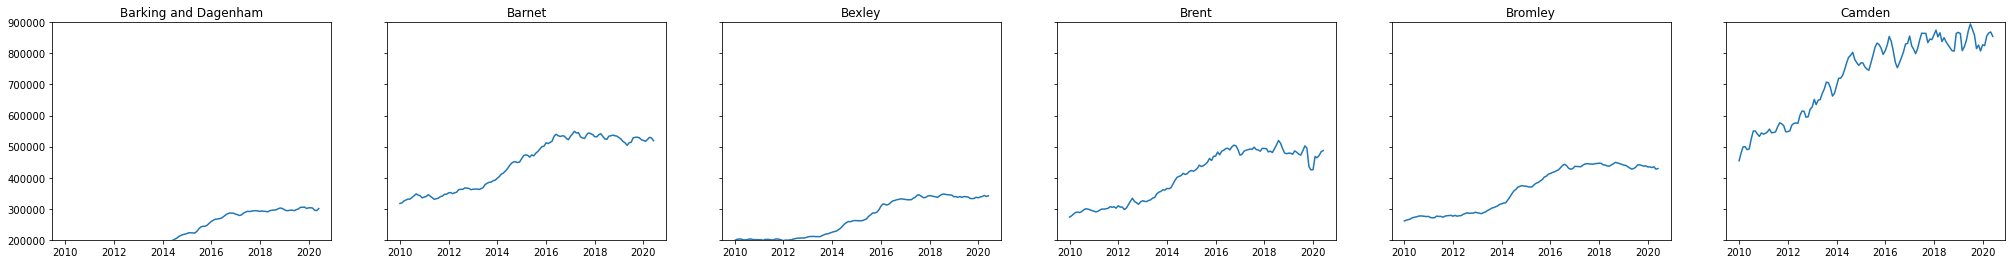

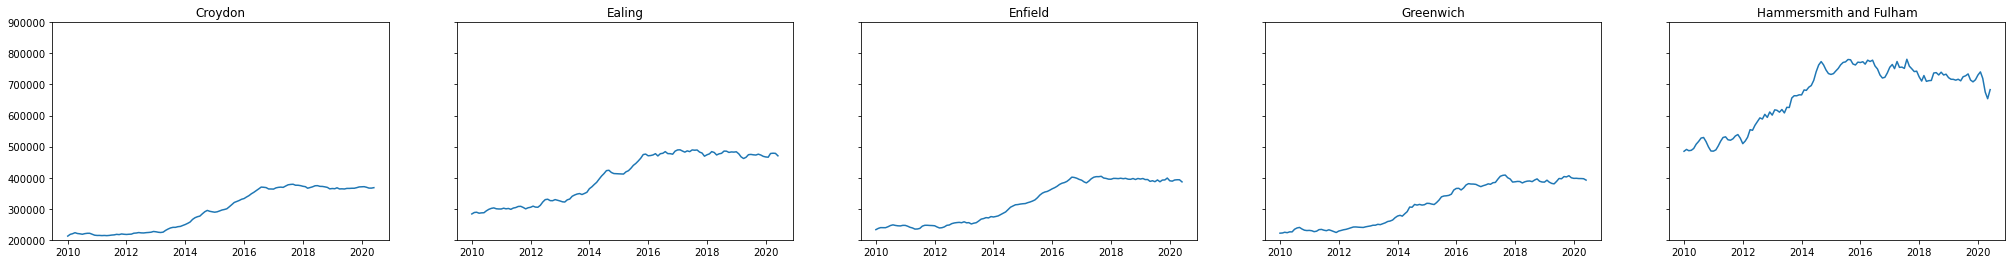

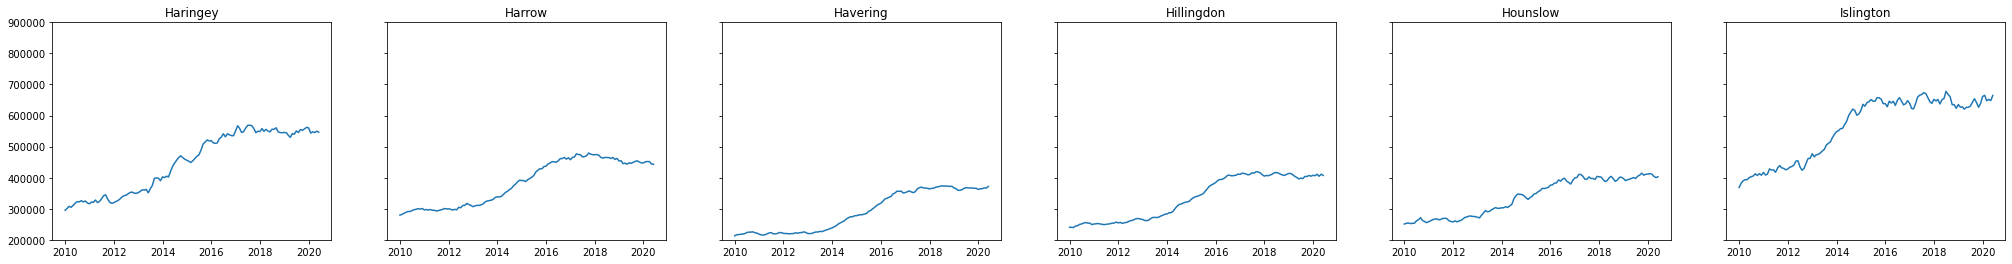

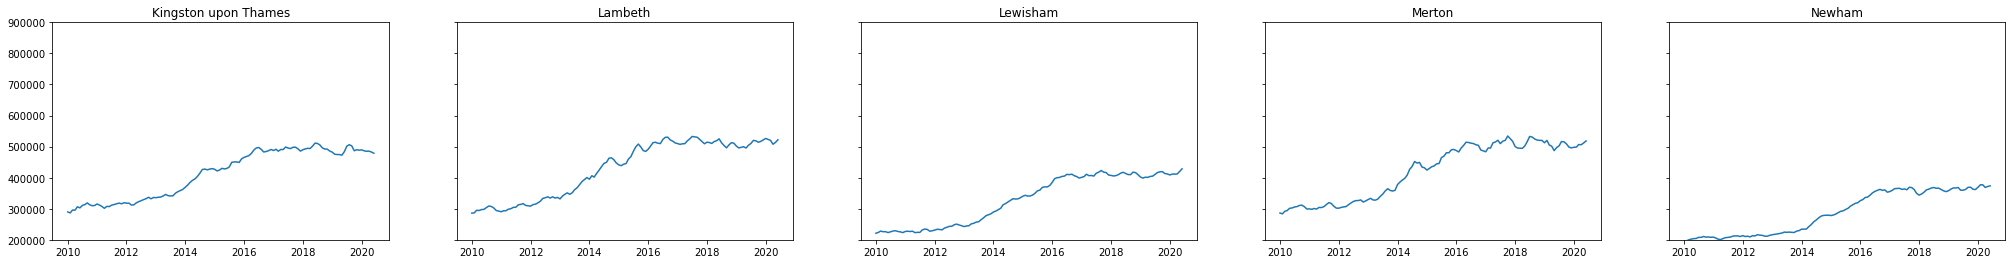

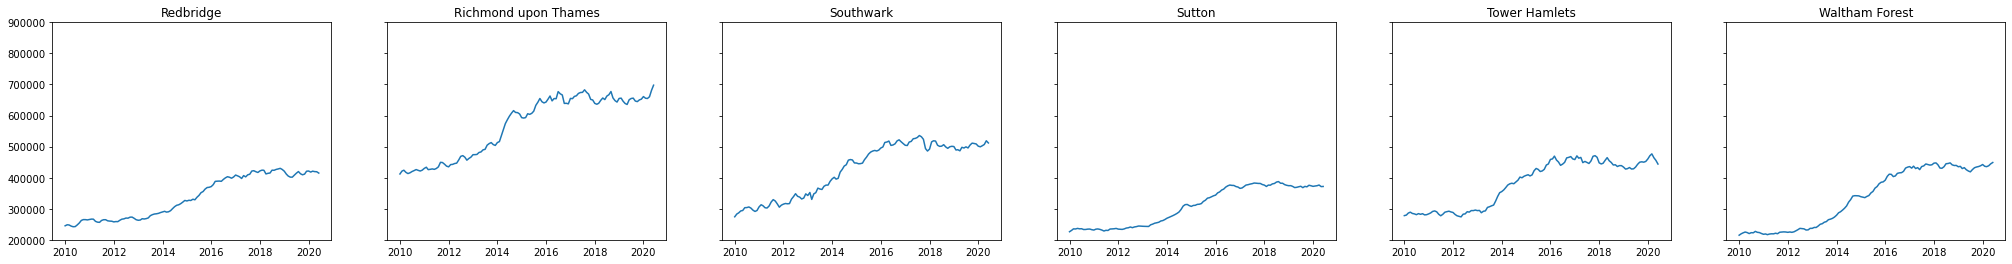

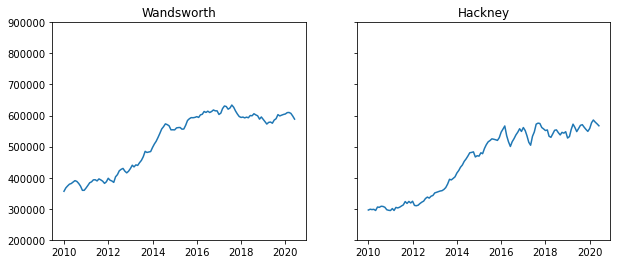

In [26]:
# Now I'm making a grid of subplots, which share a y-axis for each borough.

f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize=(35, 4))

# 
ax1.plot(UKHPI_BARKING.index,UKHPI_BARKING['Average price All property types'])
ax1.set_title('Barking and Dagenham')
ax1.set_ylim(200000, 900000)
# 
ax2.plot(UKHPI_BARNET.index,UKHPI_BARNET['Average price All property types'])
ax2.set_title('Barnet')

#
ax3.plot(UKHPI_BEXLEY.index,UKHPI_BEXLEY['Average price All property types'])
ax3.set_title('Bexley')

#
ax4.plot(UKHPI_BRENT.index,UKHPI_BRENT['Average price All property types'])
ax4.set_title('Brent')

#
ax5.plot(UKHPI_BROMLEY.index,UKHPI_BROMLEY['Average price All property types'])
ax5.set_title('Bromley')

#
ax6.plot(UKHPI_CAMDEN.index,UKHPI_CAMDEN['Average price All property types'])
ax6.set_title('Camden')
#

f, ( ax8, ax9, ax10, ax11, ax12) = plt.subplots(1, 5, sharey=True, figsize=(35, 4))

#
#ax7.plot(UKHPI_CITY.index,UKHPI_CITY['Average price All property types'])
#ax7.set_title('City of London')

#
ax8.plot(UKHPI_CROYDON.index,UKHPI_CROYDON['Average price All property types'])
ax8.set_title('Croydon')
ax8.set_ylim(200000, 900000)
#
ax9.plot(UKHPI_EALING.index,UKHPI_EALING['Average price All property types'])
ax9.set_title('Ealing')

#
ax10.plot(UKHPI_ENFIELD.index,UKHPI_ENFIELD['Average price All property types'])
ax10.set_title('Enfield')

#
ax11.plot(UKHPI_GREENWICH.index,UKHPI_GREENWICH['Average price All property types'])
ax11.set_title('Greenwich')

#
ax12.plot(UKHPI_HAMMERSMITH_FULHAM.index,UKHPI_HAMMERSMITH_FULHAM['Average price All property types'])
ax12.set_title('Hammersmith and Fulham')
#

f, (ax13,ax14,ax15,ax16,ax17,ax18) = plt.subplots(1, 6, sharey=True, figsize=(35, 4))

#

ax13.plot(UKHPI_HARINGEY.index,UKHPI_HARINGEY['Average price All property types'])
ax13.set_title('Haringey')
ax13.set_ylim(200000, 900000)
#
ax14.plot(UKHPI_HARROW.index,UKHPI_HARROW['Average price All property types'])
ax14.set_title('Harrow')

#
ax15.plot(UKHPI_HAVERING.index,UKHPI_HAVERING['Average price All property types'])
ax15.set_title('Havering')

#
ax16.plot(UKHPI_HILLINGDON.index,UKHPI_HILLINGDON['Average price All property types'])
ax16.set_title('Hillingdon')

#
ax17.plot(UKHPI_HOUNSLOW.index,UKHPI_HOUNSLOW['Average price All property types'])
ax17.set_title('Hounslow')

#
ax18.plot(UKHPI_ISLINGTON.index,UKHPI_ISLINGTON['Average price All property types'])
ax18.set_title('Islington')
#

f, ( ax20,ax21,ax22,ax23,ax24) = plt.subplots(1, 5, sharey=True, figsize=(35, 4))

#
#ax19.plot(UKHPI_KENSINGTON_CHELSEA.index,UKHPI_KENSINGTON_CHELSEA['Average price All property types'])
#ax19.set_title('Kensington and Chelsea')

#
ax20.plot(UKHPI_KINGSTON.index,UKHPI_KINGSTON['Average price All property types'])
ax20.set_title('Kingston upon Thames')
ax20.set_ylim(200000, 900000)
#
ax21.plot(UKHPI_LAMBETH.index,UKHPI_LAMBETH['Average price All property types'])
ax21.set_title('Lambeth')

#
ax22.plot(UKHPI_LEWISHAM.index,UKHPI_LEWISHAM['Average price All property types'])
ax22.set_title('Lewisham')

#
ax23.plot(UKHPI_MERTON.index,UKHPI_MERTON['Average price All property types'])
ax23.set_title('Merton')

#
ax24.plot(UKHPI_NEWHAM.index,UKHPI_NEWHAM['Average price All property types'])
ax24.set_title('Newham')

#

f, (ax25,ax26,ax27,ax28,ax29,ax30) = plt.subplots(1, 6, sharey=True, figsize=(35, 4))

#
ax25.plot(UKHPI_REDBRIDGE.index,UKHPI_REDBRIDGE['Average price All property types'])
ax25.set_title('Redbridge')
ax25.set_ylim(200000, 900000)
#
ax26.plot(UKHPI_RICHMOND.index,UKHPI_RICHMOND['Average price All property types'])
ax26.set_title('Richmond upon Thames')

#
ax27.plot(UKHPI_SOUTHWARK.index,UKHPI_SOUTHWARK['Average price All property types'])
ax27.set_title('Southwark')

#
ax28.plot(UKHPI_SUTTON.index,UKHPI_SUTTON['Average price All property types'])
ax28.set_title('Sutton')

#
ax29.plot(UKHPI_TOWER_HAMLETS.index,UKHPI_TOWER_HAMLETS['Average price All property types'])
ax29.set_title('Tower Hamlets')

#
ax30.plot(UKHPI_WALTHAM.index,UKHPI_WALTHAM['Average price All property types'])
ax30.set_title('Waltham Forest')

#

f, (ax31,ax33) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

#
ax31.plot(UKHPI_WANDSWORTH.index,UKHPI_WANDSWORTH['Average price All property types'])
ax31.set_title('Wandsworth')
ax31.set_ylim(200000, 900000)
#
#ax32.plot(UKHPI_WESTMINSTER.index,UKHPI_WESTMINSTER['Average price All property types'])
#ax32.set_title('Westminster')

#
ax33.plot(UKHPI_HACKNEY.index,UKHPI_HACKNEY['Average price All property types'])
ax33.set_title('Hackney')
ax33.set_ylim(200000, 900000)

Aside from Camden as seen in the visualisations above you can clearly see that the areas where the average property price is the highest are the boroughs of Kensington and Chelsea, Westminster, City of London and Camden.

I have attempted to seperate these as it may be interesting to further analyse these to see how COVID-19 levels have affected them in contrast to other London Boroughs.

Text(0.5, 1.0, 'City of London')

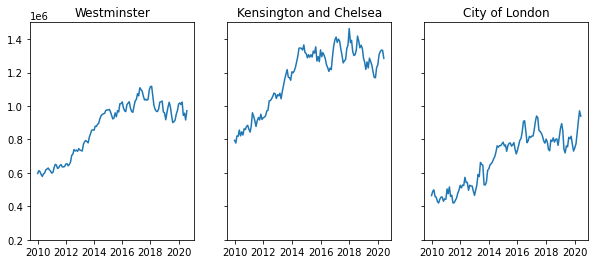

In [27]:
# 3 most expensive areas of London.

f, (ax31,ax32,ax33) = plt.subplots(1, 3, sharey=True, figsize=(10, 4))

ax31.plot(UKHPI_WESTMINSTER.index,UKHPI_WESTMINSTER['Average price All property types'])
ax31.set_title('Westminster')
ax31.set_ylim(200000, 1500000)

ax32.plot(UKHPI_KENSINGTON_CHELSEA.index,UKHPI_KENSINGTON_CHELSEA['Average price All property types'])
ax32.set_title('Kensington and Chelsea')

ax33.plot(UKHPI_CITY.index,UKHPI_CITY['Average price All property types'])
ax33.set_title('City of London')

In an attempt to make the data even clearer I have plotted each individual borough onto a single graph.

Text(0, 0.5, 'Average Price')

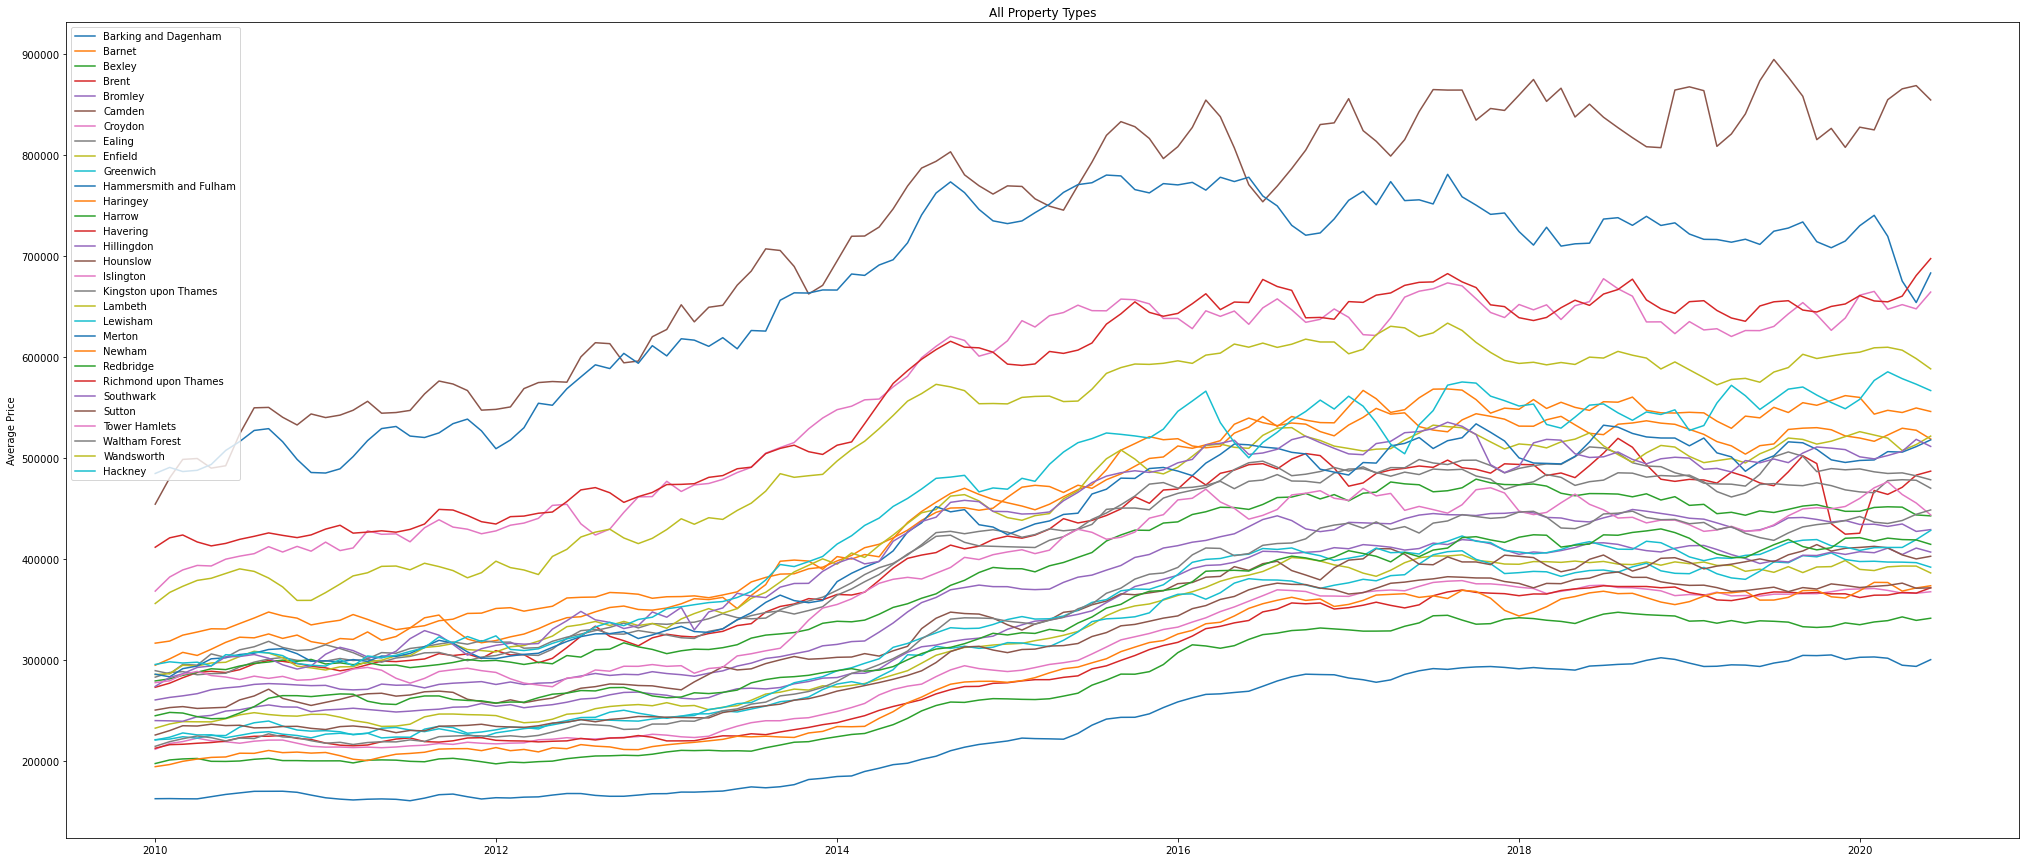

In [28]:
# Combining property data for all boroughs.

# Now I'm making a grid of subplots, which share a y-axis for each borough.

#f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(35, 15))

fig = plt.figure(figsize=(35,15))
ax = fig.add_subplot(111)


# 
plt.plot(UKHPI_BARKING.index,UKHPI_BARKING['Average price All property types'], label="Barking and Dagenham")
#ax1.set_title('Barking and Dagenham')

# 
plt.plot(UKHPI_BARNET.index,UKHPI_BARNET['Average price All property types'], label="Barnet")
#ax2.set_title('Barnet')

#
plt.plot(UKHPI_BEXLEY.index,UKHPI_BEXLEY['Average price All property types'], label="Bexley")
#ax3.set_title('Bexley')

#
plt.plot(UKHPI_BRENT.index,UKHPI_BRENT['Average price All property types'], label="Brent")
#ax4.set_title('Brent')

#
plt.plot(UKHPI_BROMLEY.index,UKHPI_BROMLEY['Average price All property types'], label="Bromley")
#ax5.set_title('Bromley')

#
plt.plot(UKHPI_CAMDEN.index,UKHPI_CAMDEN['Average price All property types'], label="Camden")
#ax6.set_title('Camden')

#
#plt.plot(UKHPI_CITY.index,UKHPI_CITY['Average price All property types'], label="City of London")
#ax7.set_title('City of London')

#
plt.plot(UKHPI_CROYDON.index,UKHPI_CROYDON['Average price All property types'], label="Croydon")
#ax8.set_title('Croydon')

#
plt.plot(UKHPI_EALING.index,UKHPI_EALING['Average price All property types'], label="Ealing")
#ax9.set_title('Ealing')

#
plt.plot(UKHPI_ENFIELD.index,UKHPI_ENFIELD['Average price All property types'], label="Enfield")
#ax10.set_title('Enfield')

#
plt.plot(UKHPI_GREENWICH.index,UKHPI_GREENWICH['Average price All property types'], label="Greenwich")
#ax11.set_title('Greenwich')

#
plt.plot(UKHPI_HAMMERSMITH_FULHAM.index,UKHPI_HAMMERSMITH_FULHAM['Average price All property types'], label="Hammersmith and Fulham")
#ax12.set_title('Hammersmith and Fulham')

#
plt.plot(UKHPI_HARINGEY.index,UKHPI_HARINGEY['Average price All property types'], label="Haringey")
#ax13.set_title('Haringey')

#
plt.plot(UKHPI_HARROW.index,UKHPI_HARROW['Average price All property types'], label="Harrow")
#ax14.set_title('Harrow')

#
plt.plot(UKHPI_HAVERING.index,UKHPI_HAVERING['Average price All property types'], label="Havering")
#ax15.set_title('Havering')

#
plt.plot(UKHPI_HILLINGDON.index,UKHPI_HILLINGDON['Average price All property types'], label="Hillingdon")
#ax16.set_title('Hillingdon')

#
plt.plot(UKHPI_HOUNSLOW.index,UKHPI_HOUNSLOW['Average price All property types'], label="Hounslow")
#ax17.set_title('Hounslow')

#
plt.plot(UKHPI_ISLINGTON.index,UKHPI_ISLINGTON['Average price All property types'], label="Islington")
#ax18.set_title('Islington')

#
#plt.plot(UKHPI_KENSINGTON_CHELSEA.index,UKHPI_KENSINGTON_CHELSEA['Average price All property types'], label="Kensington and Chelsea")
#ax19.set_title('Kensington and Chelsea')

#
plt.plot(UKHPI_KINGSTON.index,UKHPI_KINGSTON['Average price All property types'], label="Kingston upon Thames")
#ax20.set_title('Kingston upon Thames')

#
plt.plot(UKHPI_LAMBETH.index,UKHPI_LAMBETH['Average price All property types'], label="Lambeth")
#ax21.set_title('Lambeth')

#
plt.plot(UKHPI_LEWISHAM.index,UKHPI_LEWISHAM['Average price All property types'], label="Lewisham")
#ax22.set_title('Lewisham')

#
plt.plot(UKHPI_MERTON.index,UKHPI_MERTON['Average price All property types'], label="Merton")
#ax23.set_title('Merton')

#
plt.plot(UKHPI_NEWHAM.index,UKHPI_NEWHAM['Average price All property types'], label="Newham")
#ax24.set_title('Newham')

#
plt.plot(UKHPI_REDBRIDGE.index,UKHPI_REDBRIDGE['Average price All property types'], label="Redbridge")
#ax25.set_title('Redbridge')

#
plt.plot(UKHPI_RICHMOND.index,UKHPI_RICHMOND['Average price All property types'], label="Richmond upon Thames")
#ax26.set_title('Richmond upon Thames')

#
plt.plot(UKHPI_SOUTHWARK.index,UKHPI_SOUTHWARK['Average price All property types'], label="Southwark")
#ax27.set_title('Southwark')

#
plt.plot(UKHPI_SUTTON.index,UKHPI_SUTTON['Average price All property types'], label="Sutton")
#ax28.set_title('Sutton')

#
plt.plot(UKHPI_TOWER_HAMLETS.index,UKHPI_TOWER_HAMLETS['Average price All property types'], label="Tower Hamlets")
#ax29.set_title('Tower Hamlets')

#
plt.plot(UKHPI_WALTHAM.index,UKHPI_WALTHAM['Average price All property types'], label="Waltham Forest")
#ax30.set_title('Waltham Forest')

#
plt.plot(UKHPI_WANDSWORTH.index,UKHPI_WANDSWORTH['Average price All property types'], label="Wandsworth")
#ax31.set_title('Wandsworth')

#
#plt.plot(UKHPI_WESTMINSTER.index,UKHPI_WESTMINSTER['Average price All property types'], label="Westminster")
#ax32.set_title('Westminster')

#
plt.plot(UKHPI_HACKNEY.index,UKHPI_HACKNEY['Average price All property types'], label="Hackney")
#ax33.set_title('Hackney')

plt.legend(loc="upper left")
ax.set_title('All Property Types')
ax.set_ylabel('Average Price')


**Placing the Property data within the correct time frame to allow for analysis.**

As the COVID-19 datasets only begin February 2020, it was important for the analysis that the property price data is also set to the same timeframe.

The code below puts the overall London price dataset into this timeframe.

Text(0, 0.5, 'Average Price')

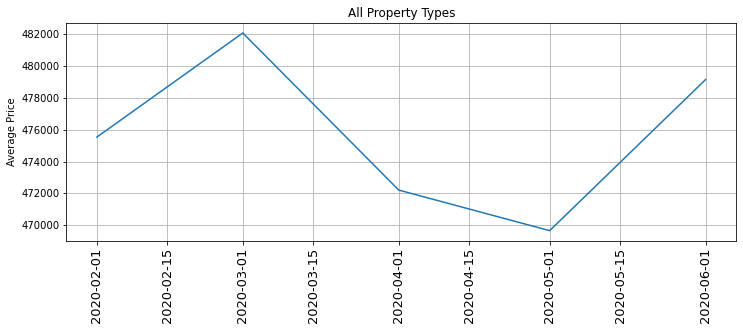

In [29]:
prop_price_df['Period'] = pd.to_datetime(prop_price_df['Period'])

# To adjust the sample to get to the right time period the first 121 rows must be removed.
prop_price_df = prop_price_df.drop(prop_price_df.head(121).index)
prop_price_df = prop_price_df.drop(prop_price_df.tail(1).index)

#prop_price_df

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plt.plot(prop_price_df['Period'],prop_price_df['Average price All property types'])
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)
ax.set_title('All Property Types')
ax.set_ylabel('Average Price')

The below does the same thing as the above but to each individual data set of each London borough.

In [30]:
# Removing any data from before 2020-02.

# Loading each borough into a dataframe and converting 'Period' column to datetime object and index.

UKHPI_BARKING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-barking-and-dagenham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BARKING.set_index('Period', inplace=True)
UKHPI_BARKING.index = pd.to_datetime(UKHPI_BARKING.index)
#UKHPI_BARKING = UKHPI_BARKING.resample('1M').sum()
# Need to remove the last 2 rows as they are null values and remove the first 121 rows so that the data is between 2020-02 and 2020-06
UKHPI_BARKING = UKHPI_BARKING.drop(UKHPI_BARKING.tail(2).index)
UKHPI_BARKING = UKHPI_BARKING.drop(UKHPI_BARKING.head(121).index)

#UKHPI_BARKING

UKHPI_BARNET = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-Barnet-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BARNET.set_index('Period', inplace=True)
UKHPI_BARNET.index = pd.to_datetime(UKHPI_BARNET.index)
#UKHPI_BARNET = UKHPI_BARNET.resample('1M').sum()
UKHPI_BARNET = UKHPI_BARNET.drop(UKHPI_BARNET.tail(2).index)
UKHPI_BARNET = UKHPI_BARNET.drop(UKHPI_BARNET.head(121).index)
#

UKHPI_BEXLEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-bexley-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BEXLEY.set_index('Period', inplace=True)
UKHPI_BEXLEY.index = pd.to_datetime(UKHPI_BEXLEY.index)
#UKHPI_BEXLEY = UKHPI_BEXLEY.resample('1M').sum()
UKHPI_BEXLEY = UKHPI_BEXLEY.drop(UKHPI_BEXLEY.tail(2).index)
UKHPI_BEXLEY = UKHPI_BEXLEY.drop(UKHPI_BEXLEY.head(121).index)
#

UKHPI_BRENT = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-brent-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BRENT.set_index('Period', inplace=True)
UKHPI_BRENT.index = pd.to_datetime(UKHPI_BRENT.index)
#UKHPI_BRENT = UKHPI_BRENT.resample('1M').sum()
UKHPI_BRENT = UKHPI_BRENT.drop(UKHPI_BRENT.tail(2).index)
UKHPI_BRENT = UKHPI_BRENT.drop(UKHPI_BRENT.head(121).index)
#

UKHPI_BROMLEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-bromley-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BROMLEY.set_index('Period', inplace=True)
UKHPI_BROMLEY.index = pd.to_datetime(UKHPI_BROMLEY.index)
#UKHPI_BROMLEY = UKHPI_BROMLEY.resample('1M').sum()
UKHPI_BROMLEY = UKHPI_BROMLEY.drop(UKHPI_BROMLEY.tail(2).index)
UKHPI_BROMLEY = UKHPI_BROMLEY.drop(UKHPI_BROMLEY.head(121).index)
#

UKHPI_CAMDEN = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-camden-from-2010-01-01-to-2020-08-01.csv')

UKHPI_CAMDEN.set_index('Period', inplace=True)
UKHPI_CAMDEN.index = pd.to_datetime(UKHPI_CAMDEN.index)
#UKHPI_CAMDEN = UKHPI_CAMDEN.resample('1M').sum()
UKHPI_CAMDEN = UKHPI_CAMDEN.drop(UKHPI_CAMDEN.tail(2).index)
UKHPI_CAMDEN = UKHPI_CAMDEN.drop(UKHPI_CAMDEN.head(121).index)
#

UKHPI_CITY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-city-of-london-from-2010-01-01-to-2020-08-01.csv')

UKHPI_CITY.set_index('Period', inplace=True)
UKHPI_CITY.index = pd.to_datetime(UKHPI_CITY.index)
#UKHPI_CITY = UKHPI_CITY.resample('1M').sum()
UKHPI_CITY = UKHPI_CITY.drop(UKHPI_CITY.tail(2).index)
UKHPI_CITY = UKHPI_CITY.drop(UKHPI_CITY.head(121).index)
#

UKHPI_HACKNEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hackney-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HACKNEY.set_index('Period', inplace=True)
UKHPI_HACKNEY.index = pd.to_datetime(UKHPI_HACKNEY.index)
#UKHPI_HACKNEY = UKHPI_HACKNEY.resample('1M').sum()
UKHPI_HACKNEY = UKHPI_HACKNEY.drop(UKHPI_HACKNEY.tail(2).index)
UKHPI_HACKNEY = UKHPI_HACKNEY.drop(UKHPI_HACKNEY.head(121).index)
#

UKHPI_CROYDON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-croydon-from-2010-01-01-to-2020-08-01.csv')

UKHPI_CROYDON.set_index('Period', inplace=True)
UKHPI_CROYDON.index = pd.to_datetime(UKHPI_CROYDON.index)
#UKHPI_CROYDON = UKHPI_CROYDON.resample('1M').sum()
UKHPI_CROYDON = UKHPI_CROYDON.drop(UKHPI_CROYDON.tail(2).index)
UKHPI_CROYDON = UKHPI_CROYDON.drop(UKHPI_CROYDON.head(121).index)
#

UKHPI_EALING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-Ealing-from-2010-01-01-to-2020-08-01.csv')

UKHPI_EALING.set_index('Period', inplace=True)
UKHPI_EALING.index = pd.to_datetime(UKHPI_EALING.index)
#UKHPI_EALING = UKHPI_EALING.resample('1M').sum()
UKHPI_EALING = UKHPI_EALING.drop(UKHPI_EALING.tail(2).index)
UKHPI_EALING = UKHPI_EALING.drop(UKHPI_EALING.head(121).index)
#

UKHPI_ENFIELD = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-Enfield-from-2010-01-01-to-2020-08-01.csv')

UKHPI_ENFIELD.set_index('Period', inplace=True)
UKHPI_ENFIELD.index = pd.to_datetime(UKHPI_ENFIELD.index)
#UKHPI_ENFIELD = UKHPI_ENFIELD.resample('1M').sum()
UKHPI_ENFIELD = UKHPI_ENFIELD.drop(UKHPI_ENFIELD.tail(2).index)
UKHPI_ENFIELD = UKHPI_ENFIELD.drop(UKHPI_ENFIELD.head(121).index)
#

UKHPI_GREENWICH = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-greenwich-from-2010-01-01-to-2020-08-01.csv')

UKHPI_GREENWICH.set_index('Period', inplace=True)
UKHPI_GREENWICH.index = pd.to_datetime(UKHPI_GREENWICH.index)
#UKHPI_GREENWICH = UKHPI_GREENWICH.resample('1M').sum()
UKHPI_GREENWICH = UKHPI_GREENWICH.drop(UKHPI_GREENWICH.tail(2).index)
UKHPI_GREENWICH = UKHPI_GREENWICH.drop(UKHPI_GREENWICH.head(121).index)
#

UKHPI_HAMMERSMITH_FULHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hammersmith-and-fulham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HAMMERSMITH_FULHAM.set_index('Period', inplace=True)
UKHPI_HAMMERSMITH_FULHAM.index = pd.to_datetime(UKHPI_HAMMERSMITH_FULHAM.index)
#UKHPI_HAMMERSMITH_FULHAM = UKHPI_HAMMERSMITH_FULHAM.resample('1M').sum()
UKHPI_HAMMERSMITH_FULHAM = UKHPI_HAMMERSMITH_FULHAM.drop(UKHPI_HAMMERSMITH_FULHAM.tail(2).index)
UKHPI_HAMMERSMITH_FULHAM = UKHPI_HAMMERSMITH_FULHAM.drop(UKHPI_HAMMERSMITH_FULHAM.head(121).index)
#

UKHPI_HARINGEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-haringey-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HARINGEY.set_index('Period', inplace=True)
UKHPI_HARINGEY.index = pd.to_datetime(UKHPI_HARINGEY.index)
#UKHPI_HARINGEY = UKHPI_HARINGEY.resample('1M').sum()
UKHPI_HARINGEY = UKHPI_HARINGEY.drop(UKHPI_HARINGEY.tail(2).index)
UKHPI_HARINGEY = UKHPI_HARINGEY.drop(UKHPI_HARINGEY.head(121).index)
#

UKHPI_HARROW = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-harrow-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HARROW.set_index('Period', inplace=True)
UKHPI_HARROW.index = pd.to_datetime(UKHPI_HARROW.index)
#UKHPI_HARROW = UKHPI_HARROW.resample('1M').sum()
UKHPI_HARROW = UKHPI_HARROW.drop(UKHPI_HARROW.tail(2).index)
UKHPI_HARROW = UKHPI_HARROW.drop(UKHPI_HARROW.head(121).index)
#

UKHPI_HAVERING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-havering-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HAVERING.set_index('Period', inplace=True)
UKHPI_HAVERING.index = pd.to_datetime(UKHPI_HAVERING.index)
#UKHPI_HAVERING = UKHPI_HAVERING.resample('1M').sum()
UKHPI_HAVERING = UKHPI_HAVERING.drop(UKHPI_HAVERING.tail(2).index)
UKHPI_HAVERING = UKHPI_HAVERING.drop(UKHPI_HAVERING.head(121).index)
#

UKHPI_HILLINGDON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hillingdon-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HILLINGDON.set_index('Period', inplace=True)
UKHPI_HILLINGDON.index = pd.to_datetime(UKHPI_HILLINGDON.index)
#UKHPI_HILLINGDON = UKHPI_HILLINGDON.resample('1M').sum()
UKHPI_HILLINGDON = UKHPI_HILLINGDON.drop(UKHPI_HILLINGDON.tail(2).index)
UKHPI_HILLINGDON = UKHPI_HILLINGDON.drop(UKHPI_HILLINGDON.head(121).index)
#

UKHPI_HOUNSLOW = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hounslow-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HOUNSLOW.set_index('Period', inplace=True)
UKHPI_HOUNSLOW.index = pd.to_datetime(UKHPI_HOUNSLOW.index)
#UKHPI_HOUNSLOW = UKHPI_HOUNSLOW.resample('1M').sum()
UKHPI_HOUNSLOW = UKHPI_HOUNSLOW.drop(UKHPI_HOUNSLOW.tail(2).index)
UKHPI_HOUNSLOW = UKHPI_HOUNSLOW.drop(UKHPI_HOUNSLOW.head(121).index)
#

UKHPI_ISLINGTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-islington-from-2010-01-01-to-2020-08-01.csv')

UKHPI_ISLINGTON.set_index('Period', inplace=True)
UKHPI_ISLINGTON.index = pd.to_datetime(UKHPI_ISLINGTON.index)
#UKHPI_ISLINGTON = UKHPI_ISLINGTON.resample('1M').sum()
UKHPI_ISLINGTON = UKHPI_ISLINGTON.drop(UKHPI_ISLINGTON.tail(2).index)
UKHPI_ISLINGTON = UKHPI_ISLINGTON.drop(UKHPI_ISLINGTON.head(121).index)
#

UKHPI_KENSINGTON_CHELSEA = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-kensington-and-chelsea-from-2010-01-01-to-2020-08-01.csv')

UKHPI_KENSINGTON_CHELSEA.set_index('Period', inplace=True)
UKHPI_KENSINGTON_CHELSEA.index = pd.to_datetime(UKHPI_KENSINGTON_CHELSEA.index)
#UKHPI_KENSINGTON_CHELSEA = UKHPI_KENSINGTON_CHELSEA.resample('1M').sum()
UKHPI_KENSINGTON_CHELSEA = UKHPI_KENSINGTON_CHELSEA.drop(UKHPI_KENSINGTON_CHELSEA.tail(2).index)
UKHPI_KENSINGTON_CHELSEA = UKHPI_KENSINGTON_CHELSEA.drop(UKHPI_KENSINGTON_CHELSEA.head(121).index)
#

UKHPI_KINGSTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-kingston-upon-thames-from-2010-01-01-to-2020-08-01.csv')

UKHPI_KINGSTON.set_index('Period', inplace=True)
UKHPI_KINGSTON.index = pd.to_datetime(UKHPI_KINGSTON.index)
#UKHPI_KINGSTON = UKHPI_KINGSTON.resample('1M').sum()
UKHPI_KINGSTON = UKHPI_KINGSTON.drop(UKHPI_KINGSTON.tail(2).index)
UKHPI_KINGSTON = UKHPI_KINGSTON.drop(UKHPI_KINGSTON.head(121).index)
#

UKHPI_LAMBETH = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-lambeth-from-2010-01-01-to-2020-08-01.csv')

UKHPI_LAMBETH.set_index('Period', inplace=True)
UKHPI_LAMBETH.index = pd.to_datetime(UKHPI_LAMBETH.index)
#UKHPI_LAMBETH = UKHPI_LAMBETH.resample('1M').sum()
UKHPI_LAMBETH = UKHPI_LAMBETH.drop(UKHPI_LAMBETH.tail(2).index)
UKHPI_LAMBETH = UKHPI_LAMBETH.drop(UKHPI_LAMBETH.head(121).index)
#

UKHPI_LEWISHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-lewisham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_LEWISHAM.set_index('Period', inplace=True)
UKHPI_LEWISHAM.index = pd.to_datetime(UKHPI_LEWISHAM.index)
#UKHPI_LEWISHAM = UKHPI_LEWISHAM.resample('1M').sum()
UKHPI_LEWISHAM = UKHPI_LEWISHAM.drop(UKHPI_LEWISHAM.tail(2).index)
UKHPI_LEWISHAM = UKHPI_LEWISHAM.drop(UKHPI_LEWISHAM.head(121).index)
#

UKHPI_MERTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-merton-from-2010-01-01-to-2020-08-01.csv')

UKHPI_MERTON.set_index('Period', inplace=True)
UKHPI_MERTON.index = pd.to_datetime(UKHPI_MERTON.index)
#UKHPI_MERTON = UKHPI_MERTON.resample('1M').sum()
UKHPI_MERTON = UKHPI_MERTON.drop(UKHPI_MERTON.tail(2).index)
UKHPI_MERTON = UKHPI_MERTON.drop(UKHPI_MERTON.head(121).index)
#

UKHPI_NEWHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-newham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_NEWHAM.set_index('Period', inplace=True)
UKHPI_NEWHAM.index = pd.to_datetime(UKHPI_NEWHAM.index)
#UKHPI_NEWHAM = UKHPI_NEWHAM.resample('1M').sum()
UKHPI_NEWHAM = UKHPI_NEWHAM.drop(UKHPI_NEWHAM.tail(2).index)
UKHPI_NEWHAM = UKHPI_NEWHAM.drop(UKHPI_NEWHAM.head(121).index)
#

UKHPI_REDBRIDGE = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-redbridge-from-2010-01-01-to-2020-08-01.csv')

UKHPI_REDBRIDGE.set_index('Period', inplace=True)
UKHPI_REDBRIDGE.index = pd.to_datetime(UKHPI_REDBRIDGE.index)
#UKHPI_REDBRIDGE = UKHPI_REDBRIDGE.resample('1M').sum()
UKHPI_REDBRIDGE = UKHPI_REDBRIDGE.drop(UKHPI_REDBRIDGE.tail(2).index)
UKHPI_REDBRIDGE = UKHPI_REDBRIDGE.drop(UKHPI_REDBRIDGE.head(121).index)
#

UKHPI_RICHMOND = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-richmond-upon-thames-from-2010-01-01-to-2020-08-01.csv')

UKHPI_RICHMOND.set_index('Period', inplace=True)
UKHPI_RICHMOND.index = pd.to_datetime(UKHPI_RICHMOND.index)
#UKHPI_RICHMOND = UKHPI_RICHMOND.resample('1M').sum()
UKHPI_RICHMOND = UKHPI_RICHMOND.drop(UKHPI_RICHMOND.tail(2).index)
UKHPI_RICHMOND = UKHPI_RICHMOND.drop(UKHPI_RICHMOND.head(121).index)
#

UKHPI_SOUTHWARK = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-southwark-from-2010-01-01-to-2020-08-01.csv')

UKHPI_SOUTHWARK.set_index('Period', inplace=True)
UKHPI_SOUTHWARK.index = pd.to_datetime(UKHPI_SOUTHWARK.index)
#UKHPI_SOUTHWARK = UKHPI_SOUTHWARK.resample('1M').sum()
UKHPI_SOUTHWARK = UKHPI_SOUTHWARK.drop(UKHPI_SOUTHWARK.tail(2).index)
UKHPI_SOUTHWARK = UKHPI_SOUTHWARK.drop(UKHPI_SOUTHWARK.head(121).index)
#

UKHPI_SUTTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-sutton-from-2010-01-01-to-2020-08-01.csv')

UKHPI_SUTTON.set_index('Period', inplace=True)
UKHPI_SUTTON.index = pd.to_datetime(UKHPI_SUTTON.index)
#UKHPI_SUTTON = UKHPI_SUTTON.resample('1M').sum()
UKHPI_SUTTON = UKHPI_SUTTON.drop(UKHPI_SUTTON.tail(2).index)
UKHPI_SUTTON = UKHPI_SUTTON.drop(UKHPI_SUTTON.head(121).index)
#

UKHPI_TOWER_HAMLETS = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-tower-hamlets-from-2010-01-01-to-2020-08-01.csv')

UKHPI_TOWER_HAMLETS.set_index('Period', inplace=True)
UKHPI_TOWER_HAMLETS.index = pd.to_datetime(UKHPI_TOWER_HAMLETS.index)
#UKHPI_TOWER_HAMLETS = UKHPI_TOWER_HAMLETS.resample('1M').sum()
UKHPI_TOWER_HAMLETS = UKHPI_TOWER_HAMLETS.drop(UKHPI_TOWER_HAMLETS.tail(2).index)
UKHPI_TOWER_HAMLETS = UKHPI_TOWER_HAMLETS.drop(UKHPI_TOWER_HAMLETS.head(121).index)
#

UKHPI_WALTHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-waltham-forest-from-2010-01-01-to-2020-08-01.csv')

UKHPI_WALTHAM.set_index('Period', inplace=True)
UKHPI_WALTHAM.index = pd.to_datetime(UKHPI_WALTHAM.index)
#UKHPI_WALTHAM = UKHPI_WALTHAM.resample('1M').sum()
UKHPI_WALTHAM = UKHPI_WALTHAM.drop(UKHPI_WALTHAM.tail(2).index)
UKHPI_WALTHAM = UKHPI_WALTHAM.drop(UKHPI_WALTHAM.head(121).index)
#

UKHPI_WANDSWORTH = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-wandsworth-from-2010-01-01-to-2020-08-01.csv')

UKHPI_WANDSWORTH.set_index('Period', inplace=True)
UKHPI_WANDSWORTH.index = pd.to_datetime(UKHPI_WANDSWORTH.index)
#UKHPI_WANDSWORTH = UKHPI_WANDSWORTH.resample('1M').sum()
UKHPI_WANDSWORTH = UKHPI_WANDSWORTH.drop(UKHPI_WANDSWORTH.tail(2).index)
UKHPI_WANDSWORTH = UKHPI_WANDSWORTH.drop(UKHPI_WANDSWORTH.head(121).index)
#

UKHPI_WESTMINSTER = pd.read_csv('ukhpi-city-of-westminster-from-2010-01-01-to-2020-11-01.csv')

UKHPI_WESTMINSTER.set_index('Period', inplace=True)
UKHPI_WESTMINSTER.index = pd.to_datetime(UKHPI_WESTMINSTER.index)
#UKHPI_WESTMINSTER = UKHPI_WESTMINSTER.resample('1M').sum()
UKHPI_WESTMINSTER = UKHPI_WESTMINSTER.drop(UKHPI_WESTMINSTER.tail(2).index)
UKHPI_WESTMINSTER = UKHPI_WESTMINSTER.drop(UKHPI_WESTMINSTER.head(121).index)

Experimented below setting the y axis limit for all to ease comparability however due to the drastic price differences from borough to borough, it was better to leave them on their own scales in order to more easily see the changes in price.

Text(0.5, 1.0, 'Westminster')

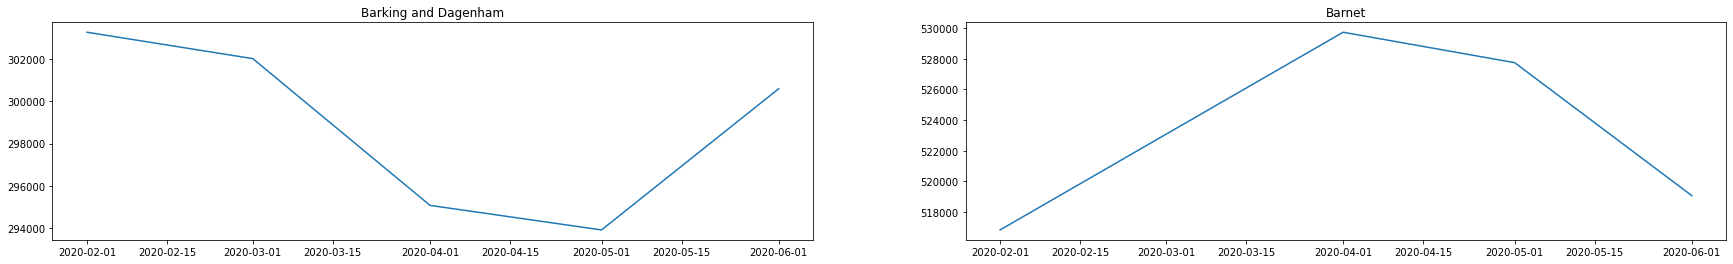

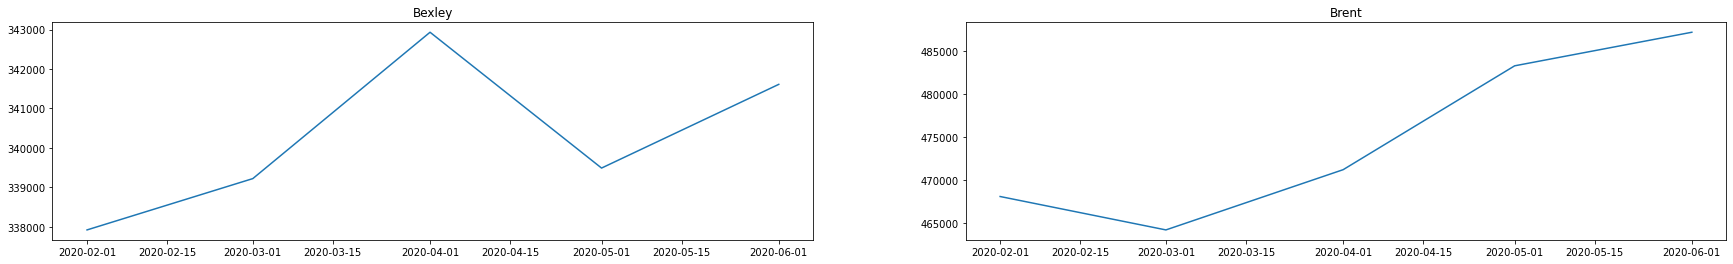

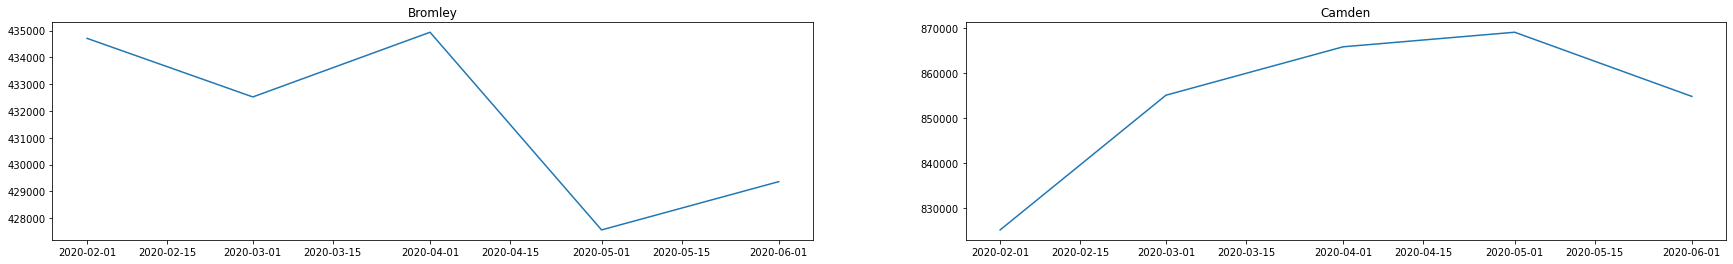

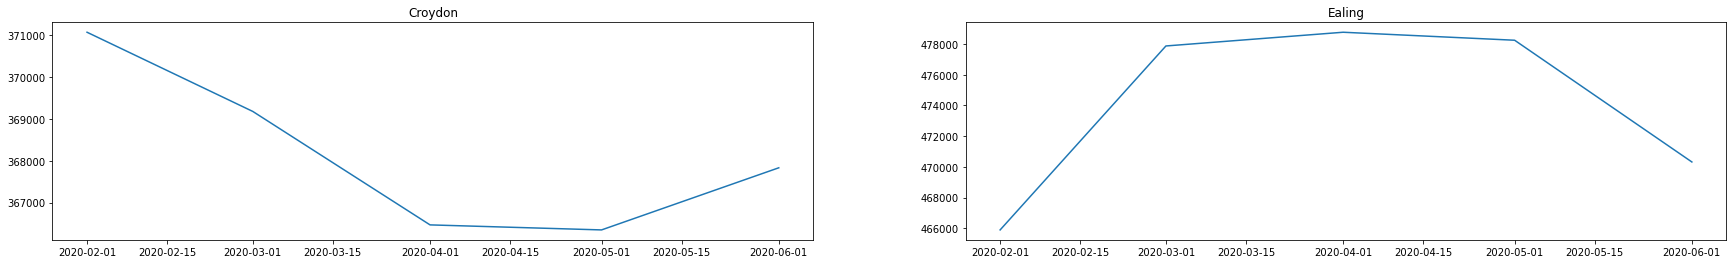

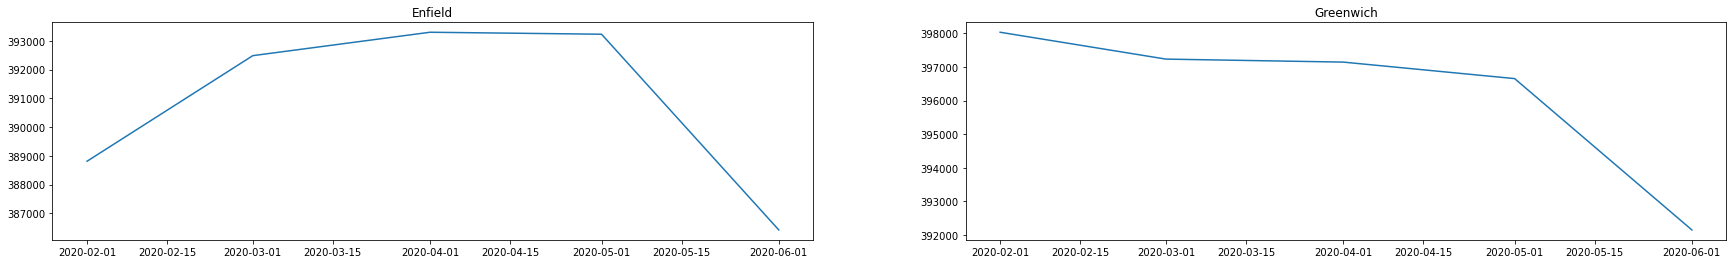

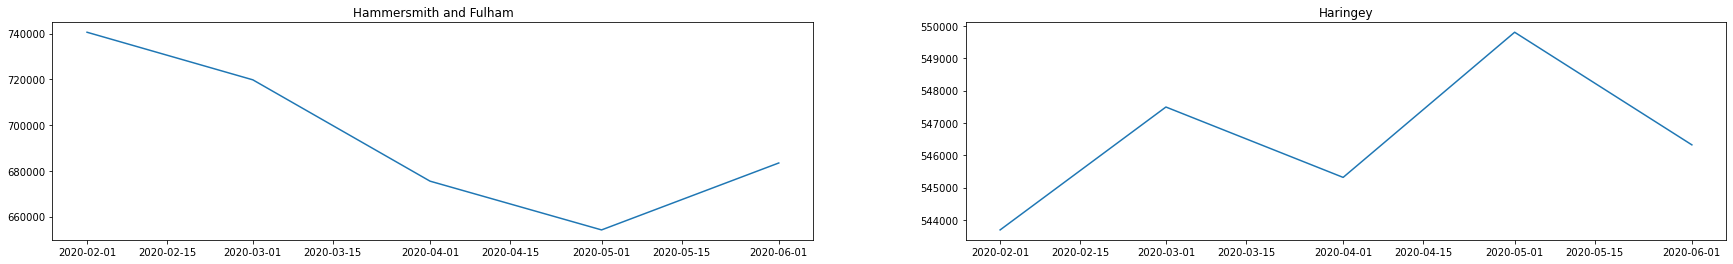

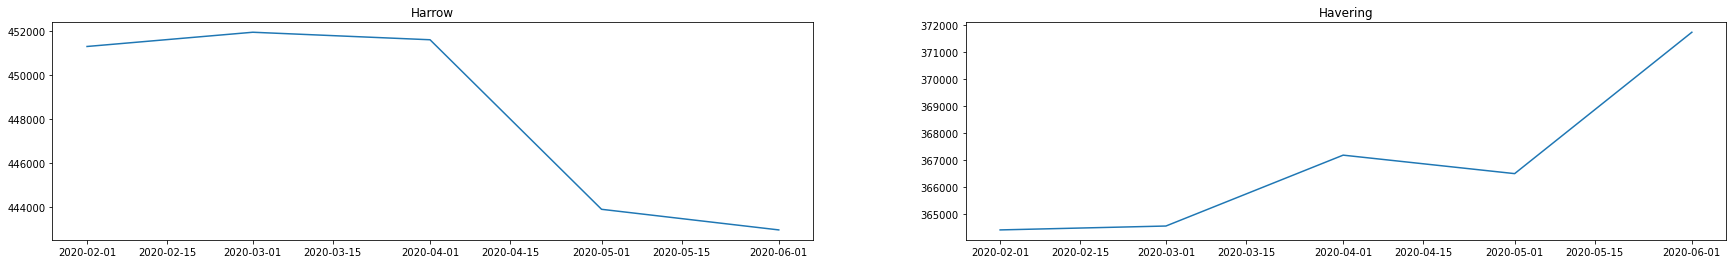

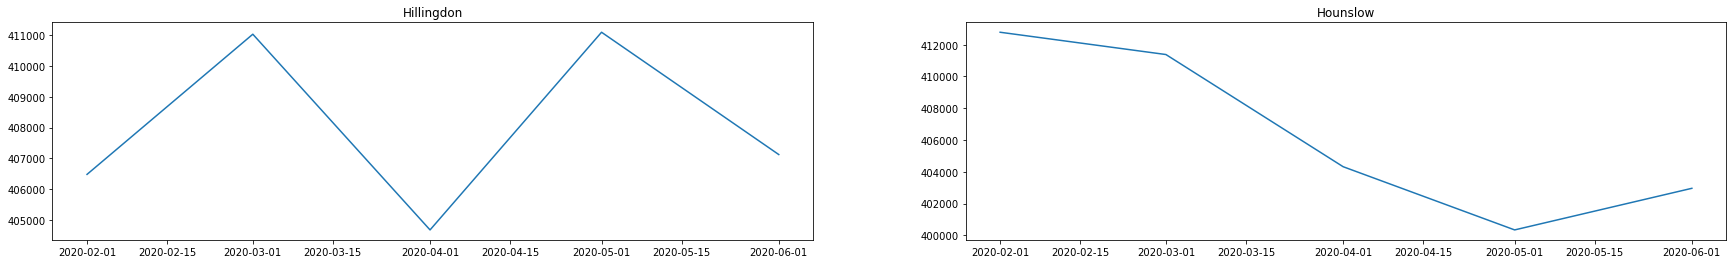

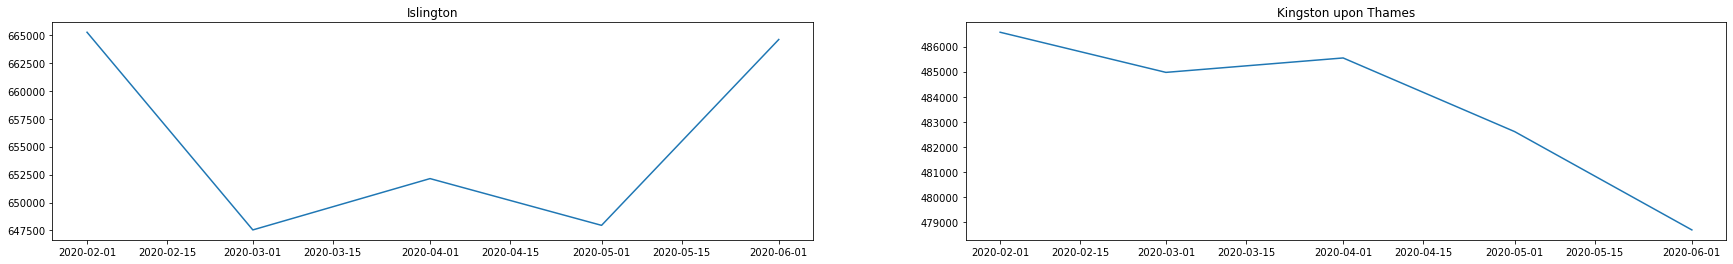

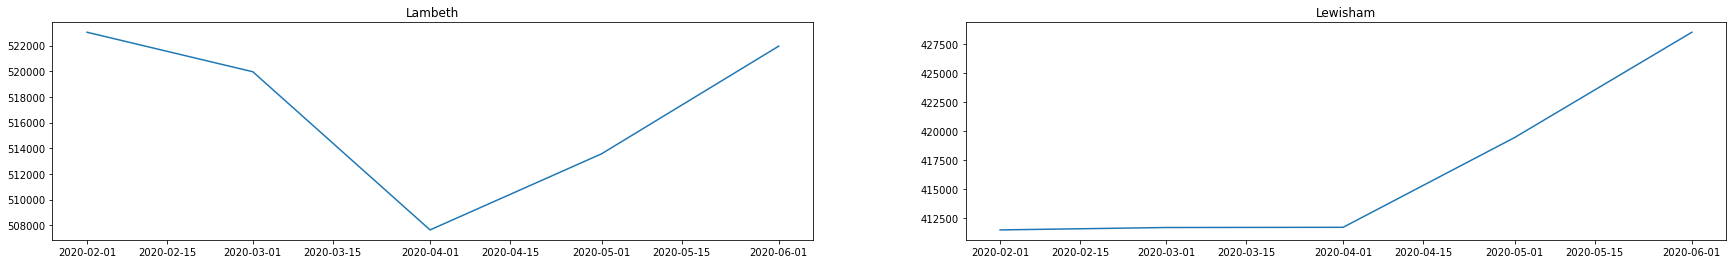

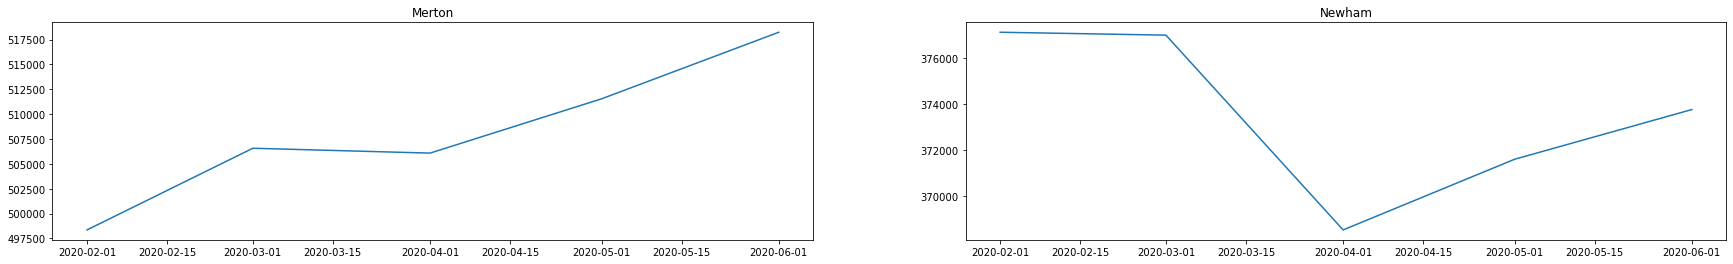

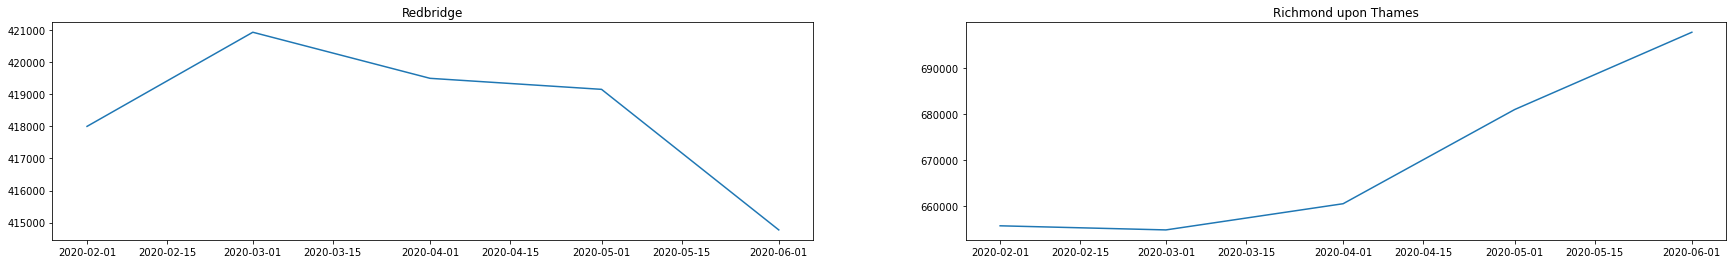

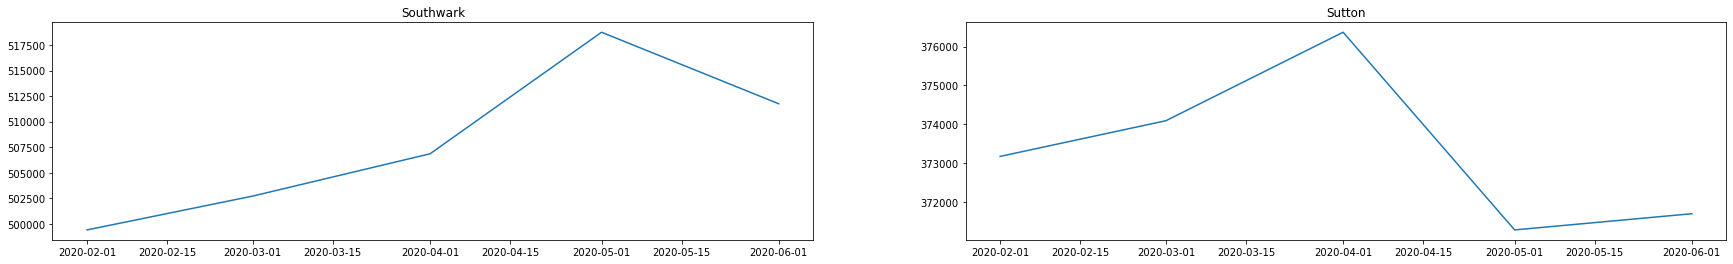

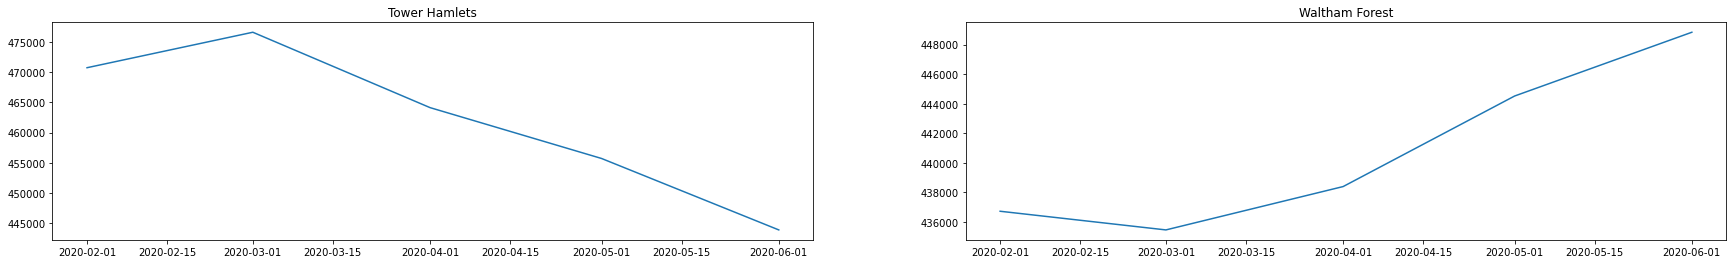

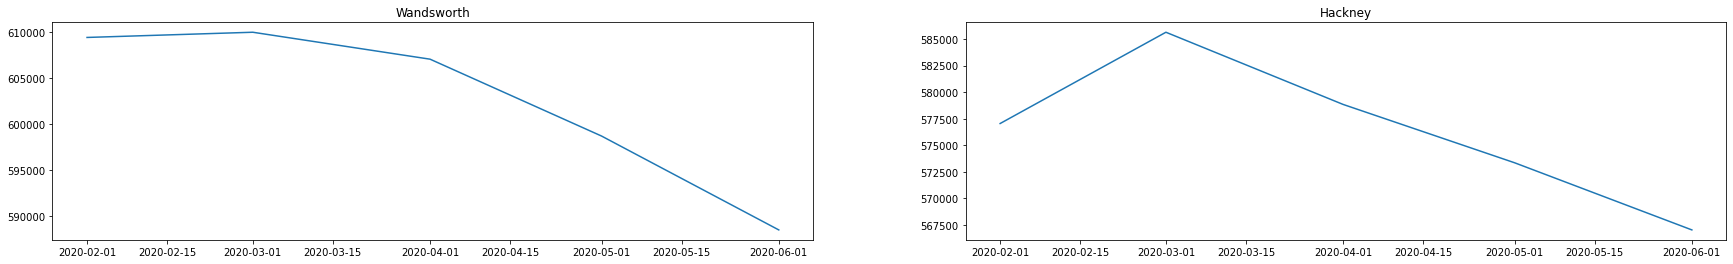

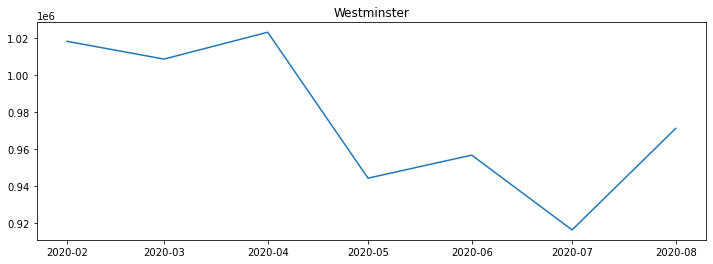

In [31]:
# Now I'm making a grid of subplots, which share a y-axis for each borough from 02-2020 to 06-2020

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

# 
ax1.plot(UKHPI_BARKING.index,UKHPI_BARKING['Average price All property types'])
ax1.set_title('Barking and Dagenham')
#ax1.set_ylim(0, 900000)

# 
ax2.plot(UKHPI_BARNET.index,UKHPI_BARNET['Average price All property types'])
ax2.set_title('Barnet')
#ax2.set_ylim(0, 100000)
#

f, (ax3,ax4) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#
ax3.plot(UKHPI_BEXLEY.index,UKHPI_BEXLEY['Average price All property types'])
ax3.set_title('Bexley')
#ax3.set_ylim(0, 900000)
#
ax4.plot(UKHPI_BRENT.index,UKHPI_BRENT['Average price All property types'])
ax4.set_title('Brent')
#ax4.set_ylim(0, 100000)
#

f, (ax5,ax6) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#
ax5.plot(UKHPI_BROMLEY.index,UKHPI_BROMLEY['Average price All property types'])
ax5.set_title('Bromley')
#ax5.set_ylim(0, 900000)
#
ax6.plot(UKHPI_CAMDEN.index,UKHPI_CAMDEN['Average price All property types'])
ax6.set_title('Camden')
#

#

f, (ax8,ax9) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#
#ax7.plot(UKHPI_CITY.index,UKHPI_CITY['Average price All property types'])
#ax7.set_title('City of London')

#
ax8.plot(UKHPI_CROYDON.index,UKHPI_CROYDON['Average price All property types'])
ax8.set_title('Croydon')

#
ax9.plot(UKHPI_EALING.index,UKHPI_EALING['Average price All property types'])
ax9.set_title('Ealing')

#

f, (ax10,ax11) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#


#
ax10.plot(UKHPI_ENFIELD.index,UKHPI_ENFIELD['Average price All property types'])
ax10.set_title('Enfield')

#
ax11.plot(UKHPI_GREENWICH.index,UKHPI_GREENWICH['Average price All property types'])
ax11.set_title('Greenwich')

#

f, (ax12,ax13) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#


#
ax12.plot(UKHPI_HAMMERSMITH_FULHAM.index,UKHPI_HAMMERSMITH_FULHAM['Average price All property types'])
ax12.set_title('Hammersmith and Fulham')

#
ax13.plot(UKHPI_HARINGEY.index,UKHPI_HARINGEY['Average price All property types'])
ax13.set_title('Haringey')

#

f, (ax14,ax15) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#


#
ax14.plot(UKHPI_HARROW.index,UKHPI_HARROW['Average price All property types'])
ax14.set_title('Harrow')

#
ax15.plot(UKHPI_HAVERING.index,UKHPI_HAVERING['Average price All property types'])
ax15.set_title('Havering')

#

f, (ax16,ax17) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#


#
ax16.plot(UKHPI_HILLINGDON.index,UKHPI_HILLINGDON['Average price All property types'])
ax16.set_title('Hillingdon')

#
ax17.plot(UKHPI_HOUNSLOW.index,UKHPI_HOUNSLOW['Average price All property types'])
ax17.set_title('Hounslow')

#

f, (ax18,ax20) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#


#
ax18.plot(UKHPI_ISLINGTON.index,UKHPI_ISLINGTON['Average price All property types'])
ax18.set_title('Islington')
#

#ax19.plot(UKHPI_KENSINGTON_CHELSEA.index,UKHPI_KENSINGTON_CHELSEA['Average price All property types'])
#ax19.set_title('Kensington and Chelsea')

#
ax20.plot(UKHPI_KINGSTON.index,UKHPI_KINGSTON['Average price All property types'])
ax20.set_title('Kingston upon Thames')

#

f, (ax21,ax22) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#


#
ax21.plot(UKHPI_LAMBETH.index,UKHPI_LAMBETH['Average price All property types'])
ax21.set_title('Lambeth')

#
ax22.plot(UKHPI_LEWISHAM.index,UKHPI_LEWISHAM['Average price All property types'])
ax22.set_title('Lewisham')

#

f, (ax23,ax24) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#


#
ax23.plot(UKHPI_MERTON.index,UKHPI_MERTON['Average price All property types'])
ax23.set_title('Merton')

#
ax24.plot(UKHPI_NEWHAM.index,UKHPI_NEWHAM['Average price All property types'])
ax24.set_title('Newham')

#

f, (ax25,ax26) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#
ax25.plot(UKHPI_REDBRIDGE.index,UKHPI_REDBRIDGE['Average price All property types'])
ax25.set_title('Redbridge')

#
ax26.plot(UKHPI_RICHMOND.index,UKHPI_RICHMOND['Average price All property types'])
ax26.set_title('Richmond upon Thames')

#

f, (ax27,ax28) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#

#
ax27.plot(UKHPI_SOUTHWARK.index,UKHPI_SOUTHWARK['Average price All property types'])
ax27.set_title('Southwark')

#
ax28.plot(UKHPI_SUTTON.index,UKHPI_SUTTON['Average price All property types'])
ax28.set_title('Sutton')

#

f, (ax29,ax30) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#

ax29.plot(UKHPI_TOWER_HAMLETS.index,UKHPI_TOWER_HAMLETS['Average price All property types'])
ax29.set_title('Tower Hamlets')

#
ax30.plot(UKHPI_WALTHAM.index,UKHPI_WALTHAM['Average price All property types'])
ax30.set_title('Waltham Forest')


#

f, (ax31,ax33) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

#


#
ax31.plot(UKHPI_WANDSWORTH.index,UKHPI_WANDSWORTH['Average price All property types'])
ax31.set_title('Wandsworth')

#
ax33.plot(UKHPI_HACKNEY.index,UKHPI_HACKNEY['Average price All property types'])
ax33.set_title('Hackney')

f, (ax32) = plt.subplots(1, 1, sharey=False, figsize=(12, 4))

#
ax32.plot(UKHPI_WESTMINSTER.index,UKHPI_WESTMINSTER['Average price All property types'])
ax32.set_title('Westminster')

**The below are the areas of London which had the biggest drop in price between 2020-03 and 2020-05.**

Tower Hamlets            -4.389303 % 

City of Westminster      -4.787241 %

Hammersmith and Fulham   -9.112292 %

**The below are the areas of London where property prices have been continuously rising between 2020-03 and 2020-05.**

Brent                     + 4.112546 % 

Richmond upon Thames      + 3.981560 %

Southwark                 + 3.189270 %

Waltham Forest            + 2.084080 %

In the below cell I have isolated each boroughs property price for 2020-03 and 2020-05. Created a new column for the percentage difference for these.

The code below also counts how many boroughs so an increase in price and ones that saw an decrease.

In [135]:
UKHPI_Combined_2020_03 = UKHPI_Combined.loc[(UKHPI_Combined['Period'] == '2020-03-01')]
#UKHPI_Combined_2020_03.set_index('Period', inplace=True)

UKHPI_Combined_2020_05 = UKHPI_Combined.loc[(UKHPI_Combined['Period'] == '2020-05-01')]
#UKHPI_Combined_2020_05.set_index('Period', inplace=True)

UKHPI_Combined_2020_03['2020-05 Average Price'] = UKHPI_Combined_2020_05['Average price All property types'].values
UKHPI_Combined_2020_03['DIFF from 2020-03 and 2020-05'] = UKHPI_Combined_2020_03['2020-05 Average Price'].values - UKHPI_Combined_2020_03['Average price All property types'].values
UKHPI_Combined_2020_03['Pct Change from 2020-03 and 2020-05'] = (UKHPI_Combined_2020_03['DIFF from 2020-03 and 2020-05'].values / UKHPI_Combined_2020_03['Average price All property types'].values)*100

# Dropping values for City of London(incorrect), London(Duplicate value) and City of Westminster(Duplicate Value).
UKHPI_Combined_2020_03 = UKHPI_Combined_2020_03.drop([1018]) # City of Westminster(Duplicate Value)
UKHPI_Combined_2020_03 = UKHPI_Combined_2020_03.drop([890])  # City of London(incorrect)
UKHPI_Combined_2020_03 = UKHPI_Combined_2020_03.drop([3079]) # London(Duplicate value)

UKHPI_Combined_2020_03.set_index('Name', inplace=True)

UKHPI_Combined_2020_03 = UKHPI_Combined_2020_03.sort_values(by=['Pct Change from 2020-03 and 2020-05'], ascending=False)

#UKHPI_Combined_2020_03

print('% Change between 2020-03 and 2020-05: ', '\n' ,UKHPI_Combined_2020_03['Pct Change from 2020-03 and 2020-05'])

Decrease = 0
Decreased_sum = 0

Increase = 0
Increase_sum = 0


for i in UKHPI_Combined_2020_03['Pct Change from 2020-03 and 2020-05']:
    if i < 0:
        Decrease += 1
        Decreased_sum = Decreased_sum + i
        
    else:
        Increase += 1
        Increase_sum = Increase_sum + i
        
print('\n')
print('No of Boroughs where property price rose between 2020-03 amd 2020-05: ', Increase)
print('Total % property price increase between 2020-03 and 2020-05 for all Boroughs: ', Increase_sum)
print('\n')
print('No of Boroughs where property price decreased between 2020-03 amd 2020-05: ', Decrease)
print('Total % property price decreased between 2020-03 and 2020-05 for all Boroughs: ', Decreased_sum)

#plt.hist(UKHPI_Combined_2020_03.index, UKHPI_Combined_2020_03['Pct Change from 2020-03 and 2020-05'])

#UKHPI_Combined_2020_03

% Change between 2020-03 and 2020-05:  
 Name
Brent                     4.112546
Richmond upon Thames      3.981560
Southwark                 3.189270
Waltham Forest            2.084080
Lewisham                  1.887118
Camden                    1.634411
Merton                    0.980917
Barnet                    0.894523
Kensington and Chelsea    0.663382
Havering                  0.532151
Haringey                  0.422289
Enfield                   0.189816
Bexley                    0.078710
Ealing                    0.078055
Islington                 0.063007
Hillingdon                0.015571
Greenwich                -0.146010
Redbridge                -0.422165
Kingston upon Thames     -0.486834
Sutton                   -0.750077
Croydon                  -0.766030
Bromley                  -1.146755
Lambeth                  -1.230088
Newham                   -1.435540
Harrow                   -1.782470
Wandsworth               -1.844593
Hackney                  -2.096873
Barking a

<ipython-input-135-f1f5765dad32>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKHPI_Combined_2020_03['2020-05 Average Price'] = UKHPI_Combined_2020_05['Average price All property types'].values
<ipython-input-135-f1f5765dad32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKHPI_Combined_2020_03['DIFF from 2020-03 and 2020-05'] = UKHPI_Combined_2020_03['2020-05 Average Price'].values - UKHPI_Combined_2020_03['Average price All property types'].values
<ipython-input-135-f1f5765dad32>:9: SettingWithCopy

See more data derivation below.

Below I have plotted the changes in price from 2020-03 to 2020-05 on a map of London.

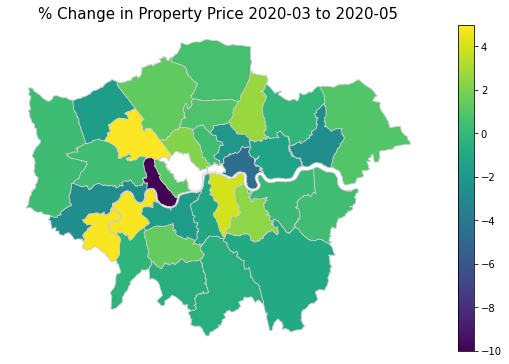

In [150]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

shapefile= "statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(shapefile)
#map_df.plot()

map_df = map_df.set_index('NAME')

merged = map_df.join(UKHPI_Combined_2020_03)

#UKHPI_Combined_2020_03

vmin, vmax = -10, 5

fig, ax = plt.subplots(1,figsize=(10,6))
merged.plot(merged['Pct Change from 2020-03 and 2020-05'], linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')
ax.set_title('% Change in Property Price 2020-03 to 2020-05', fontdict={'fontsize': '15'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

#merged

Certain boroughs above saw a continuous rise in property prices well before the peak of COVID-19 in 2020-04-01 and price did not seem drastically affected, these include; Southwark, Richmond upon Thames and Brent.

Other boroughs prices dropped prior to the COVID-19 peak and then saw a continuous increase in property prices starting at the peak of COVID-19, these include; Merton, Newham, Lambeth and Lewisham.

Other broughs prices continuously dropped starting from the peak of COVID-19; Wandsworth, Hackney, Tower Hamlets, Kingston upon Thames, Harrow, Greenwich, Enfield, Ealing and Barnet.

The below code just plots the data above but on the same visualisation to see a direct comparison between the data.

Text(0, 0.5, 'Average Price')

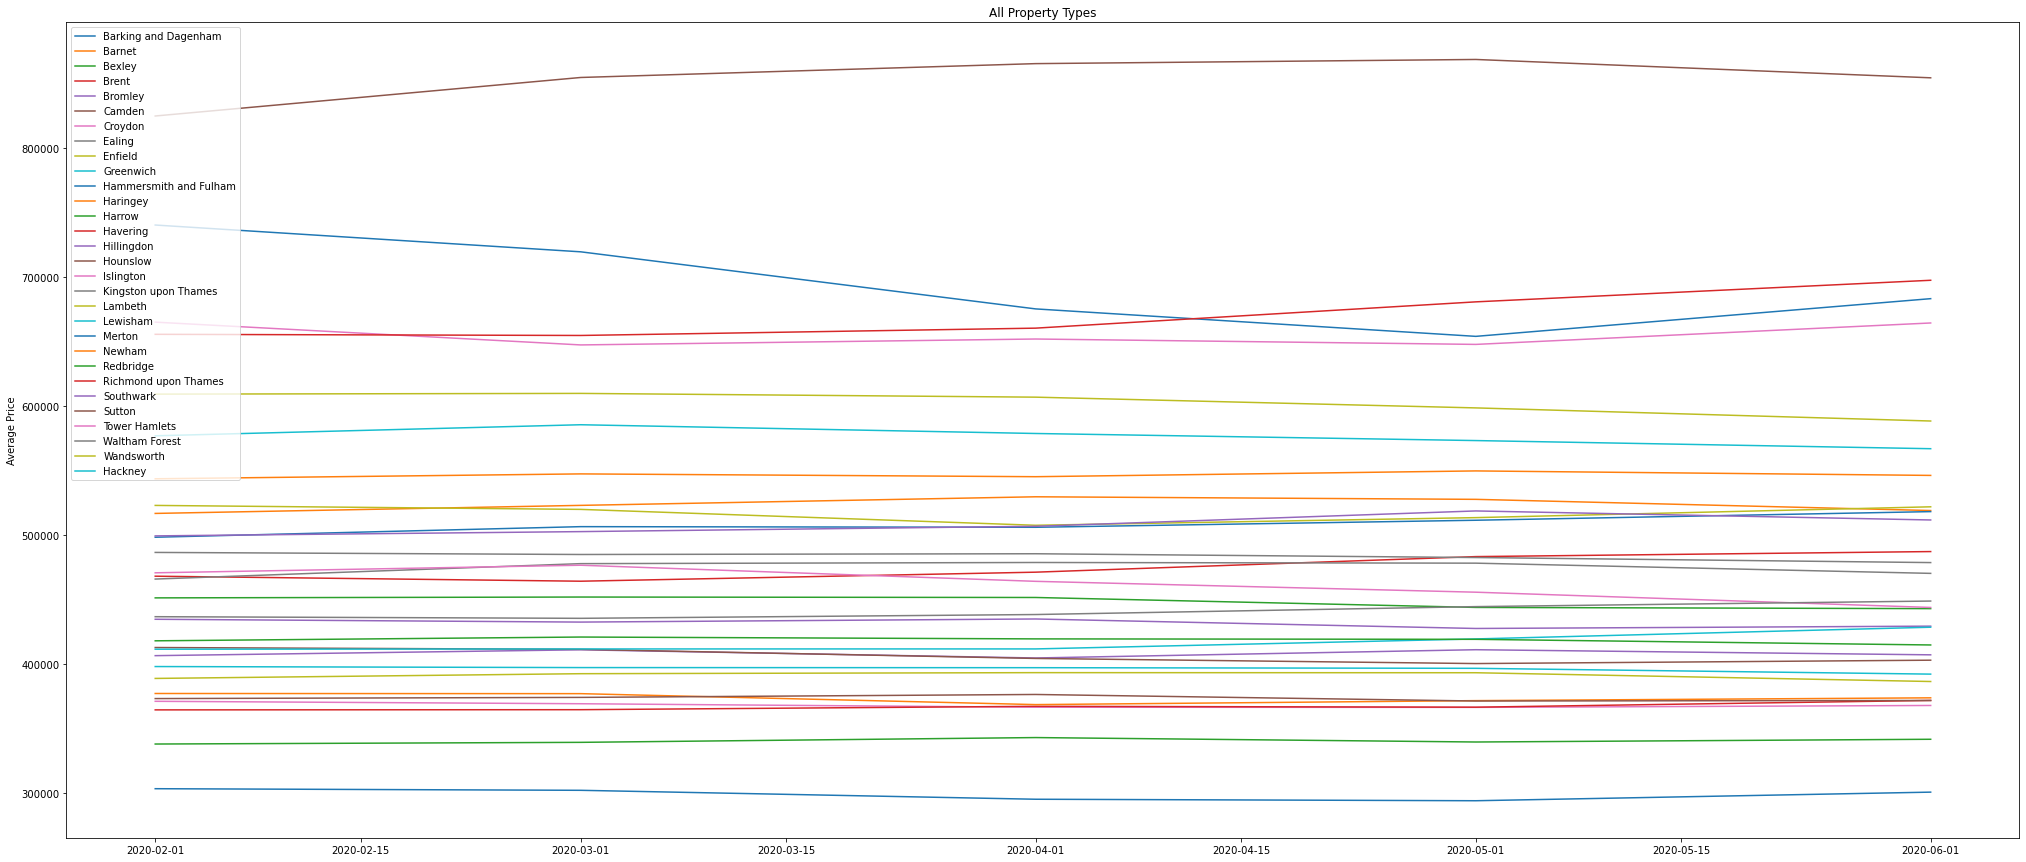

In [33]:
# Combining property data for all boroughs from 02-2020 until 06-2020.

# Now I'm making a grid of subplots, which share a y-axis for each borough.

#f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(35, 15))

fig = plt.figure(figsize=(35,15))
ax = fig.add_subplot(111)


# 
plt.plot(UKHPI_BARKING.index,UKHPI_BARKING['Average price All property types'], label="Barking and Dagenham")
#ax1.set_title('Barking and Dagenham')

# 
plt.plot(UKHPI_BARNET.index,UKHPI_BARNET['Average price All property types'], label="Barnet")
#ax2.set_title('Barnet')

#
plt.plot(UKHPI_BEXLEY.index,UKHPI_BEXLEY['Average price All property types'], label="Bexley")
#ax3.set_title('Bexley')

#
plt.plot(UKHPI_BRENT.index,UKHPI_BRENT['Average price All property types'], label="Brent")
#ax4.set_title('Brent')

#
plt.plot(UKHPI_BROMLEY.index,UKHPI_BROMLEY['Average price All property types'], label="Bromley")
#ax5.set_title('Bromley')

#
plt.plot(UKHPI_CAMDEN.index,UKHPI_CAMDEN['Average price All property types'], label="Camden")
#ax6.set_title('Camden')

#
#plt.plot(UKHPI_CITY.index,UKHPI_CITY['Average price All property types'], label="City of London")
#ax7.set_title('City of London')

#
plt.plot(UKHPI_CROYDON.index,UKHPI_CROYDON['Average price All property types'], label="Croydon")
#ax8.set_title('Croydon')

#
plt.plot(UKHPI_EALING.index,UKHPI_EALING['Average price All property types'], label="Ealing")
#ax9.set_title('Ealing')

#
plt.plot(UKHPI_ENFIELD.index,UKHPI_ENFIELD['Average price All property types'], label="Enfield")
#ax10.set_title('Enfield')

#
plt.plot(UKHPI_GREENWICH.index,UKHPI_GREENWICH['Average price All property types'], label="Greenwich")
#ax11.set_title('Greenwich')

#
plt.plot(UKHPI_HAMMERSMITH_FULHAM.index,UKHPI_HAMMERSMITH_FULHAM['Average price All property types'], label="Hammersmith and Fulham")
#ax12.set_title('Hammersmith and Fulham')

#
plt.plot(UKHPI_HARINGEY.index,UKHPI_HARINGEY['Average price All property types'], label="Haringey")
#ax13.set_title('Haringey')

#
plt.plot(UKHPI_HARROW.index,UKHPI_HARROW['Average price All property types'], label="Harrow")
#ax14.set_title('Harrow')

#
plt.plot(UKHPI_HAVERING.index,UKHPI_HAVERING['Average price All property types'], label="Havering")
#ax15.set_title('Havering')

#
plt.plot(UKHPI_HILLINGDON.index,UKHPI_HILLINGDON['Average price All property types'], label="Hillingdon")
#ax16.set_title('Hillingdon')

#
plt.plot(UKHPI_HOUNSLOW.index,UKHPI_HOUNSLOW['Average price All property types'], label="Hounslow")
#ax17.set_title('Hounslow')

#
plt.plot(UKHPI_ISLINGTON.index,UKHPI_ISLINGTON['Average price All property types'], label="Islington")
#ax18.set_title('Islington')

#
#plt.plot(UKHPI_KENSINGTON_CHELSEA.index,UKHPI_KENSINGTON_CHELSEA['Average price All property types'], label="Kensington and Chelsea")
#ax19.set_title('Kensington and Chelsea')

#
plt.plot(UKHPI_KINGSTON.index,UKHPI_KINGSTON['Average price All property types'], label="Kingston upon Thames")
#ax20.set_title('Kingston upon Thames')

#
plt.plot(UKHPI_LAMBETH.index,UKHPI_LAMBETH['Average price All property types'], label="Lambeth")
#ax21.set_title('Lambeth')

#
plt.plot(UKHPI_LEWISHAM.index,UKHPI_LEWISHAM['Average price All property types'], label="Lewisham")
#ax22.set_title('Lewisham')

#
plt.plot(UKHPI_MERTON.index,UKHPI_MERTON['Average price All property types'], label="Merton")
#ax23.set_title('Merton')

#
plt.plot(UKHPI_NEWHAM.index,UKHPI_NEWHAM['Average price All property types'], label="Newham")
#ax24.set_title('Newham')

#
plt.plot(UKHPI_REDBRIDGE.index,UKHPI_REDBRIDGE['Average price All property types'], label="Redbridge")
#ax25.set_title('Redbridge')

#
plt.plot(UKHPI_RICHMOND.index,UKHPI_RICHMOND['Average price All property types'], label="Richmond upon Thames")
#ax26.set_title('Richmond upon Thames')

#
plt.plot(UKHPI_SOUTHWARK.index,UKHPI_SOUTHWARK['Average price All property types'], label="Southwark")
#ax27.set_title('Southwark')

#
plt.plot(UKHPI_SUTTON.index,UKHPI_SUTTON['Average price All property types'], label="Sutton")
#ax28.set_title('Sutton')

#
plt.plot(UKHPI_TOWER_HAMLETS.index,UKHPI_TOWER_HAMLETS['Average price All property types'], label="Tower Hamlets")
#ax29.set_title('Tower Hamlets')

#
plt.plot(UKHPI_WALTHAM.index,UKHPI_WALTHAM['Average price All property types'], label="Waltham Forest")
#ax30.set_title('Waltham Forest')

#
plt.plot(UKHPI_WANDSWORTH.index,UKHPI_WANDSWORTH['Average price All property types'], label="Wandsworth")
#ax31.set_title('Wandsworth')

#
#plt.plot(UKHPI_WESTMINSTER.index,UKHPI_WESTMINSTER['Average price All property types'], label="Westminster")
#ax32.set_title('Westminster')

#
plt.plot(UKHPI_HACKNEY.index,UKHPI_HACKNEY['Average price All property types'], label="Hackney")
#ax33.set_title('Hackney')

plt.legend(loc="upper left")
ax.set_title('All Property Types')
ax.set_ylabel('Average Price')


Although the graph above suffers from occlusion it is at least useful to see which boroughs of London suffered the greatest change in price during this period as well as showing which boroughs are the most expensive and which are the cheaper areas.

**COVID-19 DATA**

**The COVID-19 data set does not contain any missing values.**

In [34]:
total_london_covid.isna().sum()

areaType                  0
areaName                  0
areaCode                  0
date                      0
newCasesBySpecimenDate    0
cumCasesBySpecimenDate    0
dtype: int64

Below I have used a similar code to the one previously used to combine all the individual COVID-19 data sets for each borough of London into a single CSV for further analysis later.

In [35]:
# Combining COVID-19 datasets for all London boroughs.

#filenames = [i for i in glob.glob("Data Sets/COVID data for all boroughs/COVID*.csv")]
#header_keys = []
#merged_rows = []

#for filename in filenames:
#    with open(filename) as f:
#        reader = csv.DictReader(f)
#        merged_rows.extend(list(reader))
#        header_keys.extend([key for key in reader.fieldnames if key not in header_keys])

#with open("COVID_Combined.csv", "w") as f:
#    w = csv.DictWriter(f, fieldnames=header_keys)
#    w.writeheader()
#    w.writerows(merged_rows)

Now I am loading this combined CSV to ensure that all the data is there and is correct.

In [36]:
COVID_Combined = pd.read_csv('COVID_Combined.csv')

COVID_Combined.head()
#COVID_Combined['areaName'].unique()

areaType              areaName   areaCode        date  \
0     ltla  Barking and Dagenham  E09000002  31/10/2020   
1     ltla  Barking and Dagenham  E09000002  30/10/2020   
2     ltla  Barking and Dagenham  E09000002  29/10/2020   
3     ltla  Barking and Dagenham  E09000002  28/10/2020   
4     ltla  Barking and Dagenham  E09000002  27/10/2020   

   newCasesBySpecimenDate  cumCasesBySpecimenDate  
0                       1                    2393  
1                      18                    2392  
2                      50                    2374  
3                      66                    2324  
4                      40                    2258

Below I have set the column 'date' to a datetime object.

areaType              areaName   areaCode       date  \
0     ltla  Barking and Dagenham  E09000002 2020-10-31   
1     ltla  Barking and Dagenham  E09000002 2020-10-30   
2     ltla  Barking and Dagenham  E09000002 2020-10-29   
3     ltla  Barking and Dagenham  E09000002 2020-10-28   
4     ltla  Barking and Dagenham  E09000002 2020-10-27   

   newCasesBySpecimenDate  cumCasesBySpecimenDate  
0                       1                    2393  
1                      18                    2392  
2                      50                    2374  
3                      66                    2324  
4                      40                    2258

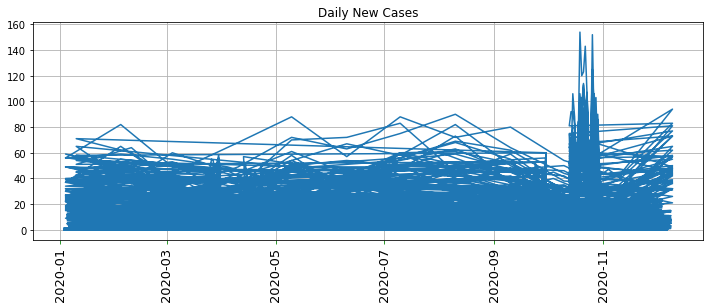

In [37]:
COVID_Combined['date'] = pd.to_datetime(COVID_Combined['date'])

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plt.plot(COVID_Combined.date,COVID_Combined['newCasesBySpecimenDate'])
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13, color='Green')
ax.set_title('Daily New Cases')

COVID_Combined.head()

Below I am checking there are no null values in the this new combined data set. None were found so no further action was needed.

In [38]:
COVID_Combined.isna().sum()

areaType                  0
areaName                  0
areaCode                  0
date                      0
newCasesBySpecimenDate    0
cumCasesBySpecimenDate    0
dtype: int64

Now I am loading the COVID-19 data sets for each borough of London.

Create a datetime object and resampling the data sets.

It is essential to resample these datasets to '1M' or Monthly as the datasets are currently on a daily basis and  property data sets previously loaded are on a monthly basis so for analysis it is important for the data to be comparable.



In [39]:
# Loading each borough into a dataframe and converting 'date' column to datetime object and index.

COVID_BARKING = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Barking and Dagenham.csv')

COVID_BARKING.set_index('date', inplace=True)
COVID_BARKING.index = pd.to_datetime(COVID_BARKING.index)
COVID_BARKING = COVID_BARKING.resample('1M').sum()

#

COVID_BARNET = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Barnet.csv')

COVID_BARNET.set_index('date', inplace=True)
COVID_BARNET.index = pd.to_datetime(COVID_BARNET.index)
COVID_BARNET = COVID_BARNET.resample('1M').sum()

#

COVID_BEXLEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Bexley.csv')

COVID_BEXLEY.set_index('date', inplace=True)
COVID_BEXLEY.index = pd.to_datetime(COVID_BEXLEY.index)
COVID_BEXLEY = COVID_BEXLEY.resample('1M').sum()

#

COVID_BRENT = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Brent.csv')

COVID_BRENT.set_index('date', inplace=True)
COVID_BRENT.index = pd.to_datetime(COVID_BRENT.index)
COVID_BRENT = COVID_BRENT.resample('1M').sum()

#

COVID_BROMLEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Bromley.csv')

COVID_BROMLEY.set_index('date', inplace=True)
COVID_BROMLEY.index = pd.to_datetime(COVID_BROMLEY.index)
COVID_BROMLEY = COVID_BROMLEY.resample('1M').sum()

#

COVID_CAMDEN = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Camden.csv')

COVID_CAMDEN.set_index('date', inplace=True)
COVID_CAMDEN.index = pd.to_datetime(COVID_CAMDEN.index)
COVID_CAMDEN = COVID_CAMDEN.resample('1M').sum()

#

COVID_CITY_HACKNEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID City of london and Hackney.csv')

COVID_CITY_HACKNEY.set_index('date', inplace=True)
COVID_CITY_HACKNEY.index = pd.to_datetime(COVID_CITY_HACKNEY.index)
COVID_CITY_HACKNEY = COVID_CITY_HACKNEY.resample('1M').sum()


#

COVID_CROYDON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Croydon.csv')

COVID_CROYDON.set_index('date', inplace=True)
COVID_CROYDON.index = pd.to_datetime(COVID_CROYDON.index)
COVID_CROYDON = COVID_CROYDON.resample('1M').sum()

#

COVID_EALING = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Ealing.csv')

COVID_EALING.set_index('date', inplace=True)
COVID_EALING.index = pd.to_datetime(COVID_EALING.index)
COVID_EALING = COVID_EALING.resample('1M').sum()

#

COVID_ENFIELD = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Enfield.csv')

COVID_ENFIELD.set_index('date', inplace=True)
COVID_ENFIELD.index = pd.to_datetime(COVID_ENFIELD.index)
COVID_ENFIELD = COVID_ENFIELD.resample('1M').sum()

#

COVID_GREENWICH = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Greenwich.csv')

COVID_GREENWICH.set_index('date', inplace=True)
COVID_GREENWICH.index = pd.to_datetime(COVID_GREENWICH.index)
COVID_GREENWICH = COVID_GREENWICH.resample('1M').sum()

#

COVID_HAMMERSMITH_FULHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Hammersmith and Fulham.csv')

COVID_HAMMERSMITH_FULHAM.set_index('date', inplace=True)
COVID_HAMMERSMITH_FULHAM.index = pd.to_datetime(COVID_HAMMERSMITH_FULHAM.index)
COVID_HAMMERSMITH_FULHAM = COVID_HAMMERSMITH_FULHAM.resample('1M').sum()

#

COVID_HARINGEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Haringey.csv')

COVID_HARINGEY.set_index('date', inplace=True)
COVID_HARINGEY.index = pd.to_datetime(COVID_HARINGEY.index)
COVID_HARINGEY = COVID_HARINGEY.resample('1M').sum()

#

COVID_HARROW = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Harrow.csv')

COVID_HARROW.set_index('date', inplace=True)
COVID_HARROW.index = pd.to_datetime(COVID_HARROW.index)
COVID_HARROW = COVID_HARROW.resample('1M').sum()

#

COVID_HAVERING = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Havering.csv')

COVID_HAVERING.set_index('date', inplace=True)
COVID_HAVERING.index = pd.to_datetime(COVID_HAVERING.index)
COVID_HAVERING = COVID_HAVERING.resample('1M').sum()

#

COVID_HILLINGDON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Hillingdon.csv')

COVID_HILLINGDON.set_index('date', inplace=True)
COVID_HILLINGDON.index = pd.to_datetime(COVID_HILLINGDON.index)
COVID_HILLINGDON = COVID_HILLINGDON.resample('1M').sum()

#

COVID_HOUNSLOW = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Hounslow.csv')

COVID_HOUNSLOW.set_index('date', inplace=True)
COVID_HOUNSLOW.index = pd.to_datetime(COVID_HOUNSLOW.index)
COVID_HOUNSLOW = COVID_HOUNSLOW.resample('1M').sum()

#

COVID_ISLINGTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Islington.csv')

COVID_ISLINGTON.set_index('date', inplace=True)
COVID_ISLINGTON.index = pd.to_datetime(COVID_ISLINGTON.index)
COVID_ISLINGTON = COVID_ISLINGTON.resample('1M').sum()

#

COVID_KENSINGTON_CHELSEA = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Kensington and Chelsea.csv')

COVID_KENSINGTON_CHELSEA.set_index('date', inplace=True)
COVID_KENSINGTON_CHELSEA.index = pd.to_datetime(COVID_KENSINGTON_CHELSEA.index)
COVID_KENSINGTON_CHELSEA = COVID_KENSINGTON_CHELSEA.resample('1M').sum()

#

COVID_KINGSTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Kingston upon Thames.csv')

COVID_KINGSTON.set_index('date', inplace=True)
COVID_KINGSTON.index = pd.to_datetime(COVID_KINGSTON.index)
COVID_KINGSTON = COVID_KINGSTON.resample('1M').sum()

#

COVID_LAMBETH = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Lambeth.csv')

COVID_LAMBETH.set_index('date', inplace=True)
COVID_LAMBETH.index = pd.to_datetime(COVID_LAMBETH.index)
COVID_LAMBETH = COVID_LAMBETH.resample('1M').sum()

#

COVID_LEWISHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Lewisham.csv')

COVID_LEWISHAM.set_index('date', inplace=True)
COVID_LEWISHAM.index = pd.to_datetime(COVID_LEWISHAM.index)
COVID_LEWISHAM = COVID_LEWISHAM.resample('1M').sum()

#

COVID_MERTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Merton.csv')

COVID_MERTON.set_index('date', inplace=True)
COVID_MERTON.index = pd.to_datetime(COVID_MERTON.index)
COVID_MERTON = COVID_MERTON.resample('1M').sum()

#

COVID_NEWHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Newham.csv')

COVID_NEWHAM.set_index('date', inplace=True)
COVID_NEWHAM.index = pd.to_datetime(COVID_NEWHAM.index)
COVID_NEWHAM = COVID_NEWHAM.resample('1M').sum()

#

COVID_REDBRIDGE = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Redbridge.csv')

COVID_REDBRIDGE.set_index('date', inplace=True)
COVID_REDBRIDGE.index = pd.to_datetime(COVID_REDBRIDGE.index)
COVID_REDBRIDGE = COVID_REDBRIDGE.resample('1M').sum()

#

COVID_RICHMOND = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Richmond upon Thames.csv')

COVID_RICHMOND.set_index('date', inplace=True)
COVID_RICHMOND.index = pd.to_datetime(COVID_RICHMOND.index)
COVID_RICHMOND = COVID_RICHMOND.resample('1M').sum()

#

COVID_SOUTHWARK = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Southwark.csv')

COVID_SOUTHWARK.set_index('date', inplace=True)
COVID_SOUTHWARK.index = pd.to_datetime(COVID_SOUTHWARK.index)
COVID_SOUTHWARK = COVID_SOUTHWARK.resample('1M').sum()

#

COVID_SUTTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Sutton.csv')

COVID_SUTTON.set_index('date', inplace=True)
COVID_SUTTON.index = pd.to_datetime(COVID_SUTTON.index)
COVID_SUTTON = COVID_SUTTON.resample('1M').sum()

#

COVID_TOWER_HAMLETS = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Tower Hamlets.csv')

COVID_TOWER_HAMLETS.set_index('date', inplace=True)
COVID_TOWER_HAMLETS.index = pd.to_datetime(COVID_TOWER_HAMLETS.index)
COVID_TOWER_HAMLETS = COVID_TOWER_HAMLETS.resample('1M').sum()

#

COVID_WALTHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Waltham Forest.csv')

COVID_WALTHAM.set_index('date', inplace=True)
COVID_WALTHAM.index = pd.to_datetime(COVID_WALTHAM.index)
COVID_WALTHAM = COVID_WALTHAM.resample('1M').sum()

#

COVID_WANDSWORTH = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Wandsworth.csv')

COVID_WANDSWORTH.set_index('date', inplace=True)
COVID_WANDSWORTH.index = pd.to_datetime(COVID_WANDSWORTH.index)
COVID_WANDSWORTH = COVID_WANDSWORTH.resample('1M').sum()

#

COVID_WESTMINSTER = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Westminster.csv')

COVID_WESTMINSTER.set_index('date', inplace=True)
COVID_WESTMINSTER.index = pd.to_datetime(COVID_WESTMINSTER.index)
COVID_WESTMINSTER = COVID_WESTMINSTER.resample('1M').sum()

Now that the datasets have been loaded and prepared the code below is used to plot the COVID-19 datasets for each individual borough of London.

The plots have also been set with a Y axis range between 0 and 1800 so that they are comparable.

Text(0.5, 1.0, 'Westminster')

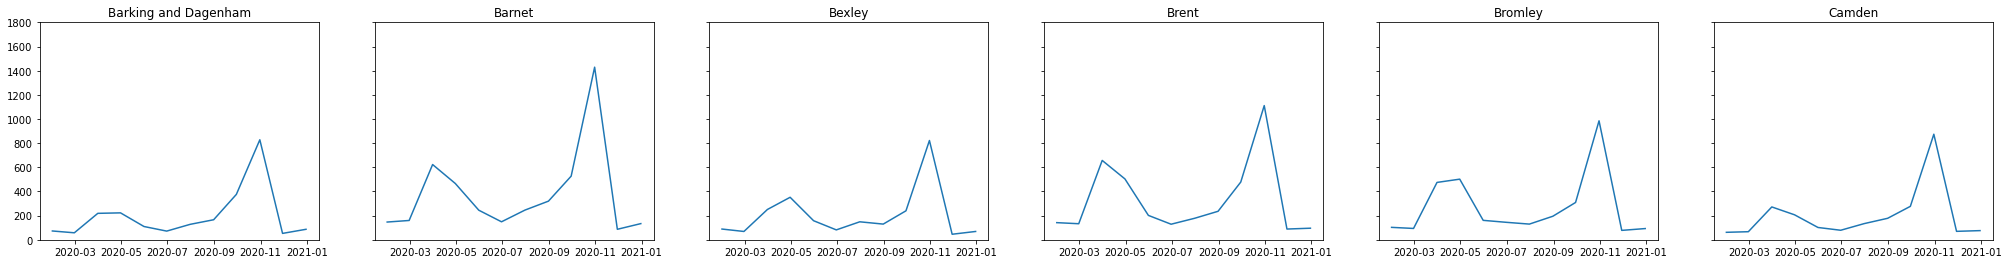

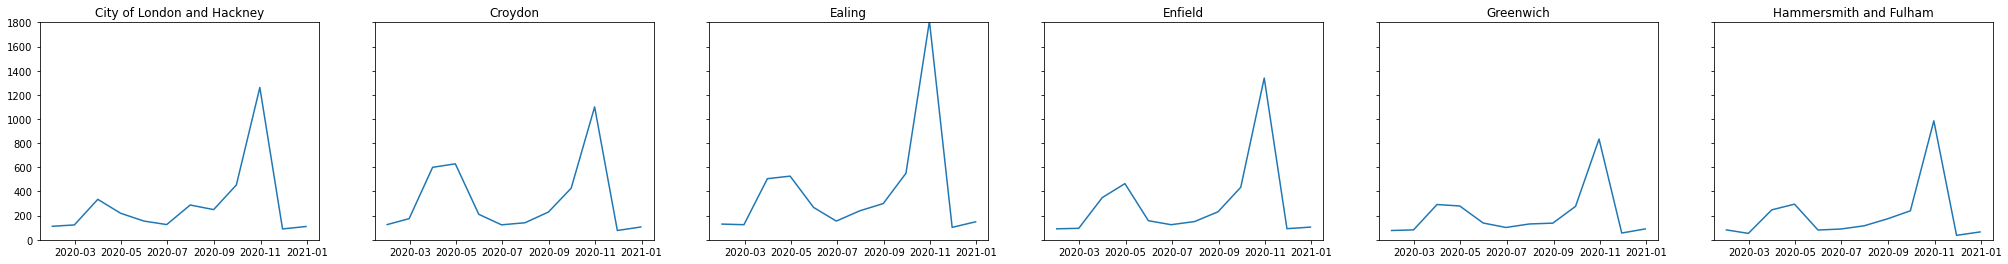

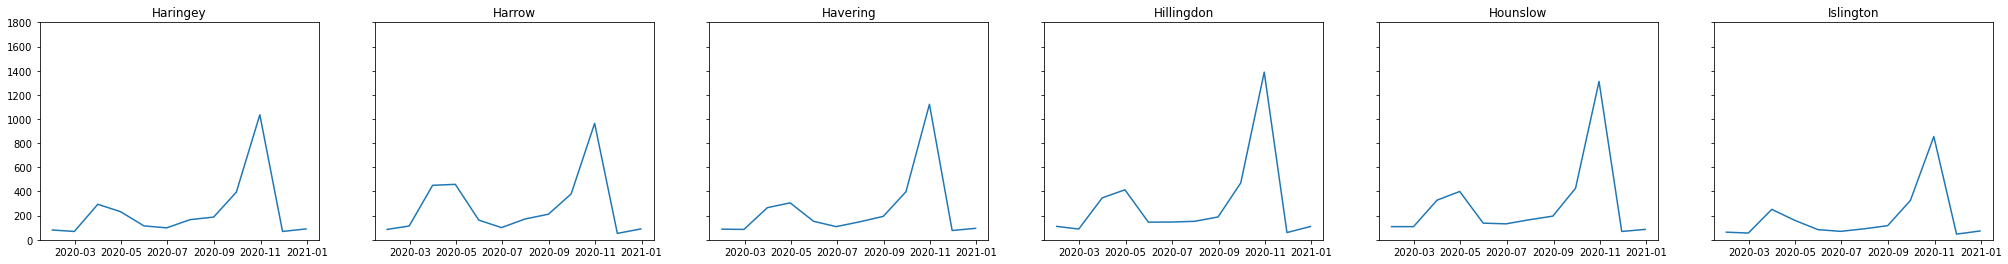

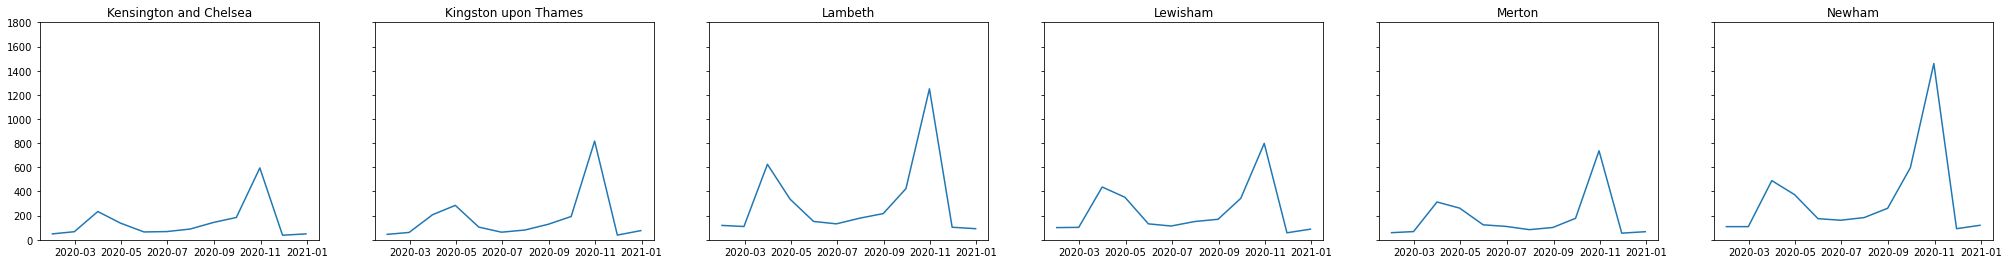

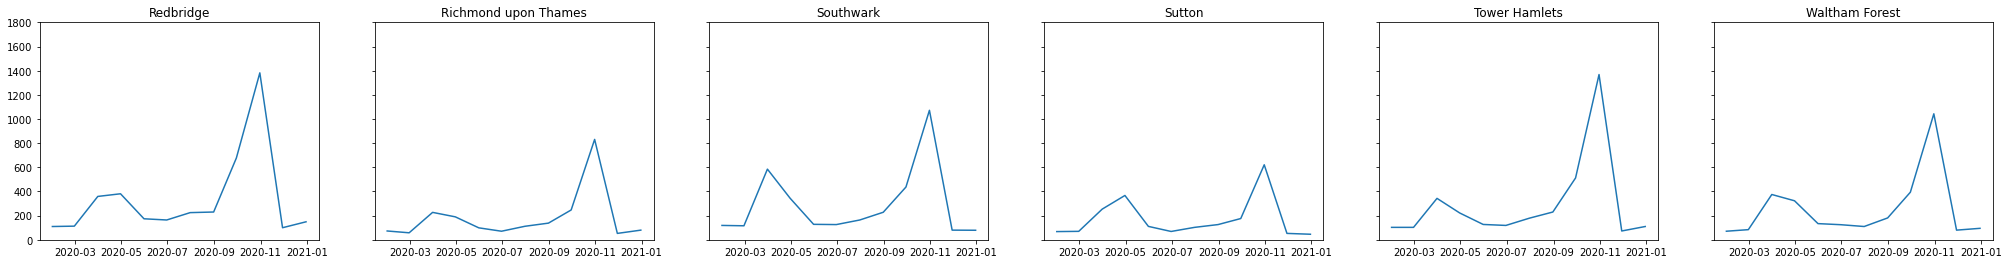

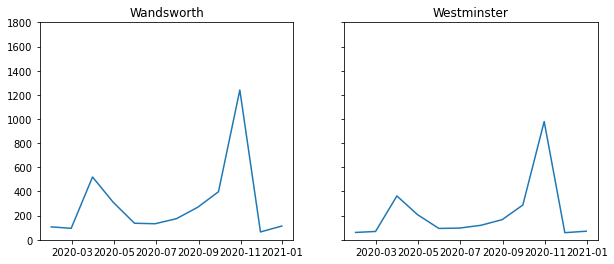

In [40]:
# Now I'm making a grid of subplots, which share a y-axis for each borough.

f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize=(35, 4))

# 
ax1.plot(COVID_BARKING.index,COVID_BARKING['newCasesBySpecimenDate'])
ax1.set_title('Barking and Dagenham')
ax1.set_ylim(0, 1800)
# 
ax2.plot(COVID_BARNET.index,COVID_BARNET['newCasesBySpecimenDate'])
ax2.set_title('Barnet')

#
ax3.plot(COVID_BEXLEY.index,COVID_BEXLEY['newCasesBySpecimenDate'])
ax3.set_title('Bexley')

#
ax4.plot(COVID_BRENT.index,COVID_BRENT['newCasesBySpecimenDate'])
ax4.set_title('Brent')

#
ax5.plot(COVID_BROMLEY.index,COVID_BROMLEY['newCasesBySpecimenDate'])
ax5.set_title('Bromley')

#
ax6.plot(COVID_CAMDEN.index,COVID_CAMDEN['newCasesBySpecimenDate'])
ax6.set_title('Camden')
#

f, (ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(1, 6, sharey=True, figsize=(35, 4))

#
ax7.plot(COVID_CITY_HACKNEY.index,COVID_CITY_HACKNEY['newCasesBySpecimenDate'])
ax7.set_title('City of London and Hackney')
ax7.set_ylim(0, 1800)
#
ax8.plot(COVID_CROYDON.index,COVID_CROYDON['newCasesBySpecimenDate'])
ax8.set_title('Croydon')

#
ax9.plot(COVID_EALING.index,COVID_EALING['newCasesBySpecimenDate'])
ax9.set_title('Ealing')

#
ax10.plot(COVID_ENFIELD.index,COVID_ENFIELD['newCasesBySpecimenDate'])
ax10.set_title('Enfield')

#
ax11.plot(COVID_GREENWICH.index,COVID_GREENWICH['newCasesBySpecimenDate'])
ax11.set_title('Greenwich')

#
ax12.plot(COVID_HAMMERSMITH_FULHAM.index,COVID_HAMMERSMITH_FULHAM['newCasesBySpecimenDate'])
ax12.set_title('Hammersmith and Fulham')
#

f, (ax13,ax14,ax15,ax16,ax17,ax18) = plt.subplots(1, 6, sharey=True, figsize=(35, 4))

#

ax13.plot(COVID_HARINGEY.index,COVID_HARINGEY['newCasesBySpecimenDate'])
ax13.set_title('Haringey')
ax13.set_ylim(0, 1800)
#
ax14.plot(COVID_HARROW.index,COVID_HARROW['newCasesBySpecimenDate'])
ax14.set_title('Harrow')

#
ax15.plot(COVID_HAVERING.index,COVID_HAVERING['newCasesBySpecimenDate'])
ax15.set_title('Havering')

#
ax16.plot(COVID_HILLINGDON.index,COVID_HILLINGDON['newCasesBySpecimenDate'])
ax16.set_title('Hillingdon')

#
ax17.plot(COVID_HOUNSLOW.index,COVID_HOUNSLOW['newCasesBySpecimenDate'])
ax17.set_title('Hounslow')

#
ax18.plot(COVID_ISLINGTON.index,COVID_ISLINGTON['newCasesBySpecimenDate'])
ax18.set_title('Islington')
#

f, (ax19, ax20,ax21,ax22,ax23,ax24) = plt.subplots(1, 6, sharey=True, figsize=(35, 4))

#
ax19.plot(COVID_KENSINGTON_CHELSEA.index,COVID_KENSINGTON_CHELSEA['newCasesBySpecimenDate'])
ax19.set_title('Kensington and Chelsea')
ax19.set_ylim(0, 1800)
#
ax20.plot(COVID_KINGSTON.index,COVID_KINGSTON['newCasesBySpecimenDate'])
ax20.set_title('Kingston upon Thames')

#
ax21.plot(COVID_LAMBETH.index,COVID_LAMBETH['newCasesBySpecimenDate'])
ax21.set_title('Lambeth')

#
ax22.plot(COVID_LEWISHAM.index,COVID_LEWISHAM['newCasesBySpecimenDate'])
ax22.set_title('Lewisham')

#
ax23.plot(COVID_MERTON.index,COVID_MERTON['newCasesBySpecimenDate'])
ax23.set_title('Merton')

#
ax24.plot(COVID_NEWHAM.index,COVID_NEWHAM['newCasesBySpecimenDate'])
ax24.set_title('Newham')

#

f, (ax25,ax26,ax27,ax28,ax29,ax30) = plt.subplots(1, 6, sharey=True, figsize=(35, 4))

#
ax25.plot(COVID_REDBRIDGE.index,COVID_REDBRIDGE['newCasesBySpecimenDate'])
ax25.set_title('Redbridge')
ax25.set_ylim(0, 1800)
#
ax26.plot(COVID_RICHMOND.index,COVID_RICHMOND['newCasesBySpecimenDate'])
ax26.set_title('Richmond upon Thames')

#
ax27.plot(COVID_SOUTHWARK.index,COVID_SOUTHWARK['newCasesBySpecimenDate'])
ax27.set_title('Southwark')

#
ax28.plot(COVID_SUTTON.index,COVID_SUTTON['newCasesBySpecimenDate'])
ax28.set_title('Sutton')

#
ax29.plot(COVID_TOWER_HAMLETS.index,COVID_TOWER_HAMLETS['newCasesBySpecimenDate'])
ax29.set_title('Tower Hamlets')

#
ax30.plot(COVID_WALTHAM.index,COVID_WALTHAM['newCasesBySpecimenDate'])
ax30.set_title('Waltham Forest')

#

f, (ax31,ax32) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

#
ax31.plot(COVID_WANDSWORTH.index,COVID_WANDSWORTH['newCasesBySpecimenDate'])
ax31.set_title('Wandsworth')
ax31.set_ylim(0, 1800)
#
ax32.plot(COVID_WESTMINSTER.index,COVID_WESTMINSTER['newCasesBySpecimenDate'])
ax32.set_title('Westminster')

Now I am plotting the individual COVID-19 datasets for each borough onto a single visualisation.

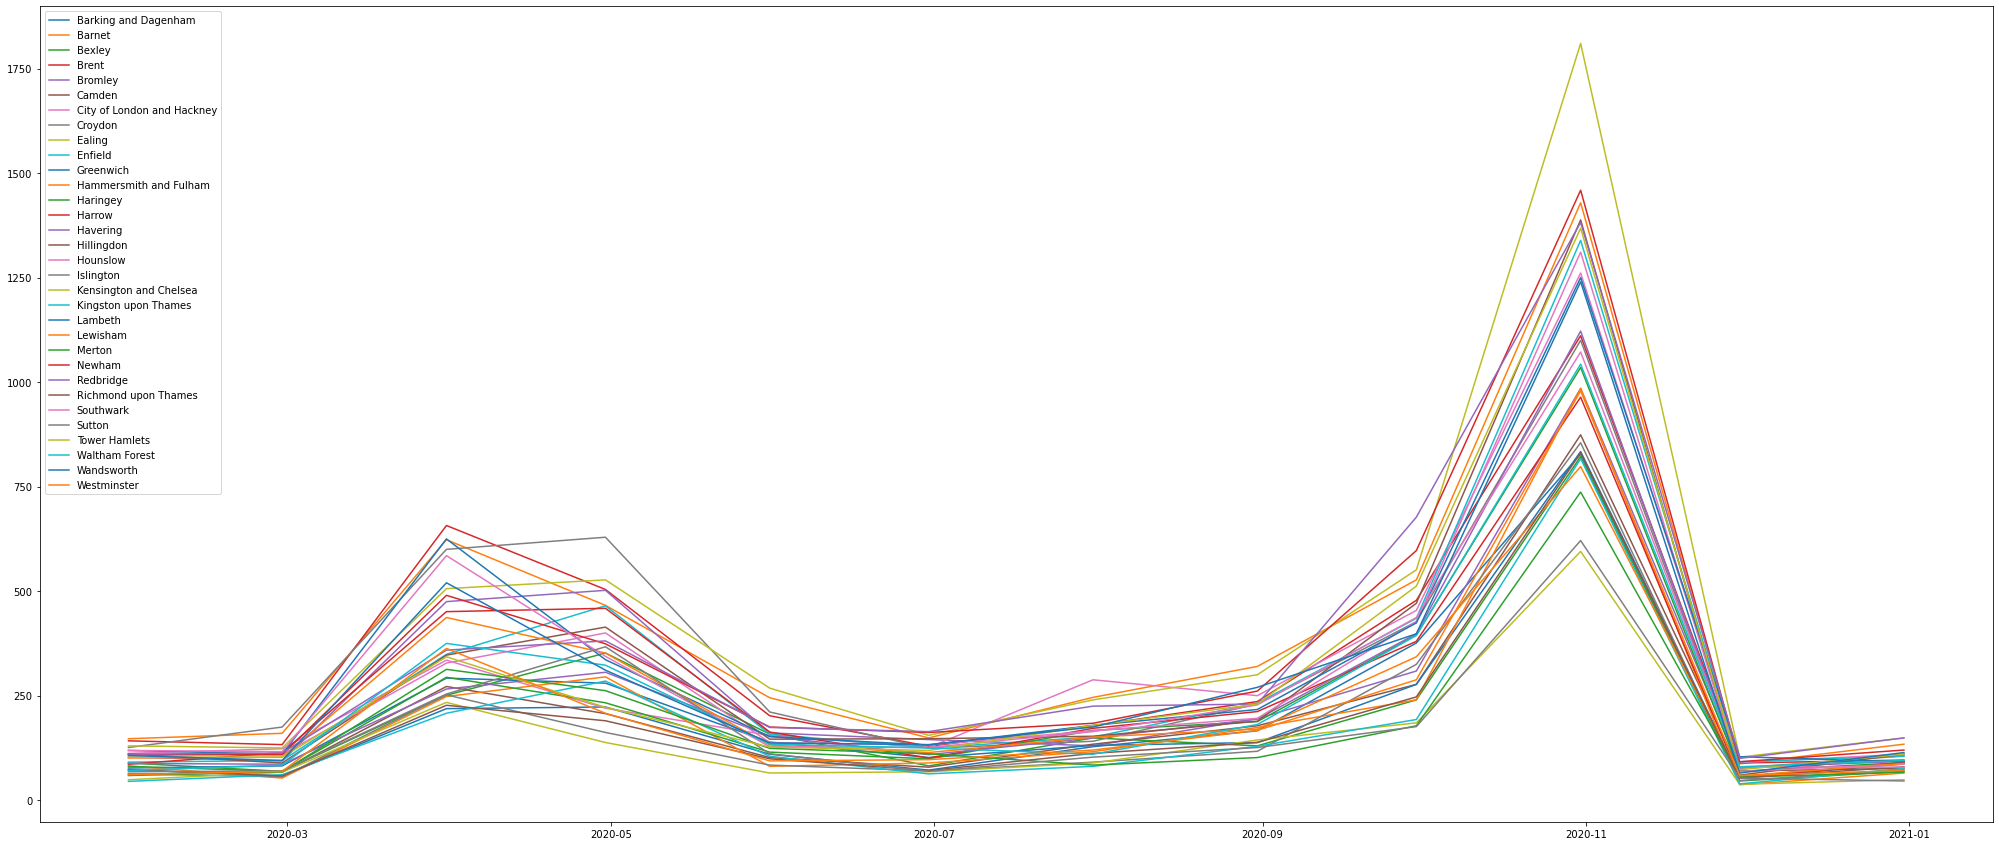

In [41]:
# Combining covid data for all boroughs.

# Now I'm making a grid of subplots, which share a y-axis for each borough.

#f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(35, 15))

fig = plt.figure(figsize=(35,15))
ax = fig.add_subplot(111)

# 
plt.plot(COVID_BARKING.index,COVID_BARKING['newCasesBySpecimenDate'], label="Barking and Dagenham")
#ax1.set_title('Barking and Dagenham')


# 
plt.plot(COVID_BARNET.index,COVID_BARNET['newCasesBySpecimenDate'], label="Barnet")
#ax1.set_title('Barnet')

#
plt.plot(COVID_BEXLEY.index,COVID_BEXLEY['newCasesBySpecimenDate'], label="Bexley")
#ax3.set_title('Bexley')

#
plt.plot(COVID_BRENT.index,COVID_BRENT['newCasesBySpecimenDate'], label="Brent")
#ax4.set_title('Brent')

#
plt.plot(COVID_BROMLEY.index,COVID_BROMLEY['newCasesBySpecimenDate'], label="Bromley")
#ax5.set_title('Bromley')

#
plt.plot(COVID_CAMDEN.index,COVID_CAMDEN['newCasesBySpecimenDate'], label="Camden")
#ax6.set_title('Camden')
#


plt.plot(COVID_CITY_HACKNEY.index,COVID_CITY_HACKNEY['newCasesBySpecimenDate'], label="City of London and Hackney")
#ax7.set_title('City of London and Hackney')

#
plt.plot(COVID_CROYDON.index,COVID_CROYDON['newCasesBySpecimenDate'], label="Croydon")
#ax8.set_title('Croydon')

#
plt.plot(COVID_EALING.index,COVID_EALING['newCasesBySpecimenDate'], label="Ealing")
#ax9.set_title('Ealing')

#
plt.plot(COVID_ENFIELD.index,COVID_ENFIELD['newCasesBySpecimenDate'], label="Enfield")
#ax10.set_title('Enfield')

#
plt.plot(COVID_GREENWICH.index,COVID_GREENWICH['newCasesBySpecimenDate'], label="Greenwich")
#ax11.set_title('Greenwich')

#
plt.plot(COVID_HAMMERSMITH_FULHAM.index,COVID_HAMMERSMITH_FULHAM['newCasesBySpecimenDate'], label="Hammersmith and Fulham")
#ax12.set_title('Hammersmith and Fulham')
#

plt.plot(COVID_HARINGEY.index,COVID_HARINGEY['newCasesBySpecimenDate'], label="Haringey")
#ax13.set_title('Haringey')

#
plt.plot(COVID_HARROW.index,COVID_HARROW['newCasesBySpecimenDate'], label="Harrow")
#ax14.set_title('Harrow')

#
plt.plot(COVID_HAVERING.index,COVID_HAVERING['newCasesBySpecimenDate'], label="Havering")
#ax15.set_title('Havering')

#
plt.plot(COVID_HILLINGDON.index,COVID_HILLINGDON['newCasesBySpecimenDate'], label="Hillingdon")
#ax16.set_title('Hillingdon')

#
plt.plot(COVID_HOUNSLOW.index,COVID_HOUNSLOW['newCasesBySpecimenDate'], label="Hounslow")
#ax17.set_title('Hounslow')

#
plt.plot(COVID_ISLINGTON.index,COVID_ISLINGTON['newCasesBySpecimenDate'], label="Islington")
#ax18.set_title('Islington')
#

plt.plot(COVID_KENSINGTON_CHELSEA.index,COVID_KENSINGTON_CHELSEA['newCasesBySpecimenDate'], label="Kensington and Chelsea")
#ax19.set_title('Kensington and Chelsea')

#
plt.plot(COVID_KINGSTON.index,COVID_KINGSTON['newCasesBySpecimenDate'], label="Kingston upon Thames")
#ax20.set_title('Kingston upon Thames')

#
plt.plot(COVID_LAMBETH.index,COVID_LAMBETH['newCasesBySpecimenDate'], label="Lambeth")
#ax21.set_title('Lambeth')

#
plt.plot(COVID_LEWISHAM.index,COVID_LEWISHAM['newCasesBySpecimenDate'], label="Lewisham")
#ax22.set_title('Lewisham')

#
plt.plot(COVID_MERTON.index,COVID_MERTON['newCasesBySpecimenDate'], label="Merton")
#ax23.set_title('Merton')

#
plt.plot(COVID_NEWHAM.index,COVID_NEWHAM['newCasesBySpecimenDate'], label="Newham")
#ax24.set_title('Newham')
#

plt.plot(COVID_REDBRIDGE.index,COVID_REDBRIDGE['newCasesBySpecimenDate'], label="Redbridge")
#ax25.set_title('Redbridge')

#
plt.plot(COVID_RICHMOND.index,COVID_RICHMOND['newCasesBySpecimenDate'], label="Richmond upon Thames")
#ax26.set_title('Richmond upon Thames')

#
plt.plot(COVID_SOUTHWARK.index,COVID_SOUTHWARK['newCasesBySpecimenDate'], label="Southwark")
#ax27.set_title('Southwark')

#
plt.plot(COVID_SUTTON.index,COVID_SUTTON['newCasesBySpecimenDate'], label="Sutton")
#ax28.set_title('Sutton')

#
plt.plot(COVID_TOWER_HAMLETS.index,COVID_TOWER_HAMLETS['newCasesBySpecimenDate'], label="Tower Hamlets")
#ax29.set_title('Tower Hamlets')

#
plt.plot(COVID_WALTHAM.index,COVID_WALTHAM['newCasesBySpecimenDate'], label="Waltham Forest")
#ax30.set_title('Waltham Forest')
#

plt.plot(COVID_WANDSWORTH.index,COVID_WANDSWORTH['newCasesBySpecimenDate'], label="Wandsworth")
#ax31.set_title('Wandsworth')

#
plt.plot(COVID_WESTMINSTER.index,COVID_WESTMINSTER['newCasesBySpecimenDate'], label="Westminster")
#ax32.set_title('Westminster')

plt.legend(loc="upper left")



**Placing the COVID-19 data within the correct time frame to allow for analysis.**

Now that we have had a look at the COVID-19 Datasets for the boroughs of London, we can clearly see that further wrangling is necessary for comparable analysis with the property price data sets.

As the property price data sets only have available data until 2020-06, it is important to amend all the COVID-19 datasets so that they only show the data from 2020-02(when the data began for COVID) and 2020-06(where the data stops for the property price data).

Firstly we do this for the dataset that includes the overall COVID-19 data for the whole of London.

Text(0.5, 1.0, 'Daily New Cases')

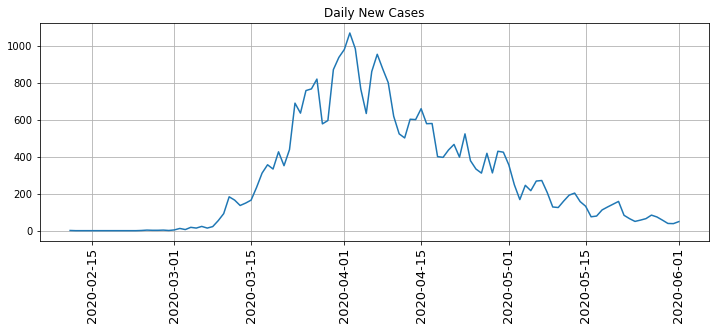

In [42]:
total_london_covid['date'] = pd.to_datetime(total_london_covid['date'])

# Need to remove first 177 rows to resample data to the end of 2020-06
total_london_covid = total_london_covid.drop(total_london_covid.head(177).index)

#total_london_covid

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plt.plot(total_london_covid['date'],total_london_covid['newCasesBySpecimenDate'])
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)
ax.set_title('Daily New Cases')

Now I am loading the COVID-19 data for each London borough, setting the 'date' column to index and making it a datetime object.

Then we are once again resampling the data so that it changes from daily data to monthly by aggregating.

And finally I am amending the dataset so it only includes data up until 2020-06.

In [43]:
# Loading each borough into a dataframe and converting 'date' column to datetime object and index.

COVID_BARKING = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Barking and Dagenham.csv')

COVID_BARKING.set_index('date', inplace=True)
COVID_BARKING.index = pd.to_datetime(COVID_BARKING.index)
COVID_BARKING = COVID_BARKING.resample('1M').sum()
COVID_BARKING = COVID_BARKING.drop(COVID_BARKING.tail(7).index)
#

COVID_BARNET = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Barnet.csv')

COVID_BARNET.set_index('date', inplace=True)
COVID_BARNET.index = pd.to_datetime(COVID_BARNET.index)
COVID_BARNET = COVID_BARNET.resample('1M').sum()
COVID_BARNET = COVID_BARNET.drop(COVID_BARNET.tail(7).index)
#

COVID_BEXLEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Bexley.csv')

COVID_BEXLEY.set_index('date', inplace=True)
COVID_BEXLEY.index = pd.to_datetime(COVID_BEXLEY.index)
COVID_BEXLEY = COVID_BEXLEY.resample('1M').sum()
COVID_BEXLEY = COVID_BEXLEY.drop(COVID_BEXLEY.tail(7).index)
#

COVID_BRENT = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Brent.csv')

COVID_BRENT.set_index('date', inplace=True)
COVID_BRENT.index = pd.to_datetime(COVID_BRENT.index)
COVID_BRENT = COVID_BRENT.resample('1M').sum()
COVID_BRENT = COVID_BRENT.drop(COVID_BRENT.tail(7).index)
#

COVID_BROMLEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Bromley.csv')

COVID_BROMLEY.set_index('date', inplace=True)
COVID_BROMLEY.index = pd.to_datetime(COVID_BROMLEY.index)
COVID_BROMLEY = COVID_BROMLEY.resample('1M').sum()
COVID_BROMLEY = COVID_BROMLEY.drop(COVID_BROMLEY.tail(7).index)
#

COVID_CAMDEN = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Camden.csv')

COVID_CAMDEN.set_index('date', inplace=True)
COVID_CAMDEN.index = pd.to_datetime(COVID_CAMDEN.index)
COVID_CAMDEN = COVID_CAMDEN.resample('1M').sum()
COVID_CAMDEN = COVID_CAMDEN.drop(COVID_CAMDEN.tail(7).index)
#

COVID_CITY_HACKNEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID City of london and Hackney.csv')

COVID_CITY_HACKNEY.set_index('date', inplace=True)
COVID_CITY_HACKNEY.index = pd.to_datetime(COVID_CITY_HACKNEY.index)
COVID_CITY_HACKNEY = COVID_CITY_HACKNEY.resample('1M').sum()
COVID_CITY_HACKNEY = COVID_CITY_HACKNEY.drop(COVID_CITY_HACKNEY.tail(7).index)

#

COVID_CROYDON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Croydon.csv')

COVID_CROYDON.set_index('date', inplace=True)
COVID_CROYDON.index = pd.to_datetime(COVID_CROYDON.index)
COVID_CROYDON = COVID_CROYDON.resample('1M').sum()
COVID_CROYDON = COVID_CROYDON.drop(COVID_CROYDON.tail(7).index)
#

COVID_EALING = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Ealing.csv')

COVID_EALING.set_index('date', inplace=True)
COVID_EALING.index = pd.to_datetime(COVID_EALING.index)
COVID_EALING = COVID_EALING.resample('1M').sum()
COVID_EALING = COVID_EALING.drop(COVID_EALING.tail(7).index)
#

COVID_ENFIELD = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Enfield.csv')

COVID_ENFIELD.set_index('date', inplace=True)
COVID_ENFIELD.index = pd.to_datetime(COVID_ENFIELD.index)
COVID_ENFIELD = COVID_ENFIELD.resample('1M').sum()
COVID_ENFIELD = COVID_ENFIELD.drop(COVID_ENFIELD.tail(7).index)
#

COVID_GREENWICH = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Greenwich.csv')

COVID_GREENWICH.set_index('date', inplace=True)
COVID_GREENWICH.index = pd.to_datetime(COVID_GREENWICH.index)
COVID_GREENWICH = COVID_GREENWICH.resample('1M').sum()
COVID_GREENWICH = COVID_GREENWICH.drop(COVID_GREENWICH.tail(7).index)
#

COVID_HAMMERSMITH_FULHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Hammersmith and Fulham.csv')

COVID_HAMMERSMITH_FULHAM.set_index('date', inplace=True)
COVID_HAMMERSMITH_FULHAM.index = pd.to_datetime(COVID_HAMMERSMITH_FULHAM.index)
COVID_HAMMERSMITH_FULHAM = COVID_HAMMERSMITH_FULHAM.resample('1M').sum()
COVID_HAMMERSMITH_FULHAM = COVID_HAMMERSMITH_FULHAM.drop(COVID_HAMMERSMITH_FULHAM.tail(7).index)
#

COVID_HARINGEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Haringey.csv')

COVID_HARINGEY.set_index('date', inplace=True)
COVID_HARINGEY.index = pd.to_datetime(COVID_HARINGEY.index)
COVID_HARINGEY = COVID_HARINGEY.resample('1M').sum()
COVID_HARINGEY = COVID_HARINGEY.drop(COVID_HARINGEY.tail(7).index)
#

COVID_HARROW = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Harrow.csv')

COVID_HARROW.set_index('date', inplace=True)
COVID_HARROW.index = pd.to_datetime(COVID_HARROW.index)
COVID_HARROW = COVID_HARROW.resample('1M').sum()
COVID_HARROW = COVID_HARROW.drop(COVID_HARROW.tail(7).index)
#

COVID_HAVERING = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Havering.csv')

COVID_HAVERING.set_index('date', inplace=True)
COVID_HAVERING.index = pd.to_datetime(COVID_HAVERING.index)
COVID_HAVERING = COVID_HAVERING.resample('1M').sum()
COVID_HAVERING = COVID_HAVERING.drop(COVID_HAVERING.tail(7).index)
#

COVID_HILLINGDON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Hillingdon.csv')

COVID_HILLINGDON.set_index('date', inplace=True)
COVID_HILLINGDON.index = pd.to_datetime(COVID_HILLINGDON.index)
COVID_HILLINGDON = COVID_HILLINGDON.resample('1M').sum()
COVID_HILLINGDON = COVID_HILLINGDON.drop(COVID_HILLINGDON.tail(7).index)
#

COVID_HOUNSLOW = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Hounslow.csv')

COVID_HOUNSLOW.set_index('date', inplace=True)
COVID_HOUNSLOW.index = pd.to_datetime(COVID_HOUNSLOW.index)
COVID_HOUNSLOW = COVID_HOUNSLOW.resample('1M').sum()
COVID_HOUNSLOW = COVID_HOUNSLOW.drop(COVID_HOUNSLOW.tail(7).index)
#

COVID_ISLINGTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Islington.csv')

COVID_ISLINGTON.set_index('date', inplace=True)
COVID_ISLINGTON.index = pd.to_datetime(COVID_ISLINGTON.index)
COVID_ISLINGTON = COVID_ISLINGTON.resample('1M').sum()
COVID_ISLINGTON = COVID_ISLINGTON.drop(COVID_ISLINGTON.tail(7).index)
#

COVID_KENSINGTON_CHELSEA = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Kensington and Chelsea.csv')

COVID_KENSINGTON_CHELSEA.set_index('date', inplace=True)
COVID_KENSINGTON_CHELSEA.index = pd.to_datetime(COVID_KENSINGTON_CHELSEA.index)
COVID_KENSINGTON_CHELSEA = COVID_KENSINGTON_CHELSEA.resample('1M').sum()
COVID_KENSINGTON_CHELSEA = COVID_KENSINGTON_CHELSEA.drop(COVID_KENSINGTON_CHELSEA.tail(7).index)
#

COVID_KINGSTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Kingston upon Thames.csv')

COVID_KINGSTON.set_index('date', inplace=True)
COVID_KINGSTON.index = pd.to_datetime(COVID_KINGSTON.index)
COVID_KINGSTON = COVID_KINGSTON.resample('1M').sum()
COVID_KINGSTON = COVID_KINGSTON.drop(COVID_KINGSTON.tail(7).index)
#

COVID_LAMBETH = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Lambeth.csv')

COVID_LAMBETH.set_index('date', inplace=True)
COVID_LAMBETH.index = pd.to_datetime(COVID_LAMBETH.index)
COVID_LAMBETH = COVID_LAMBETH.resample('1M').sum()
COVID_LAMBETH = COVID_LAMBETH.drop(COVID_LAMBETH.tail(7).index)
#

COVID_LEWISHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Lewisham.csv')

COVID_LEWISHAM.set_index('date', inplace=True)
COVID_LEWISHAM.index = pd.to_datetime(COVID_LEWISHAM.index)
COVID_LEWISHAM = COVID_LEWISHAM.resample('1M').sum()
COVID_LEWISHAM = COVID_LEWISHAM.drop(COVID_LEWISHAM.tail(7).index)
#

COVID_MERTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Merton.csv')

COVID_MERTON.set_index('date', inplace=True)
COVID_MERTON.index = pd.to_datetime(COVID_MERTON.index)
COVID_MERTON = COVID_MERTON.resample('1M').sum()
COVID_MERTON = COVID_MERTON.drop(COVID_MERTON.tail(7).index)
#

COVID_NEWHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Newham.csv')

COVID_NEWHAM.set_index('date', inplace=True)
COVID_NEWHAM.index = pd.to_datetime(COVID_NEWHAM.index)
COVID_NEWHAM = COVID_NEWHAM.resample('1M').sum()
COVID_NEWHAM = COVID_NEWHAM.drop(COVID_NEWHAM.tail(7).index)
#

COVID_REDBRIDGE = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Redbridge.csv')

COVID_REDBRIDGE.set_index('date', inplace=True)
COVID_REDBRIDGE.index = pd.to_datetime(COVID_REDBRIDGE.index)
COVID_REDBRIDGE = COVID_REDBRIDGE.resample('1M').sum()
COVID_REDBRIDGE = COVID_REDBRIDGE.drop(COVID_REDBRIDGE.tail(7).index)
#

COVID_RICHMOND = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Richmond upon Thames.csv')

COVID_RICHMOND.set_index('date', inplace=True)
COVID_RICHMOND.index = pd.to_datetime(COVID_RICHMOND.index)
COVID_RICHMOND = COVID_RICHMOND.resample('1M').sum()
COVID_RICHMOND = COVID_RICHMOND.drop(COVID_RICHMOND.tail(7).index)
#

COVID_SOUTHWARK = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Southwark.csv')

COVID_SOUTHWARK.set_index('date', inplace=True)
COVID_SOUTHWARK.index = pd.to_datetime(COVID_SOUTHWARK.index)
COVID_SOUTHWARK = COVID_SOUTHWARK.resample('1M').sum()
COVID_SOUTHWARK = COVID_SOUTHWARK.drop(COVID_SOUTHWARK.tail(7).index)
#

COVID_SUTTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Sutton.csv')

COVID_SUTTON.set_index('date', inplace=True)
COVID_SUTTON.index = pd.to_datetime(COVID_SUTTON.index)
COVID_SUTTON = COVID_SUTTON.resample('1M').sum()
COVID_SUTTON = COVID_SUTTON.drop(COVID_SUTTON.tail(7).index)
#

COVID_TOWER_HAMLETS = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Tower Hamlets.csv')

COVID_TOWER_HAMLETS.set_index('date', inplace=True)
COVID_TOWER_HAMLETS.index = pd.to_datetime(COVID_TOWER_HAMLETS.index)
COVID_TOWER_HAMLETS = COVID_TOWER_HAMLETS.resample('1M').sum()
COVID_TOWER_HAMLETS = COVID_TOWER_HAMLETS.drop(COVID_TOWER_HAMLETS.tail(7).index)
#

COVID_WALTHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Waltham Forest.csv')

COVID_WALTHAM.set_index('date', inplace=True)
COVID_WALTHAM.index = pd.to_datetime(COVID_WALTHAM.index)
COVID_WALTHAM = COVID_WALTHAM.resample('1M').sum()
COVID_WALTHAM = COVID_WALTHAM.drop(COVID_WALTHAM.tail(7).index)
#

COVID_WANDSWORTH = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Wandsworth.csv')

COVID_WANDSWORTH.set_index('date', inplace=True)
COVID_WANDSWORTH.index = pd.to_datetime(COVID_WANDSWORTH.index)
COVID_WANDSWORTH = COVID_WANDSWORTH.resample('1M').sum()
COVID_WANDSWORTH = COVID_WANDSWORTH.drop(COVID_WANDSWORTH.tail(7).index)
#

COVID_WESTMINSTER = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Westminster.csv')

COVID_WESTMINSTER.set_index('date', inplace=True)
COVID_WESTMINSTER.index = pd.to_datetime(COVID_WESTMINSTER.index)
COVID_WESTMINSTER = COVID_WESTMINSTER.resample('1M').sum()
COVID_WESTMINSTER = COVID_WESTMINSTER.drop(COVID_WESTMINSTER.tail(7).index)

Now that the data is all loaded and set to the right time scale to match the property data, I am using the code below to plot this data again to see how the distribution has changed and enable further comparison between each borough.

NOTE: Once again I have set the Y axis limit so that all visualisations are on the same scale.

(0.0, 1000.0)

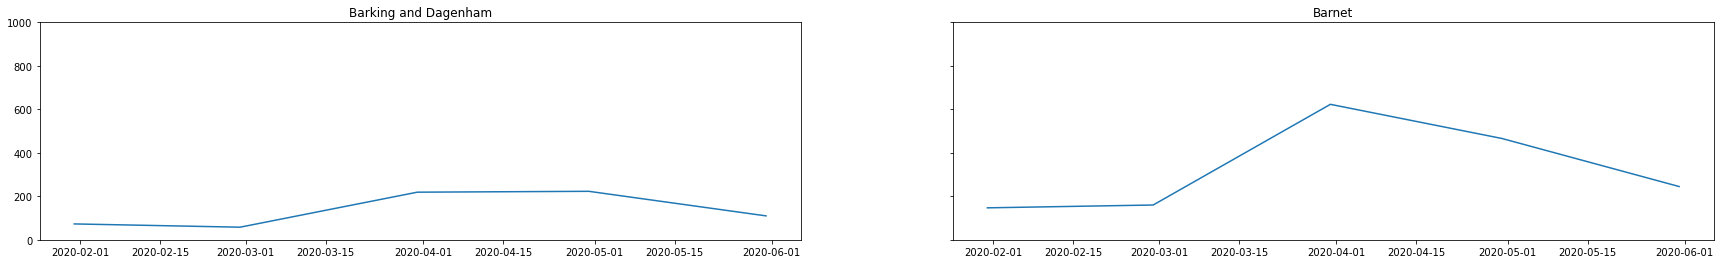

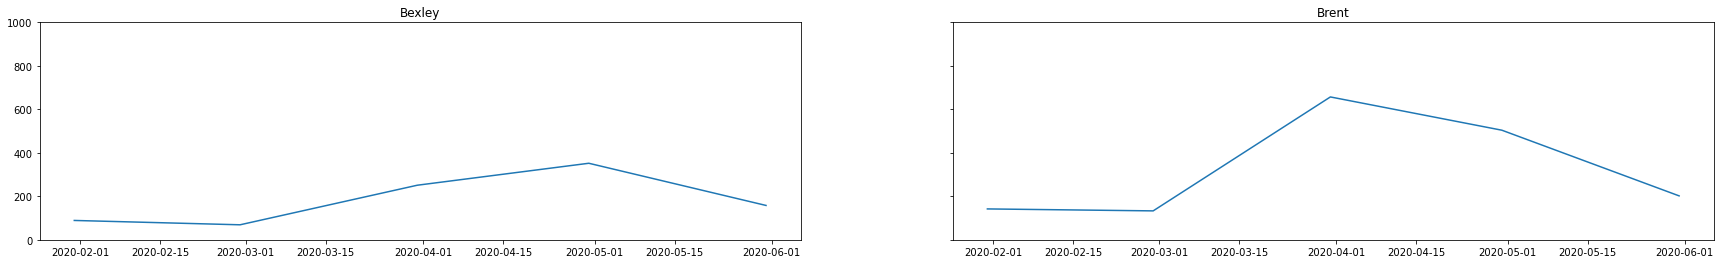

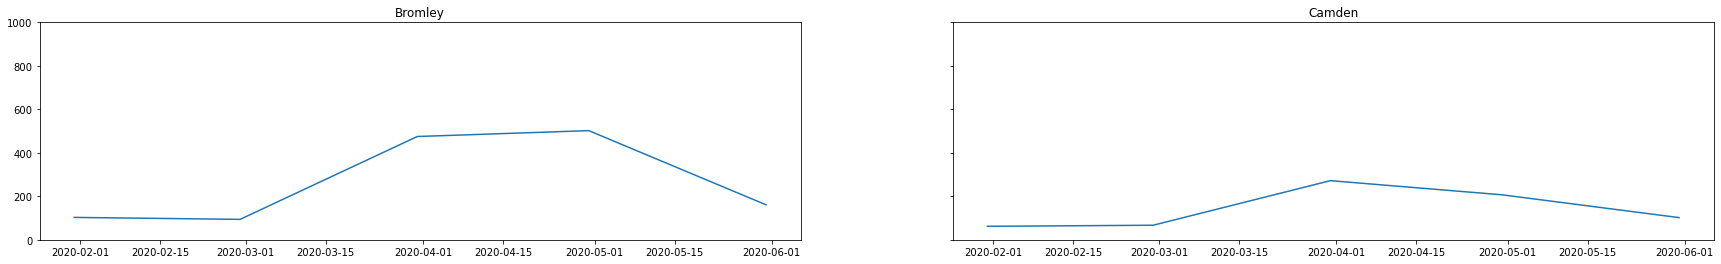

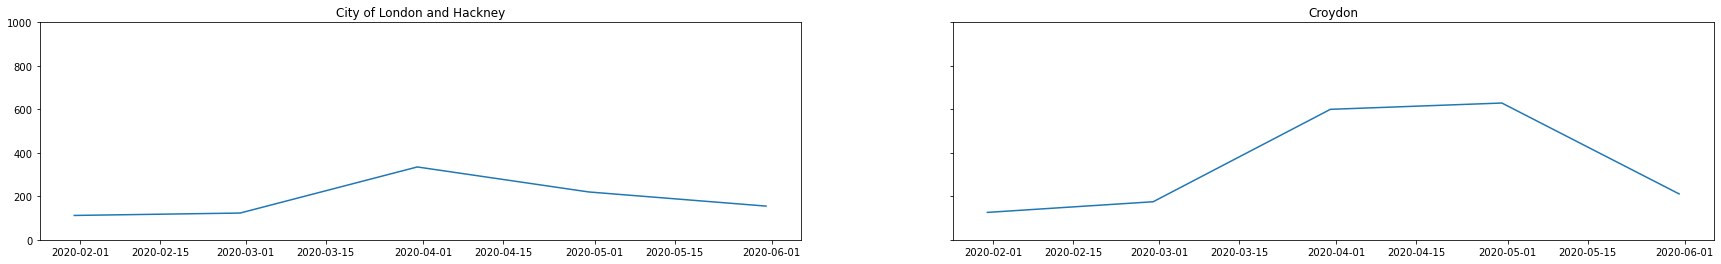

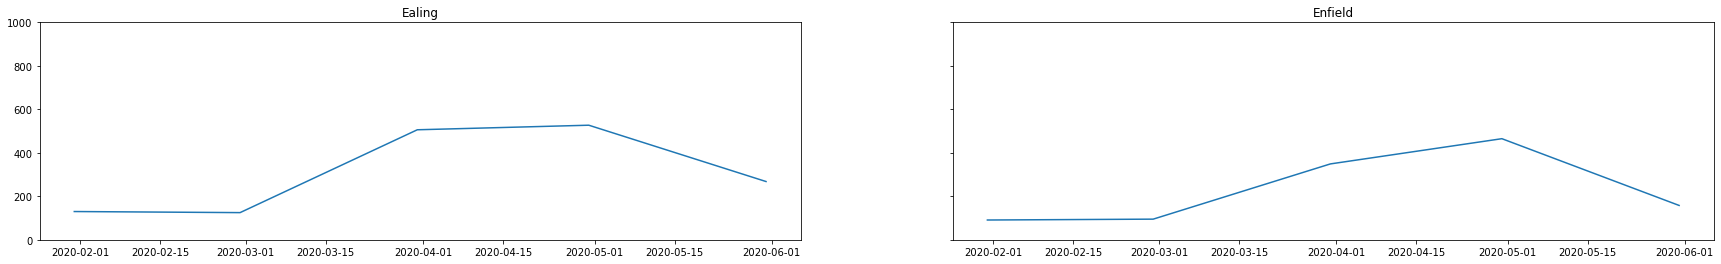

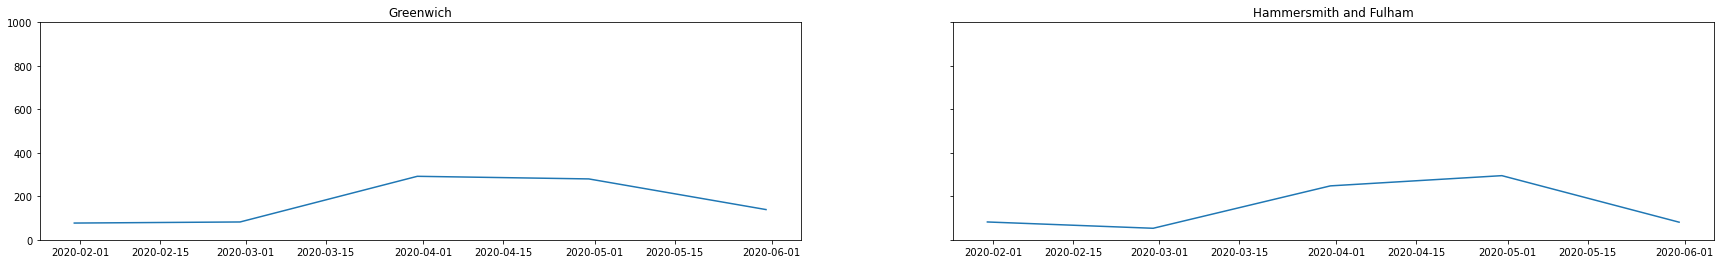

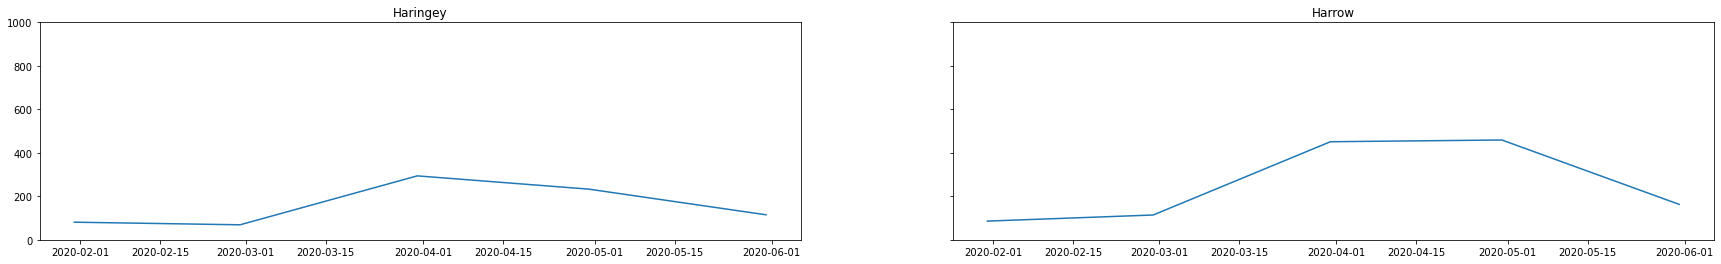

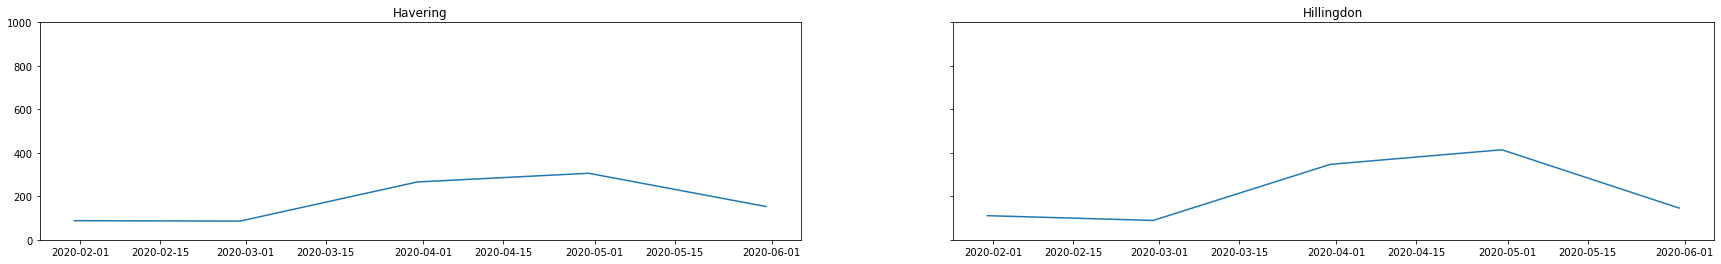

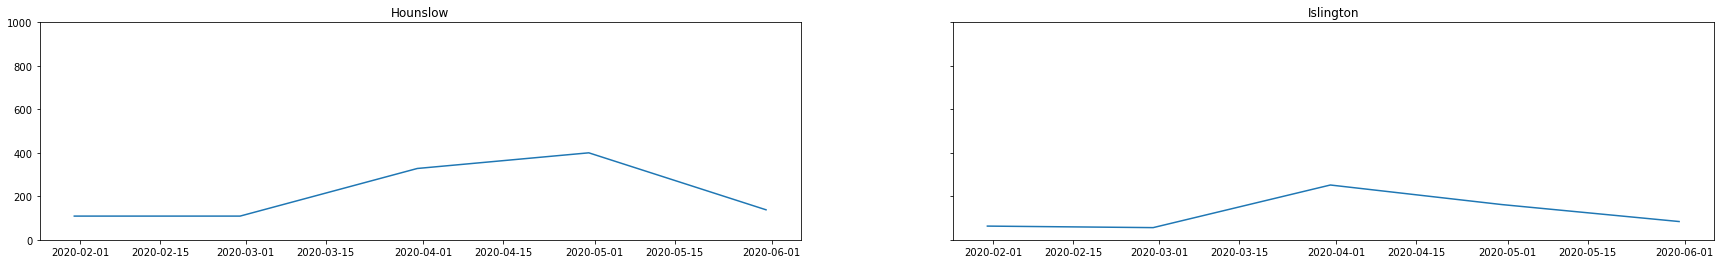

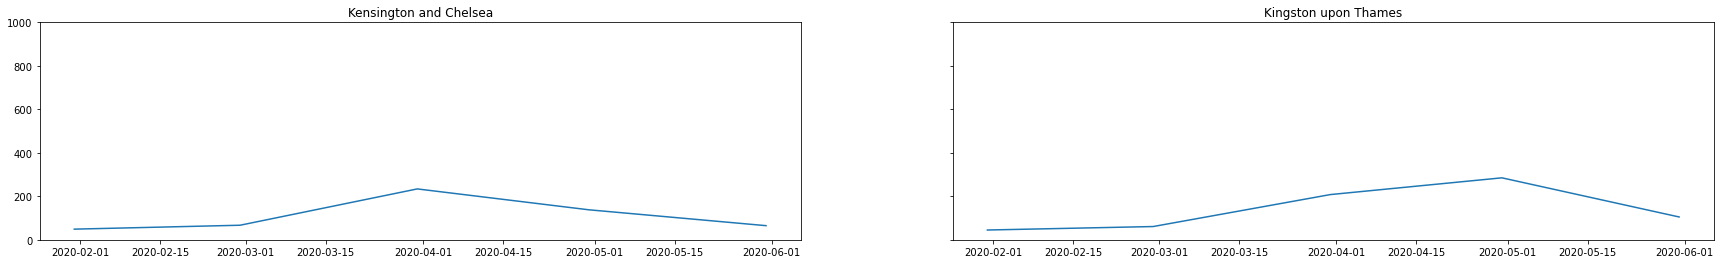

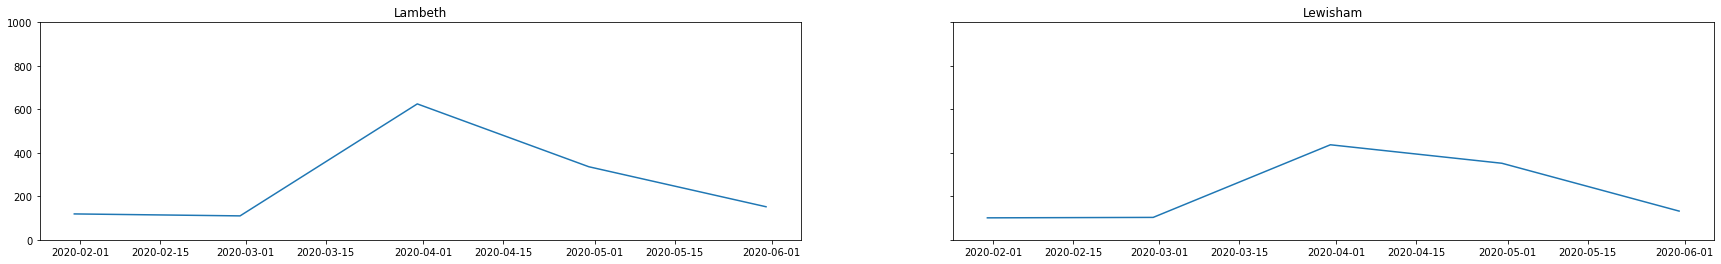

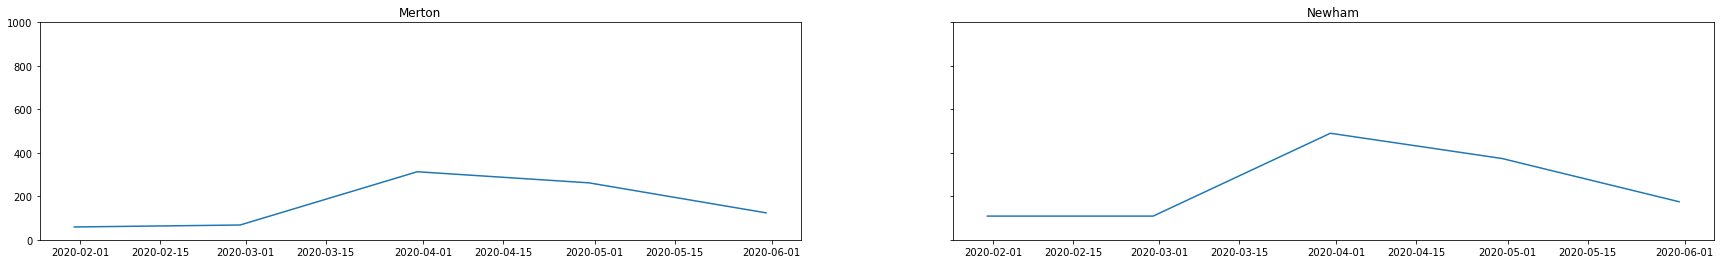

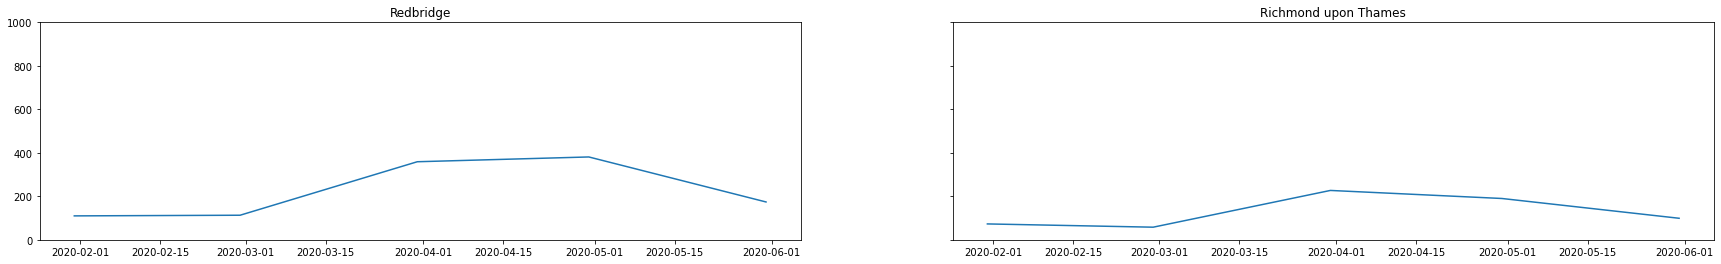

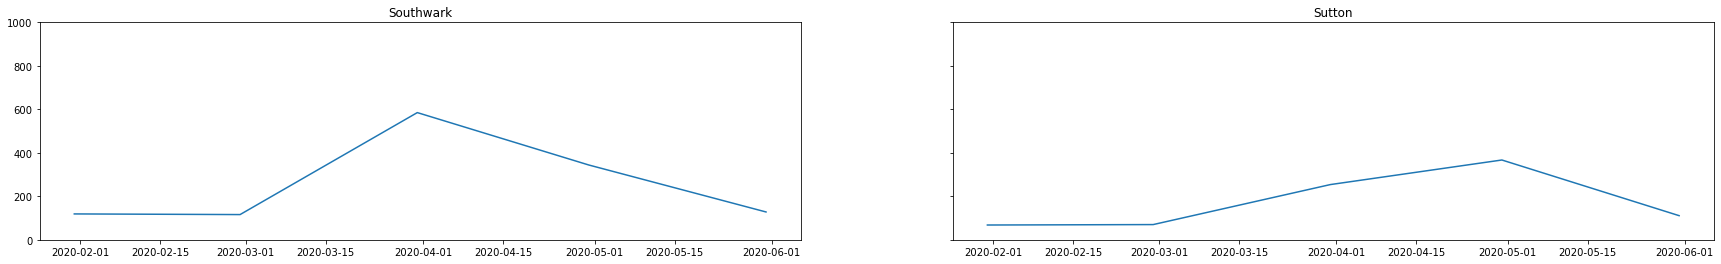

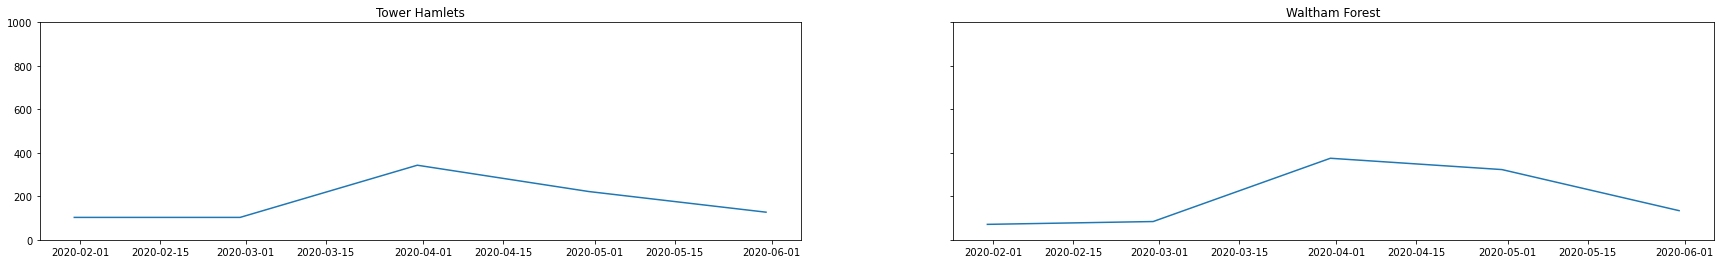

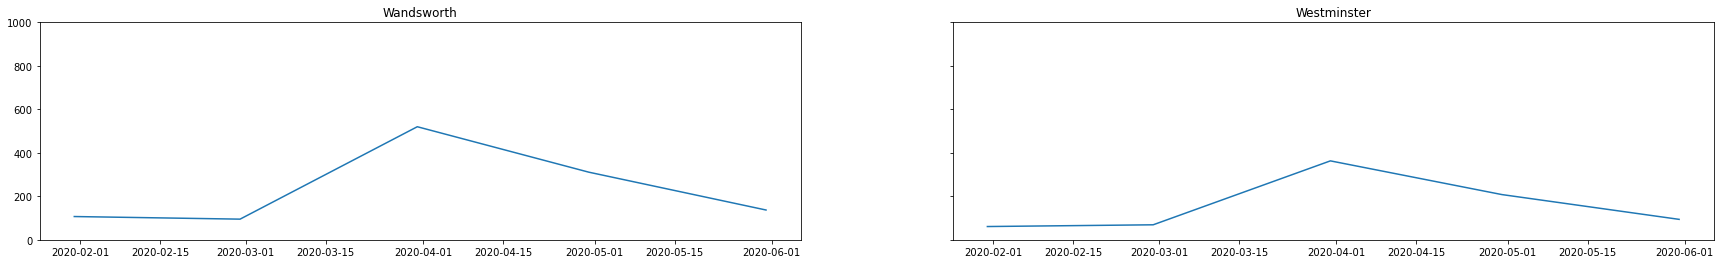

In [44]:
# Now I'm making a grid of subplots, which share a y-axis for each borough.

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

# 
ax1.plot(COVID_BARKING.index,COVID_BARKING['newCasesBySpecimenDate'])
ax1.set_title('Barking and Dagenham')
ax1.set_ylim(0, 1000)
# 
ax2.plot(COVID_BARNET.index,COVID_BARNET['newCasesBySpecimenDate'])
ax2.set_title('Barnet')
ax2.set_ylim(0, 1000)
#

f, (ax3,ax4) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax3.plot(COVID_BEXLEY.index,COVID_BEXLEY['newCasesBySpecimenDate'])
ax3.set_title('Bexley')
ax3.set_ylim(0, 1000)
#
ax4.plot(COVID_BRENT.index,COVID_BRENT['newCasesBySpecimenDate'])
ax4.set_title('Brent')
ax4.set_ylim(0, 1000)
#

f, (ax5,ax6) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax5.plot(COVID_BROMLEY.index,COVID_BROMLEY['newCasesBySpecimenDate'])
ax5.set_title('Bromley')
ax5.set_ylim(0, 1000)
#
ax6.plot(COVID_CAMDEN.index,COVID_CAMDEN['newCasesBySpecimenDate'])
ax6.set_title('Camden')
ax6.set_ylim(0, 1000)
#

f, (ax7, ax8) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#
ax7.plot(COVID_CITY_HACKNEY.index,COVID_CITY_HACKNEY['newCasesBySpecimenDate'])
ax7.set_title('City of London and Hackney')
ax7.set_ylim(0, 1000)
#
ax8.plot(COVID_CROYDON.index,COVID_CROYDON['newCasesBySpecimenDate'])
ax8.set_title('Croydon')
ax8.set_ylim(0, 1000)
#

f, (ax9,ax10) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax9.plot(COVID_EALING.index,COVID_EALING['newCasesBySpecimenDate'])
ax9.set_title('Ealing')
ax9.set_ylim(0, 1000)
#
ax10.plot(COVID_ENFIELD.index,COVID_ENFIELD['newCasesBySpecimenDate'])
ax10.set_title('Enfield')
ax10.set_ylim(0, 1000)
#

f, (ax11,ax12) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax11.plot(COVID_GREENWICH.index,COVID_GREENWICH['newCasesBySpecimenDate'])
ax11.set_title('Greenwich')
ax11.set_ylim(0, 1000)
#
ax12.plot(COVID_HAMMERSMITH_FULHAM.index,COVID_HAMMERSMITH_FULHAM['newCasesBySpecimenDate'])
ax12.set_title('Hammersmith and Fulham')
ax12.set_ylim(0, 1000)
#

f, (ax13,ax14) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

ax13.plot(COVID_HARINGEY.index,COVID_HARINGEY['newCasesBySpecimenDate'])
ax13.set_title('Haringey')
ax13.set_ylim(0, 1000)
#
ax14.plot(COVID_HARROW.index,COVID_HARROW['newCasesBySpecimenDate'])
ax14.set_title('Harrow')
ax14.set_ylim(0, 1000)
#

f, (ax15,ax16) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax15.plot(COVID_HAVERING.index,COVID_HAVERING['newCasesBySpecimenDate'])
ax15.set_title('Havering')
ax15.set_ylim(0, 1000)
#
ax16.plot(COVID_HILLINGDON.index,COVID_HILLINGDON['newCasesBySpecimenDate'])
ax16.set_title('Hillingdon')
ax16.set_ylim(0, 1000)
#

f, (ax17,ax18) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax17.plot(COVID_HOUNSLOW.index,COVID_HOUNSLOW['newCasesBySpecimenDate'])
ax17.set_title('Hounslow')
ax17.set_ylim(0, 1000)
#
ax18.plot(COVID_ISLINGTON.index,COVID_ISLINGTON['newCasesBySpecimenDate'])
ax18.set_title('Islington')
ax18.set_ylim(0, 1000)
#

f, (ax19, ax20) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#
ax19.plot(COVID_KENSINGTON_CHELSEA.index,COVID_KENSINGTON_CHELSEA['newCasesBySpecimenDate'])
ax19.set_title('Kensington and Chelsea')
ax19.set_ylim(0, 1000)
#
ax20.plot(COVID_KINGSTON.index,COVID_KINGSTON['newCasesBySpecimenDate'])
ax20.set_title('Kingston upon Thames')
ax20.set_ylim(0, 1000)
#

f, (ax21,ax22) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax21.plot(COVID_LAMBETH.index,COVID_LAMBETH['newCasesBySpecimenDate'])
ax21.set_title('Lambeth')
ax21.set_ylim(0, 1000)
#
ax22.plot(COVID_LEWISHAM.index,COVID_LEWISHAM['newCasesBySpecimenDate'])
ax22.set_title('Lewisham')
ax22.set_ylim(0, 1000)
#

f, (ax23,ax24) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax23.plot(COVID_MERTON.index,COVID_MERTON['newCasesBySpecimenDate'])
ax23.set_title('Merton')
ax23.set_ylim(0, 1000)
#
ax24.plot(COVID_NEWHAM.index,COVID_NEWHAM['newCasesBySpecimenDate'])
ax24.set_title('Newham')
ax24.set_ylim(0, 1000)
#

f, (ax25,ax26) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#
ax25.plot(COVID_REDBRIDGE.index,COVID_REDBRIDGE['newCasesBySpecimenDate'])
ax25.set_title('Redbridge')
ax25.set_ylim(0, 1000)
#
ax26.plot(COVID_RICHMOND.index,COVID_RICHMOND['newCasesBySpecimenDate'])
ax26.set_title('Richmond upon Thames')
ax26.set_ylim(0, 1000)
#

f, (ax27,ax28) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax27.plot(COVID_SOUTHWARK.index,COVID_SOUTHWARK['newCasesBySpecimenDate'])
ax27.set_title('Southwark')
ax27.set_ylim(0, 1000)
#
ax28.plot(COVID_SUTTON.index,COVID_SUTTON['newCasesBySpecimenDate'])
ax28.set_title('Sutton')
ax28.set_ylim(0, 1000)
#

f, (ax29,ax30) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#

#
ax29.plot(COVID_TOWER_HAMLETS.index,COVID_TOWER_HAMLETS['newCasesBySpecimenDate'])
ax29.set_title('Tower Hamlets')
ax29.set_ylim(0, 1000)

#
ax30.plot(COVID_WALTHAM.index,COVID_WALTHAM['newCasesBySpecimenDate'])
ax30.set_title('Waltham Forest')
ax30.set_ylim(0, 1000)
#

f, (ax31,ax32) = plt.subplots(1, 2, sharey=True, figsize=(30, 4))

#
ax31.plot(COVID_WANDSWORTH.index,COVID_WANDSWORTH['newCasesBySpecimenDate'])
ax31.set_title('Wandsworth')
ax31.set_ylim(0, 1000)
#
ax32.plot(COVID_WESTMINSTER.index,COVID_WESTMINSTER['newCasesBySpecimenDate'])
ax32.set_title('Westminster')
ax32.set_ylim(0, 1000)

Now that the data has been all correctly prepared I am able to plot the data all on the same graph and further aid comparison.

Text(0.5, 1.0, 'COVID-19 Cases')

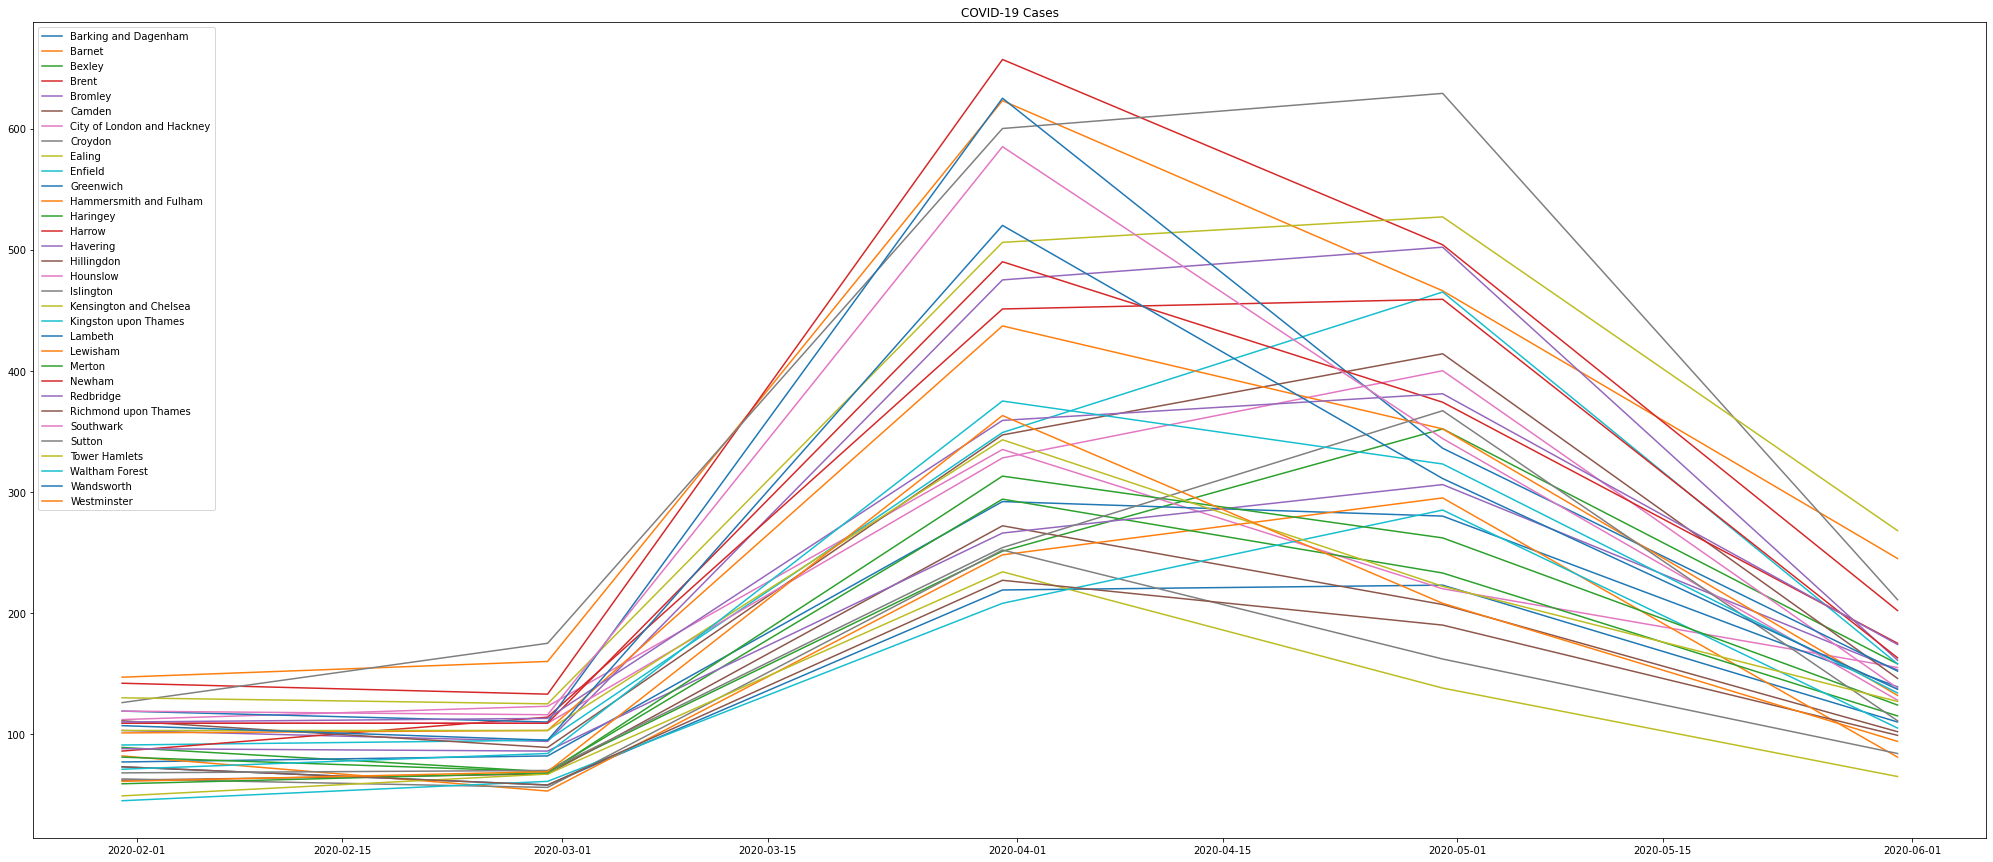

In [45]:
# Combining covid data for all boroughs.

# Now I'm making a grid of subplots, which share a y-axis for each borough.

#f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(35, 15))

fig = plt.figure(figsize=(35,15))
ax = fig.add_subplot(111)

# 
plt.plot(COVID_BARKING.index,COVID_BARKING['newCasesBySpecimenDate'], label="Barking and Dagenham")
#ax1.set_title('Barking and Dagenham')


# 
plt.plot(COVID_BARNET.index,COVID_BARNET['newCasesBySpecimenDate'], label="Barnet")
#ax1.set_title('Barnet')

#
plt.plot(COVID_BEXLEY.index,COVID_BEXLEY['newCasesBySpecimenDate'], label="Bexley")
#ax3.set_title('Bexley')

#
plt.plot(COVID_BRENT.index,COVID_BRENT['newCasesBySpecimenDate'], label="Brent")
#ax4.set_title('Brent')

#
plt.plot(COVID_BROMLEY.index,COVID_BROMLEY['newCasesBySpecimenDate'], label="Bromley")
#ax5.set_title('Bromley')

#
plt.plot(COVID_CAMDEN.index,COVID_CAMDEN['newCasesBySpecimenDate'], label="Camden")
#ax6.set_title('Camden')
#


plt.plot(COVID_CITY_HACKNEY.index,COVID_CITY_HACKNEY['newCasesBySpecimenDate'], label="City of London and Hackney")
#ax7.set_title('City of London and Hackney')

#
plt.plot(COVID_CROYDON.index,COVID_CROYDON['newCasesBySpecimenDate'], label="Croydon")
#ax8.set_title('Croydon')

#
plt.plot(COVID_EALING.index,COVID_EALING['newCasesBySpecimenDate'], label="Ealing")
#ax9.set_title('Ealing')

#
plt.plot(COVID_ENFIELD.index,COVID_ENFIELD['newCasesBySpecimenDate'], label="Enfield")
#ax10.set_title('Enfield')

#
plt.plot(COVID_GREENWICH.index,COVID_GREENWICH['newCasesBySpecimenDate'], label="Greenwich")
#ax11.set_title('Greenwich')

#
plt.plot(COVID_HAMMERSMITH_FULHAM.index,COVID_HAMMERSMITH_FULHAM['newCasesBySpecimenDate'], label="Hammersmith and Fulham")
#ax12.set_title('Hammersmith and Fulham')
#

plt.plot(COVID_HARINGEY.index,COVID_HARINGEY['newCasesBySpecimenDate'], label="Haringey")
#ax13.set_title('Haringey')

#
plt.plot(COVID_HARROW.index,COVID_HARROW['newCasesBySpecimenDate'], label="Harrow")
#ax14.set_title('Harrow')

#
plt.plot(COVID_HAVERING.index,COVID_HAVERING['newCasesBySpecimenDate'], label="Havering")
#ax15.set_title('Havering')

#
plt.plot(COVID_HILLINGDON.index,COVID_HILLINGDON['newCasesBySpecimenDate'], label="Hillingdon")
#ax16.set_title('Hillingdon')

#
plt.plot(COVID_HOUNSLOW.index,COVID_HOUNSLOW['newCasesBySpecimenDate'], label="Hounslow")
#ax17.set_title('Hounslow')

#
plt.plot(COVID_ISLINGTON.index,COVID_ISLINGTON['newCasesBySpecimenDate'], label="Islington")
#ax18.set_title('Islington')
#

plt.plot(COVID_KENSINGTON_CHELSEA.index,COVID_KENSINGTON_CHELSEA['newCasesBySpecimenDate'], label="Kensington and Chelsea")
#ax19.set_title('Kensington and Chelsea')

#
plt.plot(COVID_KINGSTON.index,COVID_KINGSTON['newCasesBySpecimenDate'], label="Kingston upon Thames")
#ax20.set_title('Kingston upon Thames')

#
plt.plot(COVID_LAMBETH.index,COVID_LAMBETH['newCasesBySpecimenDate'], label="Lambeth")
#ax21.set_title('Lambeth')

#
plt.plot(COVID_LEWISHAM.index,COVID_LEWISHAM['newCasesBySpecimenDate'], label="Lewisham")
#ax22.set_title('Lewisham')

#
plt.plot(COVID_MERTON.index,COVID_MERTON['newCasesBySpecimenDate'], label="Merton")
#ax23.set_title('Merton')

#
plt.plot(COVID_NEWHAM.index,COVID_NEWHAM['newCasesBySpecimenDate'], label="Newham")
#ax24.set_title('Newham')
#

plt.plot(COVID_REDBRIDGE.index,COVID_REDBRIDGE['newCasesBySpecimenDate'], label="Redbridge")
#ax25.set_title('Redbridge')

#
plt.plot(COVID_RICHMOND.index,COVID_RICHMOND['newCasesBySpecimenDate'], label="Richmond upon Thames")
#ax26.set_title('Richmond upon Thames')

#
plt.plot(COVID_SOUTHWARK.index,COVID_SOUTHWARK['newCasesBySpecimenDate'], label="Southwark")
#ax27.set_title('Southwark')

#
plt.plot(COVID_SUTTON.index,COVID_SUTTON['newCasesBySpecimenDate'], label="Sutton")
#ax28.set_title('Sutton')

#
plt.plot(COVID_TOWER_HAMLETS.index,COVID_TOWER_HAMLETS['newCasesBySpecimenDate'], label="Tower Hamlets")
#ax29.set_title('Tower Hamlets')

#
plt.plot(COVID_WALTHAM.index,COVID_WALTHAM['newCasesBySpecimenDate'], label="Waltham Forest")
#ax30.set_title('Waltham Forest')
#

plt.plot(COVID_WANDSWORTH.index,COVID_WANDSWORTH['newCasesBySpecimenDate'], label="Wandsworth")
#ax31.set_title('Wandsworth')

#
plt.plot(COVID_WESTMINSTER.index,COVID_WESTMINSTER['newCasesBySpecimenDate'], label="Westminster")
#ax32.set_title('Westminster')

plt.legend(loc="upper left")
plt.title('COVID-19 Cases')


#### **Data Derivation**

Overview side by side comparison of both COVID-19 and Property Data within same timeframe.

Text(0, 0.5, 'Average Price')

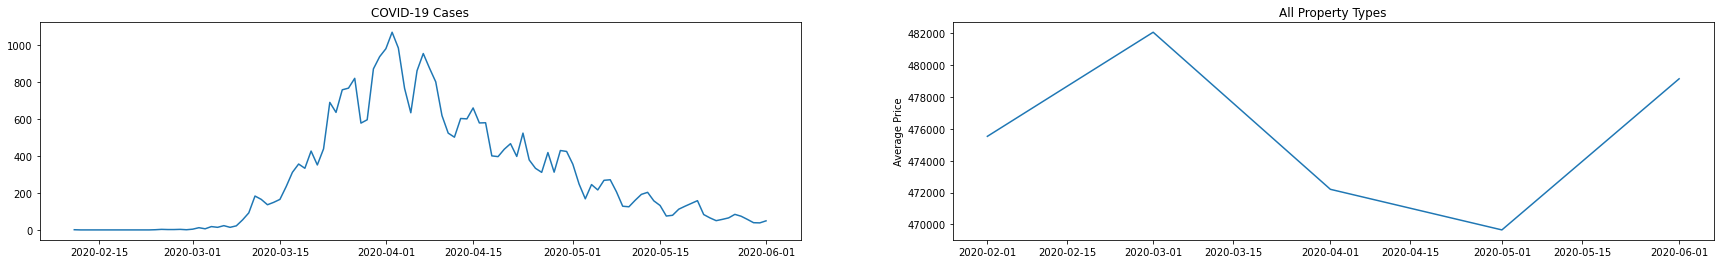

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(30, 4))

ax1.plot(total_london_covid['date'],total_london_covid['newCasesBySpecimenDate'])
ax1.set_title('COVID-19 Cases')

ax2.plot(prop_price_df['Period'],prop_price_df['Average price All property types'])
ax2.set_title('All Property Types')
ax2.set_ylabel('Average Price')

The visualisations above clearly show that as COVID-19 cases begin to rise from 2020-03-01, Property prices began to fall steeply until 2020-05-01 when cases per day began to drop below 200, at which point property prices quickly began to rise. 

However, was this the case for all boroughs of London? 

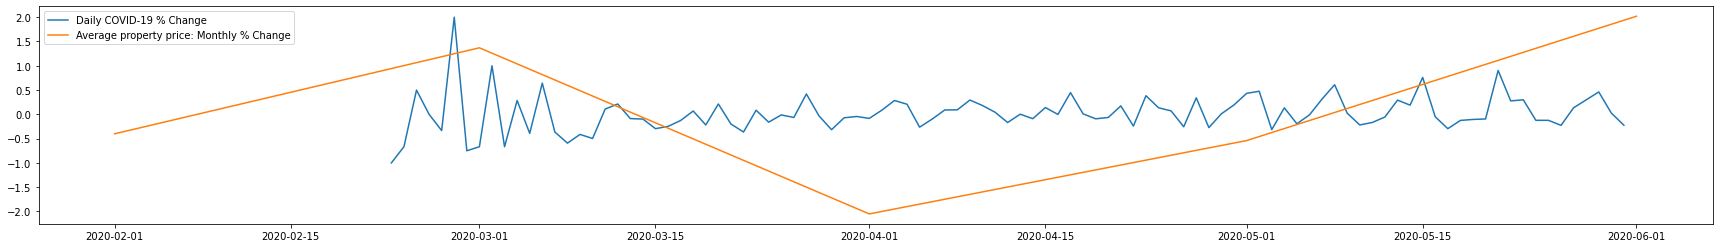

In [47]:
total_london_covid['% Change'] = total_london_covid['newCasesBySpecimenDate'].pct_change()

total_london_covid

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(30, 4))

ax1.plot(total_london_covid.date,total_london_covid['% Change'], label="Daily COVID-19 % Change")

ax1.plot(prop_price_df.Period,prop_price_df['Percentage change (monthly) All property types'], label="Average property price: Monthly % Change")

ax1.legend(loc="upper left")

Lets look at percentage changes for both COVID-19 cases and Property price changes for each borough to determine which areas may have been most/least affected.

The below code loads and plots the datasets for all boroughs prepared above.

I have also included the percentage change for both COVID-19 data and Property data.

Once the data for each is plotted we should be able to see how property price for each borough has reacted to change in COVID-19.

<ipython-input-48-9a28dcf7e49d>:655: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))


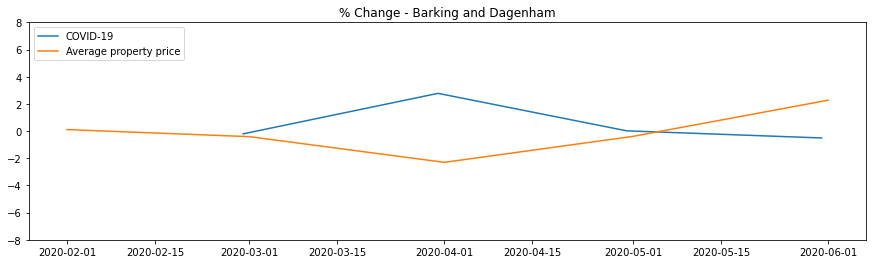

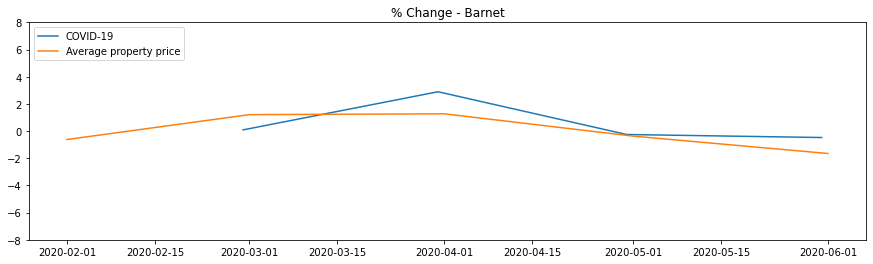

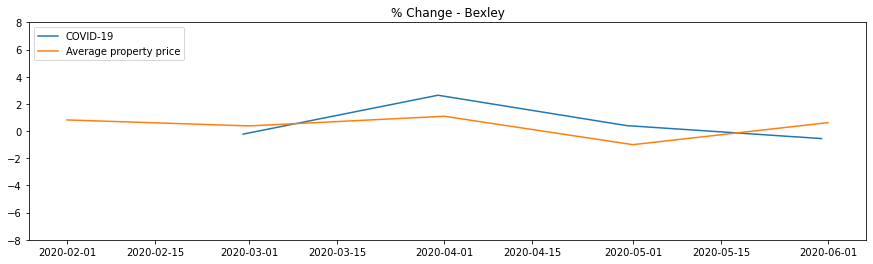

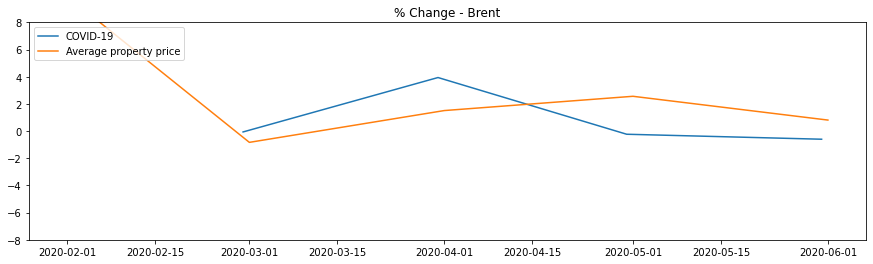

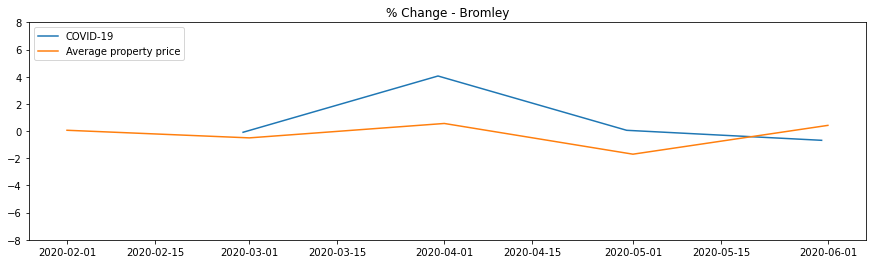

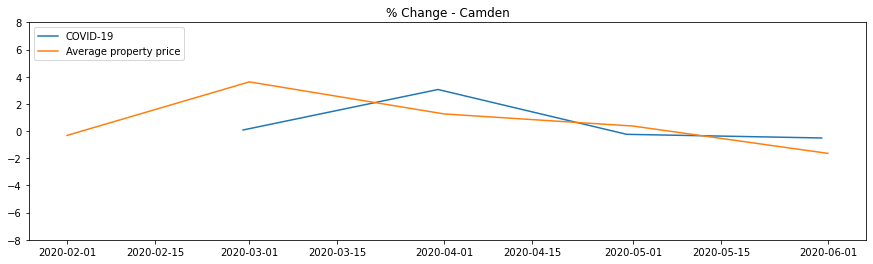

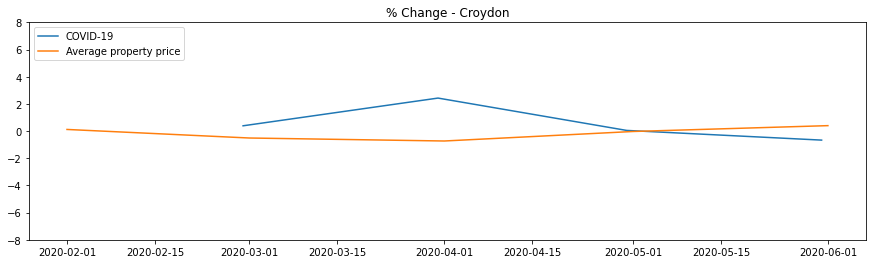

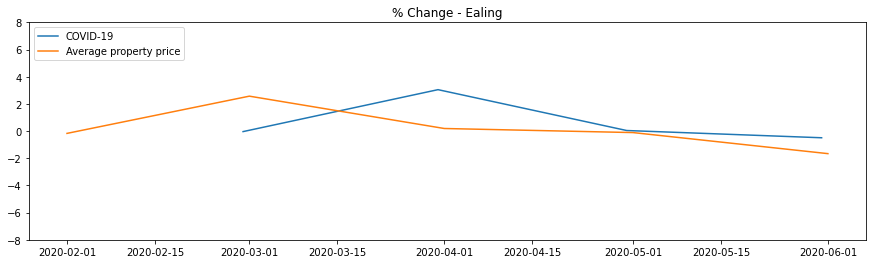

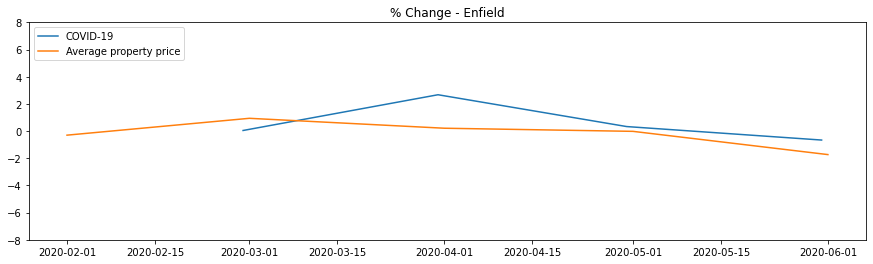

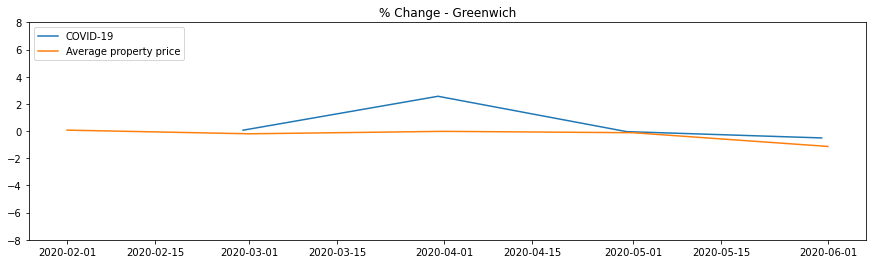

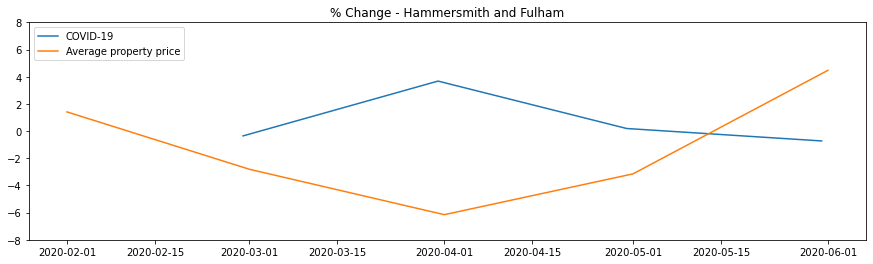

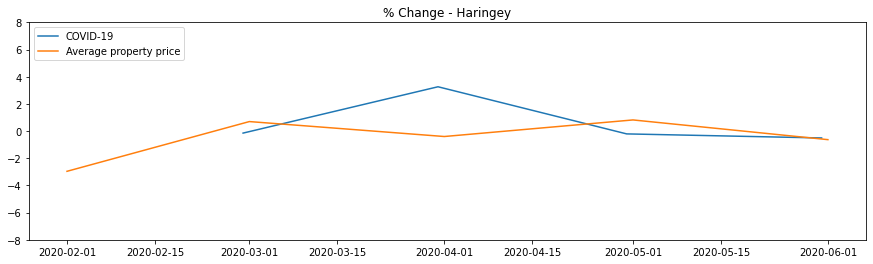

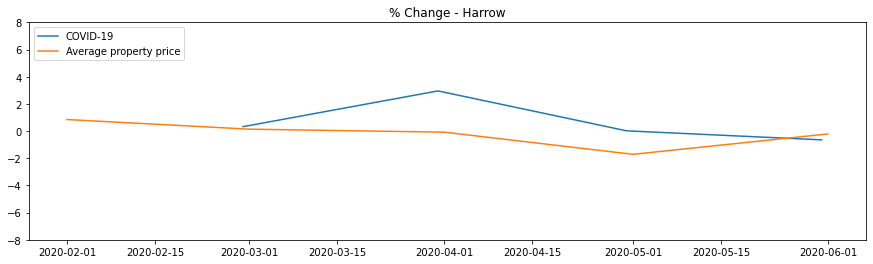

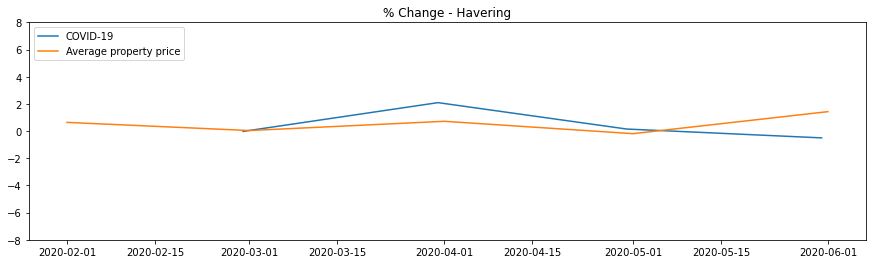

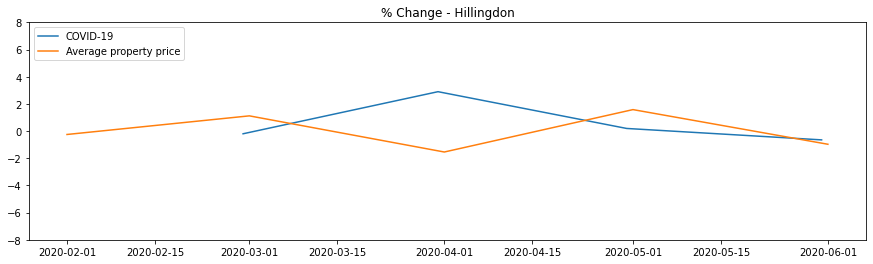

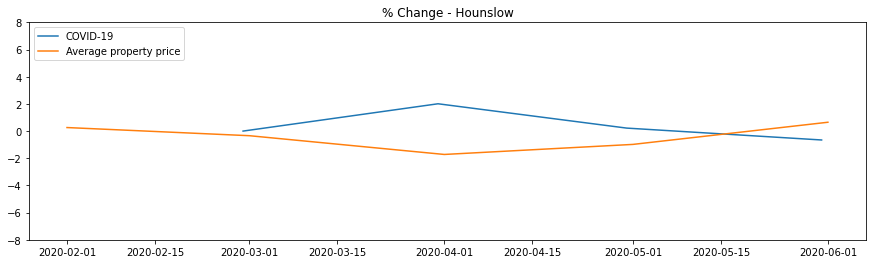

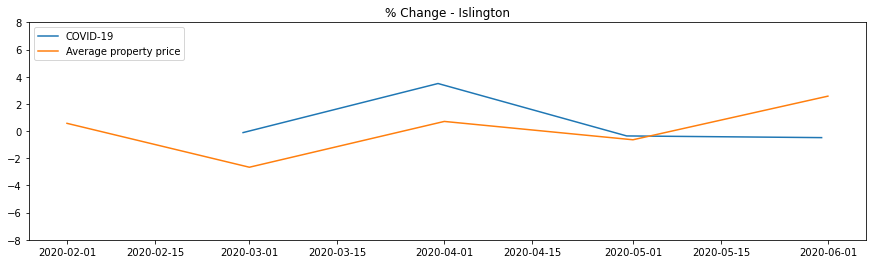

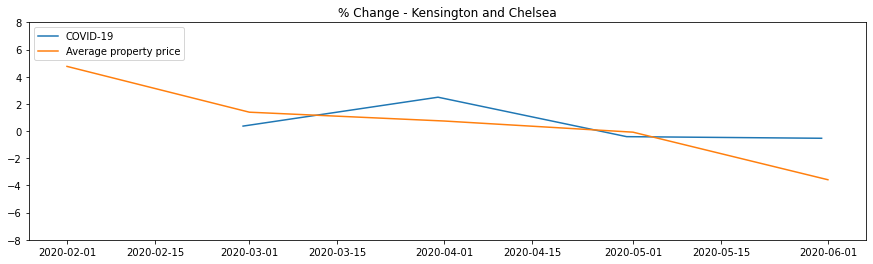

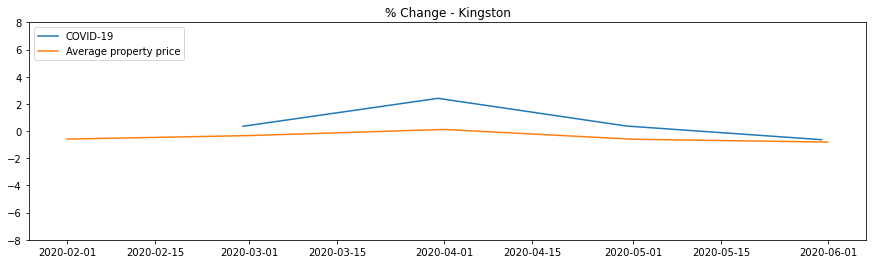

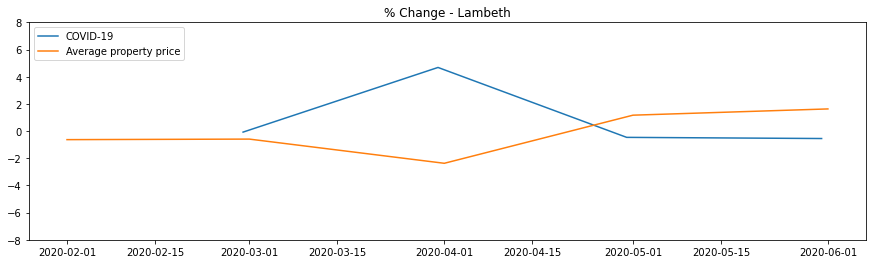

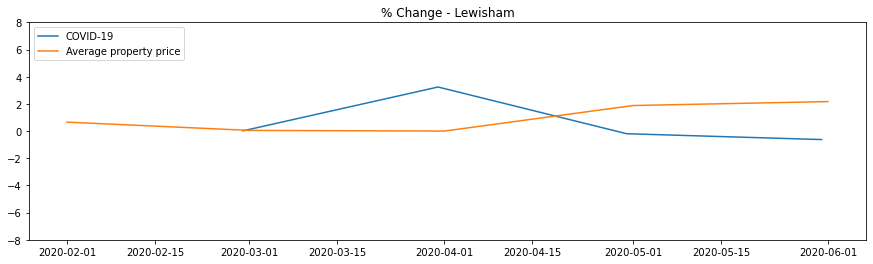

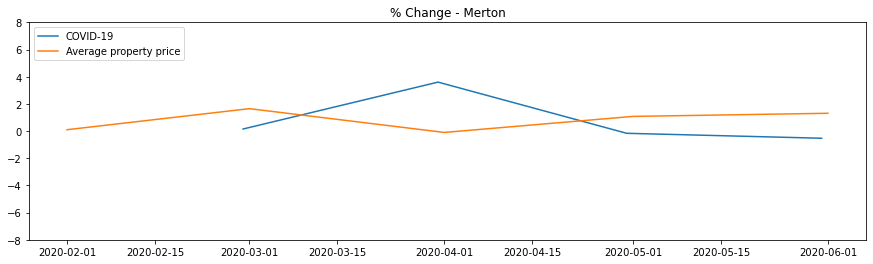

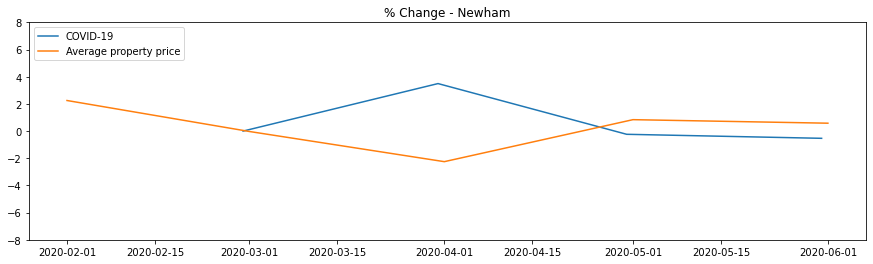

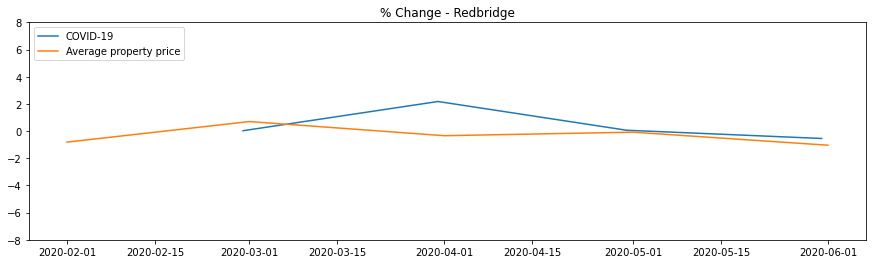

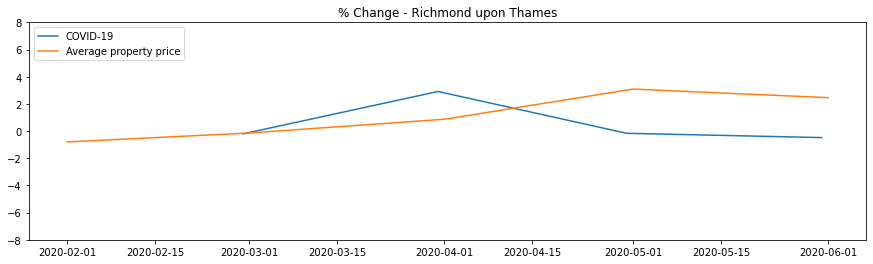

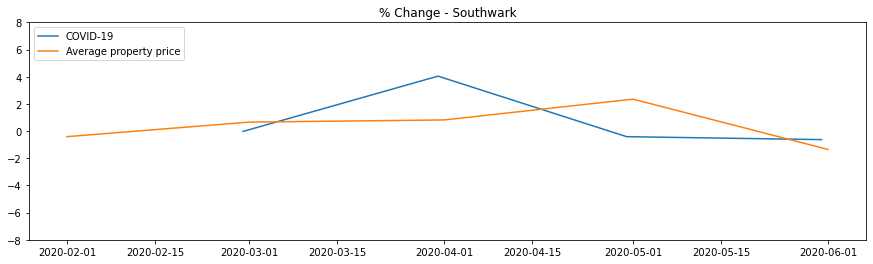

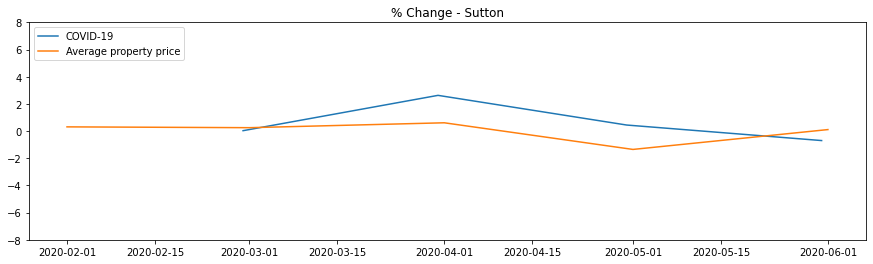

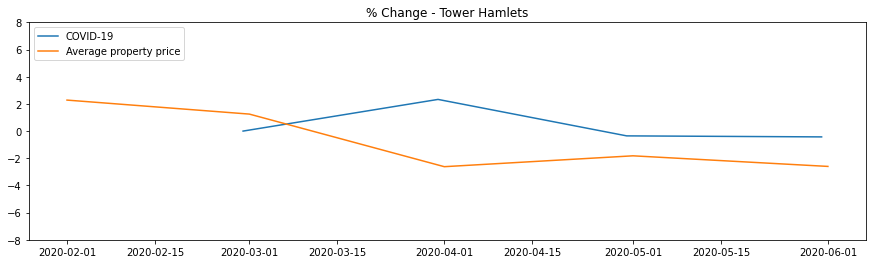

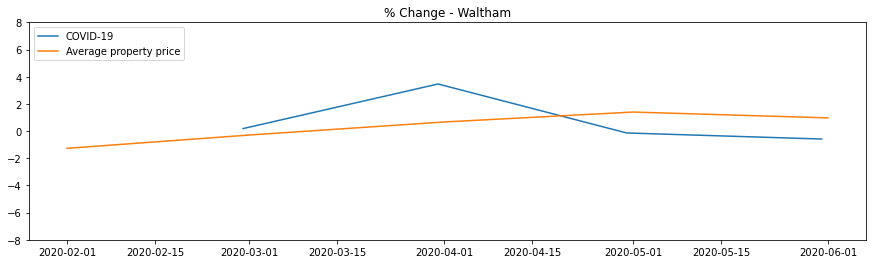

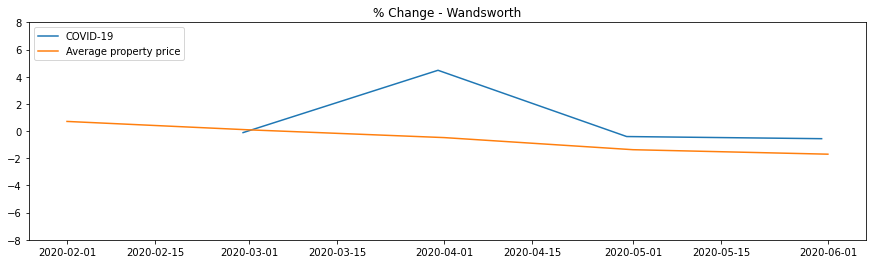

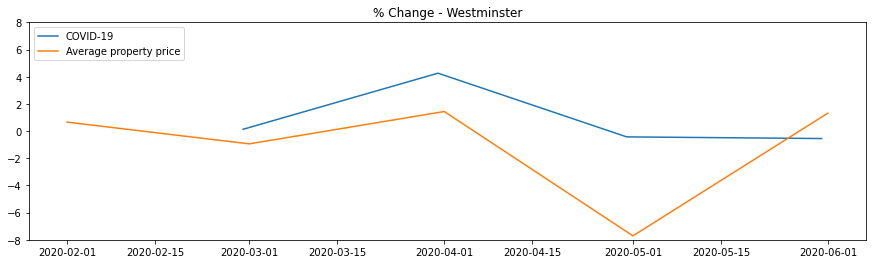

In [48]:
# First create a percentage change column for each borough in the COVID-19 datasets.
##
#COVID
COVID_BARKING = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Barking and Dagenham.csv')

COVID_BARKING.set_index('date', inplace=True)
COVID_BARKING.index = pd.to_datetime(COVID_BARKING.index)
COVID_BARKING = COVID_BARKING.resample('1M').sum()
COVID_BARKING = COVID_BARKING.drop(COVID_BARKING.tail(7).index)


COVID_BARKING['% Change'] = COVID_BARKING['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_BARKING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-barking-and-dagenham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BARKING.set_index('Period', inplace=True)
UKHPI_BARKING.index = pd.to_datetime(UKHPI_BARKING.index)
#UKHPI_BARKING = UKHPI_BARKING.resample('1M').sum()
# Need to remove the last 2 rows as they are null values and remove the first 121 rows so that the data is between 2020-02 and 2020-06
UKHPI_BARKING = UKHPI_BARKING.drop(UKHPI_BARKING.tail(2).index)
UKHPI_BARKING = UKHPI_BARKING.drop(UKHPI_BARKING.head(121).index)

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_BARKING.index,COVID_BARKING['% Change'], label="COVID-19")
ax1.set_title('% Change - Barking and Dagenham')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_BARKING.index,UKHPI_BARKING['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Barking and Dagenham')
ax1.legend(loc="upper left")

##
#COVID
COVID_BARNET = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Barnet.csv')

COVID_BARNET.set_index('date', inplace=True)
COVID_BARNET.index = pd.to_datetime(COVID_BARNET.index)
COVID_BARNET = COVID_BARNET.resample('1M').sum()
COVID_BARNET = COVID_BARNET.drop(COVID_BARNET.tail(7).index)
#
COVID_BARNET['% Change'] = COVID_BARNET['newCasesBySpecimenDate'].pct_change()


#PROPERTY
UKHPI_BARNET = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-Barnet-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BARNET.set_index('Period', inplace=True)
UKHPI_BARNET.index = pd.to_datetime(UKHPI_BARNET.index)
#UKHPI_BARNET = UKHPI_BARNET.resample('1M').sum()
UKHPI_BARNET = UKHPI_BARNET.drop(UKHPI_BARNET.tail(2).index)
UKHPI_BARNET = UKHPI_BARNET.drop(UKHPI_BARNET.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1,1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_BARNET.index,COVID_BARNET['% Change'], label="COVID-19")
ax1.set_title('% Change - Barnet')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_BARNET.index,UKHPI_BARNET['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Barnet')
ax1.legend(loc="upper left")


##
#COVID
COVID_BEXLEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Bexley.csv')

COVID_BEXLEY.set_index('date', inplace=True)
COVID_BEXLEY.index = pd.to_datetime(COVID_BEXLEY.index)
COVID_BEXLEY = COVID_BEXLEY.resample('1M').sum()
COVID_BEXLEY = COVID_BEXLEY.drop(COVID_BEXLEY.tail(7).index)
#
COVID_BEXLEY['% Change'] = COVID_BEXLEY['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_BEXLEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-bexley-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BEXLEY.set_index('Period', inplace=True)
UKHPI_BEXLEY.index = pd.to_datetime(UKHPI_BEXLEY.index)
#UKHPI_BEXLEY = UKHPI_BEXLEY.resample('1M').sum()
UKHPI_BEXLEY = UKHPI_BEXLEY.drop(UKHPI_BEXLEY.tail(2).index)
UKHPI_BEXLEY = UKHPI_BEXLEY.drop(UKHPI_BEXLEY.head(121).index)

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_BEXLEY.index,COVID_BEXLEY['% Change'], label="COVID-19")
ax1.set_title('% Change - Bexley')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_BEXLEY.index,UKHPI_BEXLEY['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Bexley')
ax1.legend(loc="upper left")

##
#COVID
COVID_BRENT = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Brent.csv')

COVID_BRENT.set_index('date', inplace=True)
COVID_BRENT.index = pd.to_datetime(COVID_BRENT.index)
COVID_BRENT = COVID_BRENT.resample('1M').sum()
COVID_BRENT = COVID_BRENT.drop(COVID_BRENT.tail(7).index)
#
COVID_BRENT['% Change'] = COVID_BRENT['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_BRENT = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-brent-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BRENT.set_index('Period', inplace=True)
UKHPI_BRENT.index = pd.to_datetime(UKHPI_BRENT.index)
#UKHPI_BRENT = UKHPI_BRENT.resample('1M').sum()
UKHPI_BRENT = UKHPI_BRENT.drop(UKHPI_BRENT.tail(2).index)
UKHPI_BRENT = UKHPI_BRENT.drop(UKHPI_BRENT.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_BRENT.index,COVID_BRENT['% Change'], label="COVID-19")
ax1.set_title('% Change - Brent')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_BRENT.index,UKHPI_BRENT['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Brent')
ax1.legend(loc="upper left")



##
#COVID
COVID_BROMLEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Bromley.csv')

COVID_BROMLEY.set_index('date', inplace=True)
COVID_BROMLEY.index = pd.to_datetime(COVID_BROMLEY.index)
COVID_BROMLEY = COVID_BROMLEY.resample('1M').sum()
COVID_BROMLEY = COVID_BROMLEY.drop(COVID_BROMLEY.tail(7).index)
#
COVID_BROMLEY['% Change'] = COVID_BROMLEY['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_BROMLEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-bromley-from-2010-01-01-to-2020-08-01.csv')

UKHPI_BROMLEY.set_index('Period', inplace=True)
UKHPI_BROMLEY.index = pd.to_datetime(UKHPI_BROMLEY.index)
#UKHPI_BROMLEY = UKHPI_BROMLEY.resample('1M').sum()
UKHPI_BROMLEY = UKHPI_BROMLEY.drop(UKHPI_BROMLEY.tail(2).index)
UKHPI_BROMLEY = UKHPI_BROMLEY.drop(UKHPI_BROMLEY.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_BROMLEY.index,COVID_BROMLEY['% Change'], label="COVID-19")
ax1.set_title('% Change - Bromley')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_BROMLEY.index,UKHPI_BROMLEY['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Bromley')
ax1.legend(loc="upper left")


#COVID
COVID_CAMDEN = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Camden.csv')

COVID_CAMDEN.set_index('date', inplace=True)
COVID_CAMDEN.index = pd.to_datetime(COVID_CAMDEN.index)
COVID_CAMDEN = COVID_CAMDEN.resample('1M').sum()
COVID_CAMDEN = COVID_CAMDEN.drop(COVID_CAMDEN.tail(7).index)
#
COVID_CAMDEN['% Change'] = COVID_CAMDEN['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_CAMDEN = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-camden-from-2010-01-01-to-2020-08-01.csv')

UKHPI_CAMDEN.set_index('Period', inplace=True)
UKHPI_CAMDEN.index = pd.to_datetime(UKHPI_CAMDEN.index)
#UKHPI_CAMDEN = UKHPI_CAMDEN.resample('1M').sum()
UKHPI_CAMDEN = UKHPI_CAMDEN.drop(UKHPI_CAMDEN.tail(2).index)
UKHPI_CAMDEN = UKHPI_CAMDEN.drop(UKHPI_CAMDEN.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_CAMDEN.index,COVID_CAMDEN['% Change'], label="COVID-19")
ax1.set_title('% Change - Camden')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_CAMDEN.index,UKHPI_CAMDEN['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Camden')
ax1.legend(loc="upper left")


# City and Hackney removed due to error loading data set.
#COVID
#COVID_CITY_HACKNEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID City of london and Hackney.csv')

#COVID_CITY_HACKNEY.set_index('date', inplace=True)
#COVID_CITY_HACKNEY.index = pd.to_datetime(COVID_CITY_HACKNEY.index)
#COVID_CITY_HACKNEY = COVID_CITY_HACKNEY.resample('1M').sum()
#COVID_CITY_HACKNEY = COVID_CITY_HACKNEY.drop(COVID_CITY_HACKNEY.tail(7).index)
#
#COVID_CITY_HACKNEY['% Change'] = COVID_CITY_HACKNEY['newCasesBySpecimenDate'].pct_change()


#COVID
COVID_CROYDON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Croydon.csv')

COVID_CROYDON.set_index('date', inplace=True)
COVID_CROYDON.index = pd.to_datetime(COVID_CROYDON.index)
COVID_CROYDON = COVID_CROYDON.resample('1M').sum()
COVID_CROYDON = COVID_CROYDON.drop(COVID_CROYDON.tail(7).index)
#
COVID_CROYDON['% Change'] = COVID_CROYDON['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_CROYDON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-croydon-from-2010-01-01-to-2020-08-01.csv')

UKHPI_CROYDON.set_index('Period', inplace=True)
UKHPI_CROYDON.index = pd.to_datetime(UKHPI_CROYDON.index)
#UKHPI_CROYDON = UKHPI_CROYDON.resample('1M').sum()
UKHPI_CROYDON = UKHPI_CROYDON.drop(UKHPI_CROYDON.tail(2).index)
UKHPI_CROYDON = UKHPI_CROYDON.drop(UKHPI_CROYDON.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_CROYDON.index,COVID_CROYDON['% Change'], label="COVID-19")
ax1.set_title('% Change - Croydon')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_CROYDON.index,UKHPI_CROYDON['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Croydon')
ax1.legend(loc="upper left")


#COVID
COVID_EALING = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Ealing.csv')

COVID_EALING.set_index('date', inplace=True)
COVID_EALING.index = pd.to_datetime(COVID_EALING.index)
COVID_EALING = COVID_EALING.resample('1M').sum()
COVID_EALING = COVID_EALING.drop(COVID_EALING.tail(7).index)
#
COVID_EALING['% Change'] = COVID_EALING['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_EALING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-Ealing-from-2010-01-01-to-2020-08-01.csv')

UKHPI_EALING.set_index('Period', inplace=True)
UKHPI_EALING.index = pd.to_datetime(UKHPI_EALING.index)
#UKHPI_EALING = UKHPI_EALING.resample('1M').sum()
UKHPI_EALING = UKHPI_EALING.drop(UKHPI_EALING.tail(2).index)
UKHPI_EALING = UKHPI_EALING.drop(UKHPI_EALING.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_EALING.index,COVID_EALING['% Change'], label="COVID-19")
ax1.set_title('% Change - Ealing')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_EALING.index,UKHPI_EALING['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Ealing')
ax1.legend(loc="upper left")


#COVID
COVID_ENFIELD = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Enfield.csv')

COVID_ENFIELD.set_index('date', inplace=True)
COVID_ENFIELD.index = pd.to_datetime(COVID_ENFIELD.index)
COVID_ENFIELD = COVID_ENFIELD.resample('1M').sum()
COVID_ENFIELD = COVID_ENFIELD.drop(COVID_ENFIELD.tail(7).index)
#
COVID_ENFIELD['% Change'] = COVID_ENFIELD['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_ENFIELD = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-Enfield-from-2010-01-01-to-2020-08-01.csv')

UKHPI_ENFIELD.set_index('Period', inplace=True)
UKHPI_ENFIELD.index = pd.to_datetime(UKHPI_ENFIELD.index)
#UKHPI_ENFIELD = UKHPI_ENFIELD.resample('1M').sum()
UKHPI_ENFIELD = UKHPI_ENFIELD.drop(UKHPI_ENFIELD.tail(2).index)
UKHPI_ENFIELD = UKHPI_ENFIELD.drop(UKHPI_ENFIELD.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_ENFIELD.index,COVID_ENFIELD['% Change'], label="COVID-19")
ax1.set_title('% Change - Enfield')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_ENFIELD.index,UKHPI_ENFIELD['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Enfield')
ax1.legend(loc="upper left")


#COVID
COVID_GREENWICH = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Greenwich.csv')

COVID_GREENWICH.set_index('date', inplace=True)
COVID_GREENWICH.index = pd.to_datetime(COVID_GREENWICH.index)
COVID_GREENWICH = COVID_GREENWICH.resample('1M').sum()
COVID_GREENWICH = COVID_GREENWICH.drop(COVID_GREENWICH.tail(7).index)
#
COVID_GREENWICH['% Change'] = COVID_GREENWICH['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_GREENWICH = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-greenwich-from-2010-01-01-to-2020-08-01.csv')

UKHPI_GREENWICH.set_index('Period', inplace=True)
UKHPI_GREENWICH.index = pd.to_datetime(UKHPI_GREENWICH.index)
#UKHPI_GREENWICH = UKHPI_GREENWICH.resample('1M').sum()
UKHPI_GREENWICH = UKHPI_GREENWICH.drop(UKHPI_GREENWICH.tail(2).index)
UKHPI_GREENWICH = UKHPI_GREENWICH.drop(UKHPI_GREENWICH.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_GREENWICH.index,COVID_GREENWICH['% Change'], label="COVID-19")
ax1.set_title('% Change - Greenwich')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_GREENWICH.index,UKHPI_GREENWICH['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Greenwich')
ax1.legend(loc="upper left")


#COVID
COVID_HAMMERSMITH_FULHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Hammersmith and Fulham.csv')

COVID_HAMMERSMITH_FULHAM.set_index('date', inplace=True)
COVID_HAMMERSMITH_FULHAM.index = pd.to_datetime(COVID_HAMMERSMITH_FULHAM.index)
COVID_HAMMERSMITH_FULHAM = COVID_HAMMERSMITH_FULHAM.resample('1M').sum()
COVID_HAMMERSMITH_FULHAM = COVID_HAMMERSMITH_FULHAM.drop(COVID_HAMMERSMITH_FULHAM.tail(7).index)
#
COVID_HAMMERSMITH_FULHAM['% Change'] = COVID_HAMMERSMITH_FULHAM['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_HAMMERSMITH_FULHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hammersmith-and-fulham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HAMMERSMITH_FULHAM.set_index('Period', inplace=True)
UKHPI_HAMMERSMITH_FULHAM.index = pd.to_datetime(UKHPI_HAMMERSMITH_FULHAM.index)
#UKHPI_HAMMERSMITH_FULHAM = UKHPI_HAMMERSMITH_FULHAM.resample('1M').sum()
UKHPI_HAMMERSMITH_FULHAM = UKHPI_HAMMERSMITH_FULHAM.drop(UKHPI_HAMMERSMITH_FULHAM.tail(2).index)
UKHPI_HAMMERSMITH_FULHAM = UKHPI_HAMMERSMITH_FULHAM.drop(UKHPI_HAMMERSMITH_FULHAM.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_HAMMERSMITH_FULHAM.index,COVID_HAMMERSMITH_FULHAM['% Change'], label="COVID-19")
ax1.set_title('% Change - Hammersmith and Fulham')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_HAMMERSMITH_FULHAM.index,UKHPI_HAMMERSMITH_FULHAM['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Hammersmith and Fulham')
ax1.legend(loc="upper left")


#COVID
COVID_HARINGEY = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Haringey.csv')

COVID_HARINGEY.set_index('date', inplace=True)
COVID_HARINGEY.index = pd.to_datetime(COVID_HARINGEY.index)
COVID_HARINGEY = COVID_HARINGEY.resample('1M').sum()
COVID_HARINGEY = COVID_HARINGEY.drop(COVID_HARINGEY.tail(7).index)
#
COVID_HARINGEY['% Change'] = COVID_HARINGEY['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_HARINGEY = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-haringey-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HARINGEY.set_index('Period', inplace=True)
UKHPI_HARINGEY.index = pd.to_datetime(UKHPI_HARINGEY.index)
#UKHPI_HARINGEY = UKHPI_HARINGEY.resample('1M').sum()
UKHPI_HARINGEY = UKHPI_HARINGEY.drop(UKHPI_HARINGEY.tail(2).index)
UKHPI_HARINGEY = UKHPI_HARINGEY.drop(UKHPI_HARINGEY.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_HARINGEY.index,COVID_HARINGEY['% Change'], label="COVID-19")
ax1.set_title('% Change - Haringey')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_HARINGEY.index,UKHPI_HARINGEY['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Haringey')
ax1.legend(loc="upper left")


#COVID
COVID_HARROW = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Harrow.csv')

COVID_HARROW.set_index('date', inplace=True)
COVID_HARROW.index = pd.to_datetime(COVID_HARROW.index)
COVID_HARROW = COVID_HARROW.resample('1M').sum()
COVID_HARROW = COVID_HARROW.drop(COVID_HARROW.tail(7).index)
#
COVID_HARROW['% Change'] = COVID_HARROW['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_HARROW = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-harrow-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HARROW.set_index('Period', inplace=True)
UKHPI_HARROW.index = pd.to_datetime(UKHPI_HARROW.index)
#UKHPI_HARROW = UKHPI_HARROW.resample('1M').sum()
UKHPI_HARROW = UKHPI_HARROW.drop(UKHPI_HARROW.tail(2).index)
UKHPI_HARROW = UKHPI_HARROW.drop(UKHPI_HARROW.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_HARROW.index,COVID_HARROW['% Change'], label="COVID-19")
ax1.set_title('% Change - Harrow')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_HARROW.index,UKHPI_HARROW['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Harrow')
ax1.legend(loc="upper left")


#COVID
COVID_HAVERING = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Havering.csv')

COVID_HAVERING.set_index('date', inplace=True)
COVID_HAVERING.index = pd.to_datetime(COVID_HAVERING.index)
COVID_HAVERING = COVID_HAVERING.resample('1M').sum()
COVID_HAVERING = COVID_HAVERING.drop(COVID_HAVERING.tail(7).index)
#
COVID_HAVERING['% Change'] = COVID_HAVERING['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_HAVERING = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-havering-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HAVERING.set_index('Period', inplace=True)
UKHPI_HAVERING.index = pd.to_datetime(UKHPI_HAVERING.index)
#UKHPI_HAVERING = UKHPI_HAVERING.resample('1M').sum()
UKHPI_HAVERING = UKHPI_HAVERING.drop(UKHPI_HAVERING.tail(2).index)
UKHPI_HAVERING = UKHPI_HAVERING.drop(UKHPI_HAVERING.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_HAVERING.index,COVID_HAVERING['% Change'], label="COVID-19")
ax1.set_title('% Change - Havering')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_HAVERING.index,UKHPI_HAVERING['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Havering')
ax1.legend(loc="upper left")

#COVID
COVID_HILLINGDON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Hillingdon.csv')

COVID_HILLINGDON.set_index('date', inplace=True)
COVID_HILLINGDON.index = pd.to_datetime(COVID_HILLINGDON.index)
COVID_HILLINGDON = COVID_HILLINGDON.resample('1M').sum()
COVID_HILLINGDON = COVID_HILLINGDON.drop(COVID_HILLINGDON.tail(7).index)
#
COVID_HILLINGDON['% Change'] = COVID_HILLINGDON['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_HILLINGDON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hillingdon-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HILLINGDON.set_index('Period', inplace=True)
UKHPI_HILLINGDON.index = pd.to_datetime(UKHPI_HILLINGDON.index)
#UKHPI_HILLINGDON = UKHPI_HILLINGDON.resample('1M').sum()
UKHPI_HILLINGDON = UKHPI_HILLINGDON.drop(UKHPI_HILLINGDON.tail(2).index)
UKHPI_HILLINGDON = UKHPI_HILLINGDON.drop(UKHPI_HILLINGDON.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_HILLINGDON.index,COVID_HILLINGDON['% Change'], label="COVID-19")
ax1.set_title('% Change - Hillingdon')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_HILLINGDON.index,UKHPI_HILLINGDON['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Hillingdon')
ax1.legend(loc="upper left")


#COVID
COVID_HOUNSLOW = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Hounslow.csv')

COVID_HOUNSLOW.set_index('date', inplace=True)
COVID_HOUNSLOW.index = pd.to_datetime(COVID_HOUNSLOW.index)
COVID_HOUNSLOW = COVID_HOUNSLOW.resample('1M').sum()
COVID_HOUNSLOW = COVID_HOUNSLOW.drop(COVID_HOUNSLOW.tail(7).index)
#
COVID_HOUNSLOW['% Change'] = COVID_HOUNSLOW['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_HOUNSLOW = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-hounslow-from-2010-01-01-to-2020-08-01.csv')

UKHPI_HOUNSLOW.set_index('Period', inplace=True)
UKHPI_HOUNSLOW.index = pd.to_datetime(UKHPI_HOUNSLOW.index)
#UKHPI_HOUNSLOW = UKHPI_HOUNSLOW.resample('1M').sum()
UKHPI_HOUNSLOW = UKHPI_HOUNSLOW.drop(UKHPI_HOUNSLOW.tail(2).index)
UKHPI_HOUNSLOW = UKHPI_HOUNSLOW.drop(UKHPI_HOUNSLOW.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_HOUNSLOW.index,COVID_HOUNSLOW['% Change'], label="COVID-19")
ax1.set_title('% Change - Hounslow')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_HOUNSLOW.index,UKHPI_HOUNSLOW['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Hounslow')
ax1.legend(loc="upper left")

#COVID
COVID_ISLINGTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Islington.csv')

COVID_ISLINGTON.set_index('date', inplace=True)
COVID_ISLINGTON.index = pd.to_datetime(COVID_ISLINGTON.index)
COVID_ISLINGTON = COVID_ISLINGTON.resample('1M').sum()
COVID_ISLINGTON = COVID_ISLINGTON.drop(COVID_ISLINGTON.tail(7).index)
#
COVID_ISLINGTON['% Change'] = COVID_ISLINGTON['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_ISLINGTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-islington-from-2010-01-01-to-2020-08-01.csv')

UKHPI_ISLINGTON.set_index('Period', inplace=True)
UKHPI_ISLINGTON.index = pd.to_datetime(UKHPI_ISLINGTON.index)
#UKHPI_ISLINGTON = UKHPI_ISLINGTON.resample('1M').sum()
UKHPI_ISLINGTON = UKHPI_ISLINGTON.drop(UKHPI_ISLINGTON.tail(2).index)
UKHPI_ISLINGTON = UKHPI_ISLINGTON.drop(UKHPI_ISLINGTON.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_ISLINGTON.index,COVID_ISLINGTON['% Change'], label="COVID-19")
ax1.set_title('% Change - Islington')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_ISLINGTON.index,UKHPI_ISLINGTON['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Islington')
ax1.legend(loc="upper left")

#COVID
COVID_KENSINGTON_CHELSEA = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Kensington and Chelsea.csv')

COVID_KENSINGTON_CHELSEA.set_index('date', inplace=True)
COVID_KENSINGTON_CHELSEA.index = pd.to_datetime(COVID_KENSINGTON_CHELSEA.index)
COVID_KENSINGTON_CHELSEA = COVID_KENSINGTON_CHELSEA.resample('1M').sum()
COVID_KENSINGTON_CHELSEA = COVID_KENSINGTON_CHELSEA.drop(COVID_KENSINGTON_CHELSEA.tail(7).index)
#
COVID_KENSINGTON_CHELSEA['% Change'] = COVID_KENSINGTON_CHELSEA['newCasesBySpecimenDate'].pct_change()


#PROPERTY
UKHPI_KENSINGTON_CHELSEA = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-kensington-and-chelsea-from-2010-01-01-to-2020-08-01.csv')

UKHPI_KENSINGTON_CHELSEA.set_index('Period', inplace=True)
UKHPI_KENSINGTON_CHELSEA.index = pd.to_datetime(UKHPI_KENSINGTON_CHELSEA.index)
#UKHPI_KENSINGTON_CHELSEA = UKHPI_KENSINGTON_CHELSEA.resample('1M').sum()
UKHPI_KENSINGTON_CHELSEA = UKHPI_KENSINGTON_CHELSEA.drop(UKHPI_KENSINGTON_CHELSEA.tail(2).index)
UKHPI_KENSINGTON_CHELSEA = UKHPI_KENSINGTON_CHELSEA.drop(UKHPI_KENSINGTON_CHELSEA.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_KENSINGTON_CHELSEA.index,COVID_KENSINGTON_CHELSEA['% Change'], label="COVID-19")
ax1.set_title('% Change - Kensington and Chelsea')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_KENSINGTON_CHELSEA.index,UKHPI_KENSINGTON_CHELSEA['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Kensington and Chelsea')
ax1.legend(loc="upper left")

#COVID
COVID_KINGSTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Kingston upon Thames.csv')

COVID_KINGSTON.set_index('date', inplace=True)
COVID_KINGSTON.index = pd.to_datetime(COVID_KINGSTON.index)
COVID_KINGSTON = COVID_KINGSTON.resample('1M').sum()
COVID_KINGSTON = COVID_KINGSTON.drop(COVID_KINGSTON.tail(7).index)
#
COVID_KINGSTON['% Change'] = COVID_KINGSTON['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_KINGSTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-kingston-upon-thames-from-2010-01-01-to-2020-08-01.csv')

UKHPI_KINGSTON.set_index('Period', inplace=True)
UKHPI_KINGSTON.index = pd.to_datetime(UKHPI_KINGSTON.index)
#UKHPI_KINGSTON = UKHPI_KINGSTON.resample('1M').sum()
UKHPI_KINGSTON = UKHPI_KINGSTON.drop(UKHPI_KINGSTON.tail(2).index)
UKHPI_KINGSTON = UKHPI_KINGSTON.drop(UKHPI_KINGSTON.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_KINGSTON.index,COVID_KINGSTON['% Change'], label="COVID-19")
ax1.set_title('% Change - Kingston')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_KINGSTON.index,UKHPI_KINGSTON['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Kingston')
ax1.legend(loc="upper left")

#COVID
COVID_LAMBETH = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Lambeth.csv')

COVID_LAMBETH.set_index('date', inplace=True)
COVID_LAMBETH.index = pd.to_datetime(COVID_LAMBETH.index)
COVID_LAMBETH = COVID_LAMBETH.resample('1M').sum()
COVID_LAMBETH = COVID_LAMBETH.drop(COVID_LAMBETH.tail(7).index)
#
COVID_LAMBETH['% Change'] = COVID_LAMBETH['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_LAMBETH = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-lambeth-from-2010-01-01-to-2020-08-01.csv')

UKHPI_LAMBETH.set_index('Period', inplace=True)
UKHPI_LAMBETH.index = pd.to_datetime(UKHPI_LAMBETH.index)
#UKHPI_LAMBETH = UKHPI_LAMBETH.resample('1M').sum()
UKHPI_LAMBETH = UKHPI_LAMBETH.drop(UKHPI_LAMBETH.tail(2).index)
UKHPI_LAMBETH = UKHPI_LAMBETH.drop(UKHPI_LAMBETH.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_LAMBETH.index,COVID_LAMBETH['% Change'], label="COVID-19")
ax1.set_title('% Change - Lambeth')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_LAMBETH.index,UKHPI_LAMBETH['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Lambeth')
ax1.legend(loc="upper left")

#COVID
COVID_LEWISHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Lewisham.csv')

COVID_LEWISHAM.set_index('date', inplace=True)
COVID_LEWISHAM.index = pd.to_datetime(COVID_LEWISHAM.index)
COVID_LEWISHAM = COVID_LEWISHAM.resample('1M').sum()
COVID_LEWISHAM = COVID_LEWISHAM.drop(COVID_LEWISHAM.tail(7).index)
#
COVID_LEWISHAM['% Change'] = COVID_LEWISHAM['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_LEWISHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-lewisham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_LEWISHAM.set_index('Period', inplace=True)
UKHPI_LEWISHAM.index = pd.to_datetime(UKHPI_LEWISHAM.index)
#UKHPI_LEWISHAM = UKHPI_LEWISHAM.resample('1M').sum()
UKHPI_LEWISHAM = UKHPI_LEWISHAM.drop(UKHPI_LEWISHAM.tail(2).index)
UKHPI_LEWISHAM = UKHPI_LEWISHAM.drop(UKHPI_LEWISHAM.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_LEWISHAM.index,COVID_LEWISHAM['% Change'], label="COVID-19")
ax1.set_title('% Change - Lewisham')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_LEWISHAM.index,UKHPI_LEWISHAM['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Lewisham')
ax1.legend(loc="upper left")

#COVID
COVID_MERTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Merton.csv')

COVID_MERTON.set_index('date', inplace=True)
COVID_MERTON.index = pd.to_datetime(COVID_MERTON.index)
COVID_MERTON = COVID_MERTON.resample('1M').sum()
COVID_MERTON = COVID_MERTON.drop(COVID_MERTON.tail(7).index)
#
COVID_MERTON['% Change'] = COVID_MERTON['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_MERTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-merton-from-2010-01-01-to-2020-08-01.csv')

UKHPI_MERTON.set_index('Period', inplace=True)
UKHPI_MERTON.index = pd.to_datetime(UKHPI_MERTON.index)
#UKHPI_MERTON = UKHPI_MERTON.resample('1M').sum()
UKHPI_MERTON = UKHPI_MERTON.drop(UKHPI_MERTON.tail(2).index)
UKHPI_MERTON = UKHPI_MERTON.drop(UKHPI_MERTON.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_MERTON.index,COVID_MERTON['% Change'], label="COVID-19")
ax1.set_title('% Change - Merton')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_MERTON.index,UKHPI_MERTON['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Merton')
ax1.legend(loc="upper left")

#COVID
COVID_NEWHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Newham.csv')

COVID_NEWHAM.set_index('date', inplace=True)
COVID_NEWHAM.index = pd.to_datetime(COVID_NEWHAM.index)
COVID_NEWHAM = COVID_NEWHAM.resample('1M').sum()
COVID_NEWHAM = COVID_NEWHAM.drop(COVID_NEWHAM.tail(7).index)
#
COVID_NEWHAM['% Change'] = COVID_NEWHAM['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_NEWHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-newham-from-2010-01-01-to-2020-08-01.csv')

UKHPI_NEWHAM.set_index('Period', inplace=True)
UKHPI_NEWHAM.index = pd.to_datetime(UKHPI_NEWHAM.index)
#UKHPI_NEWHAM = UKHPI_NEWHAM.resample('1M').sum()
UKHPI_NEWHAM = UKHPI_NEWHAM.drop(UKHPI_NEWHAM.tail(2).index)
UKHPI_NEWHAM = UKHPI_NEWHAM.drop(UKHPI_NEWHAM.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_NEWHAM.index,COVID_NEWHAM['% Change'], label="COVID-19")
ax1.set_title('% Change - Newham')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_NEWHAM.index,UKHPI_NEWHAM['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Newham')
ax1.legend(loc="upper left")

#COVID
COVID_REDBRIDGE = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Redbridge.csv')

COVID_REDBRIDGE.set_index('date', inplace=True)
COVID_REDBRIDGE.index = pd.to_datetime(COVID_REDBRIDGE.index)
COVID_REDBRIDGE = COVID_REDBRIDGE.resample('1M').sum()
COVID_REDBRIDGE = COVID_REDBRIDGE.drop(COVID_REDBRIDGE.tail(7).index)
#
COVID_REDBRIDGE['% Change'] = COVID_REDBRIDGE['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_REDBRIDGE = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-redbridge-from-2010-01-01-to-2020-08-01.csv')

UKHPI_REDBRIDGE.set_index('Period', inplace=True)
UKHPI_REDBRIDGE.index = pd.to_datetime(UKHPI_REDBRIDGE.index)
#UKHPI_REDBRIDGE = UKHPI_REDBRIDGE.resample('1M').sum()
UKHPI_REDBRIDGE = UKHPI_REDBRIDGE.drop(UKHPI_REDBRIDGE.tail(2).index)
UKHPI_REDBRIDGE = UKHPI_REDBRIDGE.drop(UKHPI_REDBRIDGE.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_REDBRIDGE.index,COVID_REDBRIDGE['% Change'], label="COVID-19")
ax1.set_title('% Change - Redbridge')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_REDBRIDGE.index,UKHPI_REDBRIDGE['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Redbridge')
ax1.legend(loc="upper left")

#COVID
COVID_RICHMOND = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Richmond upon Thames.csv')

COVID_RICHMOND.set_index('date', inplace=True)
COVID_RICHMOND.index = pd.to_datetime(COVID_RICHMOND.index)
COVID_RICHMOND = COVID_RICHMOND.resample('1M').sum()
COVID_RICHMOND = COVID_RICHMOND.drop(COVID_RICHMOND.tail(7).index)
#
COVID_RICHMOND['% Change'] = COVID_RICHMOND['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_RICHMOND = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-richmond-upon-thames-from-2010-01-01-to-2020-08-01.csv')

UKHPI_RICHMOND.set_index('Period', inplace=True)
UKHPI_RICHMOND.index = pd.to_datetime(UKHPI_RICHMOND.index)
#UKHPI_RICHMOND = UKHPI_RICHMOND.resample('1M').sum()
UKHPI_RICHMOND = UKHPI_RICHMOND.drop(UKHPI_RICHMOND.tail(2).index)
UKHPI_RICHMOND = UKHPI_RICHMOND.drop(UKHPI_RICHMOND.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_RICHMOND.index,COVID_RICHMOND['% Change'], label="COVID-19")
ax1.set_title('% Change - Richmond upon Thames')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_RICHMOND.index,UKHPI_RICHMOND['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Richmond upon Thames')
ax1.legend(loc="upper left")

#COVID
COVID_SOUTHWARK = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Southwark.csv')

COVID_SOUTHWARK.set_index('date', inplace=True)
COVID_SOUTHWARK.index = pd.to_datetime(COVID_SOUTHWARK.index)
COVID_SOUTHWARK = COVID_SOUTHWARK.resample('1M').sum()
COVID_SOUTHWARK = COVID_SOUTHWARK.drop(COVID_SOUTHWARK.tail(7).index)
#
COVID_SOUTHWARK['% Change'] = COVID_SOUTHWARK['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_SOUTHWARK = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-southwark-from-2010-01-01-to-2020-08-01.csv')

UKHPI_SOUTHWARK.set_index('Period', inplace=True)
UKHPI_SOUTHWARK.index = pd.to_datetime(UKHPI_SOUTHWARK.index)
#UKHPI_SOUTHWARK = UKHPI_SOUTHWARK.resample('1M').sum()
UKHPI_SOUTHWARK = UKHPI_SOUTHWARK.drop(UKHPI_SOUTHWARK.tail(2).index)
UKHPI_SOUTHWARK = UKHPI_SOUTHWARK.drop(UKHPI_SOUTHWARK.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_SOUTHWARK.index,COVID_SOUTHWARK['% Change'], label="COVID-19")
ax1.set_title('% Change - Southwark')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_SOUTHWARK.index,UKHPI_SOUTHWARK['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Southwark')
ax1.legend(loc="upper left")

#COVID
COVID_SUTTON = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Sutton.csv')

COVID_SUTTON.set_index('date', inplace=True)
COVID_SUTTON.index = pd.to_datetime(COVID_SUTTON.index)
COVID_SUTTON = COVID_SUTTON.resample('1M').sum()
COVID_SUTTON = COVID_SUTTON.drop(COVID_SUTTON.tail(7).index)
#
COVID_SUTTON['% Change'] = COVID_SUTTON['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_SUTTON = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-sutton-from-2010-01-01-to-2020-08-01.csv')

UKHPI_SUTTON.set_index('Period', inplace=True)
UKHPI_SUTTON.index = pd.to_datetime(UKHPI_SUTTON.index)
#UKHPI_SUTTON = UKHPI_SUTTON.resample('1M').sum()
UKHPI_SUTTON = UKHPI_SUTTON.drop(UKHPI_SUTTON.tail(2).index)
UKHPI_SUTTON = UKHPI_SUTTON.drop(UKHPI_SUTTON.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_SUTTON.index,COVID_SUTTON['% Change'], label="COVID-19")
ax1.set_title('% Change - Sutton')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_SUTTON.index,UKHPI_SUTTON['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Sutton')
ax1.legend(loc="upper left")

#COVID
COVID_TOWER_HAMLETS = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Tower Hamlets.csv')

COVID_TOWER_HAMLETS.set_index('date', inplace=True)
COVID_TOWER_HAMLETS.index = pd.to_datetime(COVID_TOWER_HAMLETS.index)
COVID_TOWER_HAMLETS = COVID_TOWER_HAMLETS.resample('1M').sum()
COVID_TOWER_HAMLETS = COVID_TOWER_HAMLETS.drop(COVID_TOWER_HAMLETS.tail(7).index)
#
COVID_TOWER_HAMLETS['% Change'] = COVID_TOWER_HAMLETS['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_TOWER_HAMLETS = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-tower-hamlets-from-2010-01-01-to-2020-08-01.csv')

UKHPI_TOWER_HAMLETS.set_index('Period', inplace=True)
UKHPI_TOWER_HAMLETS.index = pd.to_datetime(UKHPI_TOWER_HAMLETS.index)
#UKHPI_TOWER_HAMLETS = UKHPI_TOWER_HAMLETS.resample('1M').sum()
UKHPI_TOWER_HAMLETS = UKHPI_TOWER_HAMLETS.drop(UKHPI_TOWER_HAMLETS.tail(2).index)
UKHPI_TOWER_HAMLETS = UKHPI_TOWER_HAMLETS.drop(UKHPI_TOWER_HAMLETS.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_TOWER_HAMLETS.index,COVID_TOWER_HAMLETS['% Change'], label="COVID-19")
ax1.set_title('% Change - Tower Hamlets')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_TOWER_HAMLETS.index,UKHPI_TOWER_HAMLETS['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Tower Hamlets')
ax1.legend(loc="upper left")

#COVID
COVID_WALTHAM = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Waltham Forest.csv')

COVID_WALTHAM.set_index('date', inplace=True)
COVID_WALTHAM.index = pd.to_datetime(COVID_WALTHAM.index)
COVID_WALTHAM = COVID_WALTHAM.resample('1M').sum()
COVID_WALTHAM = COVID_WALTHAM.drop(COVID_WALTHAM.tail(7).index)
#
COVID_WALTHAM['% Change'] = COVID_WALTHAM['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_WALTHAM = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-waltham-forest-from-2010-01-01-to-2020-08-01.csv')

UKHPI_WALTHAM.set_index('Period', inplace=True)
UKHPI_WALTHAM.index = pd.to_datetime(UKHPI_WALTHAM.index)
#UKHPI_WALTHAM = UKHPI_WALTHAM.resample('1M').sum()
UKHPI_WALTHAM = UKHPI_WALTHAM.drop(UKHPI_WALTHAM.tail(2).index)
UKHPI_WALTHAM = UKHPI_WALTHAM.drop(UKHPI_WALTHAM.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_WALTHAM.index,COVID_WALTHAM['% Change'], label="COVID-19")
ax1.set_title('% Change - Waltham')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_WALTHAM.index,UKHPI_WALTHAM['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Waltham')
ax1.legend(loc="upper left")

#COVID
COVID_WANDSWORTH = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Wandsworth.csv')

COVID_WANDSWORTH.set_index('date', inplace=True)
COVID_WANDSWORTH.index = pd.to_datetime(COVID_WANDSWORTH.index)
COVID_WANDSWORTH = COVID_WANDSWORTH.resample('1M').sum()
COVID_WANDSWORTH = COVID_WANDSWORTH.drop(COVID_WANDSWORTH.tail(7).index)
#
COVID_WANDSWORTH['% Change'] = COVID_WANDSWORTH['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_WANDSWORTH = pd.read_csv('Data Sets/Property Data for all boroughs/ukhpi-wandsworth-from-2010-01-01-to-2020-08-01.csv')

UKHPI_WANDSWORTH.set_index('Period', inplace=True)
UKHPI_WANDSWORTH.index = pd.to_datetime(UKHPI_WANDSWORTH.index)
#UKHPI_WANDSWORTH = UKHPI_WANDSWORTH.resample('1M').sum()
UKHPI_WANDSWORTH = UKHPI_WANDSWORTH.drop(UKHPI_WANDSWORTH.tail(2).index)
UKHPI_WANDSWORTH = UKHPI_WANDSWORTH.drop(UKHPI_WANDSWORTH.head(121).index)
#

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_WANDSWORTH.index,COVID_WANDSWORTH['% Change'], label="COVID-19")
ax1.set_title('% Change - Wandsworth')
ax1.set_ylim(-8, 8)
ax1.plot(UKHPI_WANDSWORTH.index,UKHPI_WANDSWORTH['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Wandsworth')
ax1.legend(loc="upper left")

#COVID
COVID_WESTMINSTER = pd.read_csv('Data Sets/COVID data for all boroughs/COVID Westminster.csv')

COVID_WESTMINSTER.set_index('date', inplace=True)
COVID_WESTMINSTER.index = pd.to_datetime(COVID_WESTMINSTER.index)
COVID_WESTMINSTER = COVID_WESTMINSTER.resample('1M').sum()
COVID_WESTMINSTER = COVID_WESTMINSTER.drop(COVID_WESTMINSTER.tail(7).index)
#
COVID_WESTMINSTER['% Change'] = COVID_WESTMINSTER['newCasesBySpecimenDate'].pct_change()

#PROPERTY
UKHPI_WESTMINSTER = pd.read_csv('ukhpi-city-of-westminster-from-2010-01-01-to-2020-11-01.csv')

UKHPI_WESTMINSTER.set_index('Period', inplace=True)
UKHPI_WESTMINSTER.index = pd.to_datetime(UKHPI_WESTMINSTER.index)
#UKHPI_WESTMINSTER = UKHPI_WESTMINSTER.resample('1M').sum()
UKHPI_WESTMINSTER = UKHPI_WESTMINSTER.drop(UKHPI_WESTMINSTER.tail(4).index)
UKHPI_WESTMINSTER = UKHPI_WESTMINSTER.drop(UKHPI_WESTMINSTER.head(121).index)

#PLOT
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

ax1.plot(COVID_WESTMINSTER.index,COVID_WESTMINSTER['% Change'], label="COVID-19")
ax1.set_title('% Change - Westminster')
ax1.set_ylim(-8, 8)

ax1.plot(UKHPI_WESTMINSTER.index,UKHPI_WESTMINSTER['Percentage change (monthly) All property types'], label="Average property price")
#ax2.set_title('Property Price % Change - Westminster')
ax1.legend(loc="upper left")


In [153]:
UKHPI_Combined_2020_03 = UKHPI_Combined.loc[(UKHPI_Combined['Period'] == '2020-03-01')]
#UKHPI_Combined_2020_03.set_index('Period', inplace=True)

UKHPI_Combined_2020_05 = UKHPI_Combined.loc[(UKHPI_Combined['Period'] == '2020-05-01')]
#UKHPI_Combined_2020_05.set_index('Period', inplace=True)

UKHPI_Combined_2020_03['2020-05 Average Price'] = UKHPI_Combined_2020_05['Average price All property types'].values
UKHPI_Combined_2020_03['DIFF from 2020-03 and 2020-05'] = UKHPI_Combined_2020_03['2020-05 Average Price'].values - UKHPI_Combined_2020_03['Average price All property types'].values
UKHPI_Combined_2020_03['Pct Change from 2020-03 and 2020-05'] = (UKHPI_Combined_2020_03['DIFF from 2020-03 and 2020-05'].values / UKHPI_Combined_2020_03['Average price All property types'].values)*100

# Dropping values for City of London(incorrect), London(Duplicate value) and City of Westminster(Duplicate Value).
UKHPI_Combined_2020_03 = UKHPI_Combined_2020_03.drop([1018]) # City of Westminster(Duplicate Value)
UKHPI_Combined_2020_03 = UKHPI_Combined_2020_03.drop([890])  # City of London(incorrect)
UKHPI_Combined_2020_03 = UKHPI_Combined_2020_03.drop([3079]) # London(Duplicate value)

UKHPI_Combined_2020_03.set_index('Name', inplace=True)

UKHPI_Combined_2020_03 = UKHPI_Combined_2020_03.sort_values(by=['Pct Change from 2020-03 and 2020-05'], ascending=False)

#UKHPI_Combined_2020_03

print('% Change between 2020-03 and 2020-05: ', '\n' ,UKHPI_Combined_2020_03['Pct Change from 2020-03 and 2020-05'])

Decrease = 0
Decreased_sum = 0

Increase = 0
Increase_sum = 0


for i in UKHPI_Combined_2020_03['Pct Change from 2020-03 and 2020-05']:
    if i < 0:
        Decrease += 1
        Decreased_sum = Decreased_sum + i
        
    else:
        Increase += 1
        Increase_sum = Increase_sum + i
        
print('\n')
print('No of Boroughs where property price rose between 2020-03 amd 2020-05: ', Increase)
print('Total % property price increase between 2020-03 and 2020-05 for all Boroughs: ', Increase_sum)
print('\n')
print('No of Boroughs where property price decreased between 2020-03 amd 2020-05: ', Decrease)
print('Total % property price decreased between 2020-03 and 2020-05 for all Boroughs: ', Decreased_sum)

#plt.hist(UKHPI_Combined_2020_03.index, UKHPI_Combined_2020_03['Pct Change from 2020-03 and 2020-05'])

#UKHPI_Combined_2020_03

% Change between 2020-03 and 2020-05:  
 Name
Brent                     4.112546
Richmond upon Thames      3.981560
Southwark                 3.189270
Waltham Forest            2.084080
Lewisham                  1.887118
Camden                    1.634411
Merton                    0.980917
Barnet                    0.894523
Kensington and Chelsea    0.663382
Havering                  0.532151
Haringey                  0.422289
Enfield                   0.189816
Bexley                    0.078710
Ealing                    0.078055
Islington                 0.063007
Hillingdon                0.015571
Greenwich                -0.146010
Redbridge                -0.422165
Kingston upon Thames     -0.486834
Sutton                   -0.750077
Croydon                  -0.766030
Bromley                  -1.146755
Lambeth                  -1.230088
Newham                   -1.435540
Harrow                   -1.782470
Wandsworth               -1.844593
Hackney                  -2.096873
Barking a

<ipython-input-153-f1f5765dad32>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKHPI_Combined_2020_03['2020-05 Average Price'] = UKHPI_Combined_2020_05['Average price All property types'].values
<ipython-input-153-f1f5765dad32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKHPI_Combined_2020_03['DIFF from 2020-03 and 2020-05'] = UKHPI_Combined_2020_03['2020-05 Average Price'].values - UKHPI_Combined_2020_03['Average price All property types'].values
<ipython-input-153-f1f5765dad32>:9: SettingWithCopy

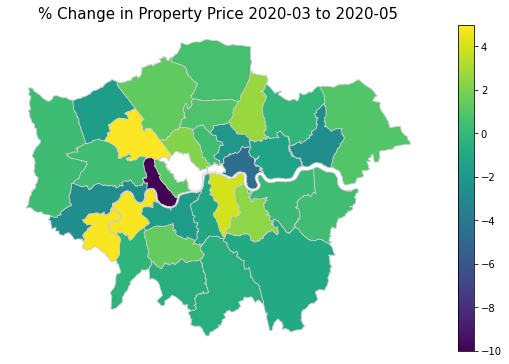

In [154]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

shapefile= "statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(shapefile)
#map_df.plot()

map_df = map_df.set_index('NAME')

merged = map_df.join(UKHPI_Combined_2020_03)

#UKHPI_Combined_2020_03

vmin, vmax = -10, 5

fig, ax = plt.subplots(1,figsize=(10,6))
merged.plot(merged['Pct Change from 2020-03 and 2020-05'], linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')
ax.set_title('% Change in Property Price 2020-03 to 2020-05', fontdict={'fontsize': '15'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

## **Construction and Validation of Models**

The variables we will be using in this model are 'newCasesBySpecimenDate' as our independent variable and 'Average price All property types' as our dependent variable.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
import numpy as np

In [51]:
total_london_covid.set_index('date', inplace=True)
total_london_covid.index = pd.to_datetime(total_london_covid.index)
total_london_covid = total_london_covid.resample('1M').sum()

monthly_total_london = total_london_covid['newCasesBySpecimenDate']

monthly_total_london

date
2020-02-29       13
2020-03-31    10150
2020-04-30    17798
2020-05-31     4381
2020-06-30       49
Freq: M, Name: newCasesBySpecimenDate, dtype: int64

In [52]:
prop_price_df.set_index('Period', inplace=True)
prop_price_df.index = pd.to_datetime(prop_price_df.index)
prop_price_df = prop_price_df.resample('1M').sum()


monthly_prop = prop_price_df['Average price All property types']

monthly_prop

Period
2020-02-29    475536
2020-03-31    482074
2020-04-30    472208
2020-05-31    469658
2020-06-30    479150
Freq: M, Name: Average price All property types, dtype: int64

Although the data set is quite small, it may be worth to analyse the results.

Firstly we must check the variables and use visualisation to determine distribution and check for outliers.

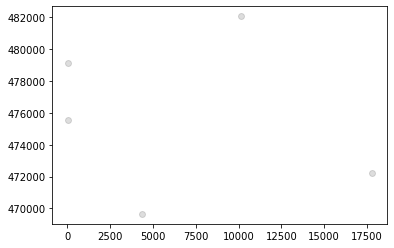

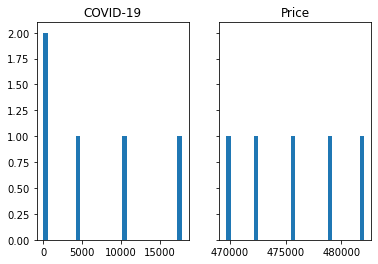

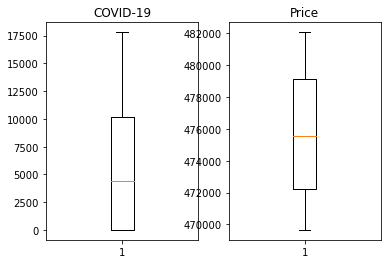

In [53]:
import matplotlib.pyplot as plt

plt.scatter(monthly_total_london,monthly_prop,c="#00000022")
plt.show()

fig,axs=plt.subplots(ncols=2,sharey=True)
axs[0].hist(monthly_total_london,bins=30)
axs[0].set_title("COVID-19")
axs[1].hist(monthly_prop,bins=30)
axs[1].set_title("Price")
plt.show()

fig,axs=plt.subplots(ncols=2)
axs[0].boxplot(monthly_total_london)
axs[0].set_title("COVID-19")
axs[1].boxplot(monthly_prop)
axs[1].set_title("Price")
plt.show()

The data is very small and therefore the scatterplot suggests a heteroscedasticity meaning there is a high likelyhood that the coefficient estimates are further from the currect value.

Merge both COVID-19 and Property data for all of London.

In [54]:
PROP_COVID_monthly = total_london_covid.join(prop_price_df)

PROP_COVID_monthly

newCasesBySpecimenDate  cumCasesBySpecimenDate  % Change  \
date                                                                   
2020-02-29                      13                      61       inf   
2020-03-31                   10150                   85014 -2.885809   
2020-04-30                   17798                  630510  1.563512   
2020-05-31                    4381                  955986  3.309309   
2020-06-30                      49                   32391  0.000000   

            Sales volume  Average price All property types  \
date                                                         
2020-02-29        6025.0                            475536   
2020-03-31        6248.0                            482074   
2020-04-30        2812.0                            472208   
2020-05-31        2578.0                            469658   
2020-06-30        3873.0                            479150   

            Percentage change (yearly) All property types  \
date                                                        
2020-02-29                                           2.03   
2020-03-31                                           3.86   
2020-04-30                                           0.57   
2020-05-31                                           1.30   
2020-06-30                                           1.83   

            Percentage change (monthly) All property types  \
date                                                         
2020-02-29                                           -0.40   
2020-03-31                                            1.37   
2020-04-30                                           -2.05   
2020-05-31                                           -0.54   
2020-06-30                                            2.02   

            House price index All property types  \
date                                               
2020-02-29                                118.04   
2020-03-31                                119.67   
2020-04-30                                117.22   
2020-05-31                                116.58   
2020-06-30                                118.94   

            Sales volume All property types  Average price Detached houses  \
date                                                                         
2020-02-29                           6025.0                         913528   
2020-03-31                           6248.0                         918509   
2020-04-30                           2812.0                         923379   
2020-05-31                           2578.0                         906086   
2020-06-30                           3873.0                         910333   

            ...  Average price New build  \
date        ...                            
2020-02-29  ...                 484234.0   
2020-03-31  ...                 500882.0   
2020-04-30  ...                 487369.0   
2020-05-31  ...                 487599.0   
2020-06-30  ...                 477585.0   

            Percentage change (yearly) New build  \
date                                               
2020-02-29                                 -1.69   
2020-03-31                                  3.73   
2020-04-30                                 -0.05   
2020-05-31                                  2.59   
2020-06-30                                  0.46   

            Percentage change (monthly) New build  \
date                                                
2020-02-29                                  -4.67   
2020-03-31                                   3.44   
2020-04-30                                  -2.70   
2020-05-31                                   0.05   
2020-06-30                                  -2.05   

            House price index New build  Sales volume New build  \
date                                                              
2020-02-29                       118.73                   787.0   
2020-03-31                       122.81           

In [55]:
# Reshape

COVID_monthly = monthly_total_london.values.reshape(-1,1)
PROP_monthly = monthly_prop.values.reshape(-1,1)

Linear regression model

In [56]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(COVID_monthly, PROP_monthly)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [476419.91168847]
slope: [[-0.10723838]]


The intercept indicates the amount which is not affected by the COVID-19 infection rate.

The slow describes how an increase in 1 COVID-19 infection would decrease the price of properties in general by £0.11p.

In [57]:
r_sq=model.score(COVID_monthly,PROP_monthly)
print("R2=",r_sq)

R2= 0.026026253009039713


The R2 value in this case it tells us that only 0.03% of the variation is captured by this linear model based on the rate of COVID-19 infections.


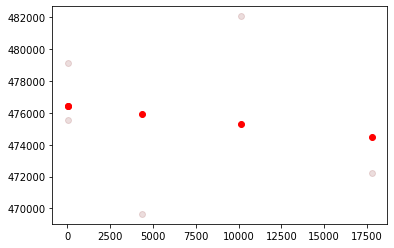

In [58]:
# Predicting property price from COVID-19 rate of transmission.

PROP_COVID_monthly['pred'] = model.predict(COVID_monthly)

plt.scatter(COVID_monthly,PROP_monthly,c="#77000022")
plt.scatter(COVID_monthly, PROP_COVID_monthly['pred'], c='red')

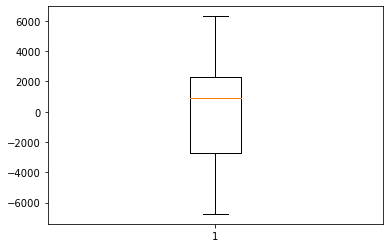

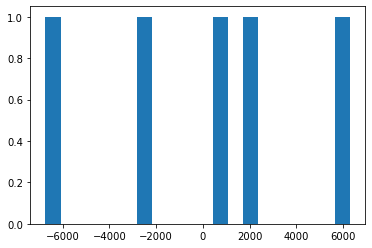

Mean 0.000000000035
Standard devation 4965.346527056216
Mean price 475725.200000000012
Median price 475536.000000000000


In [59]:
# Residuals

PROP_COVID_monthly['resid'] = PROP_COVID_monthly['pred']-PROP_COVID_monthly['Average price All property types']
plt.boxplot(PROP_COVID_monthly['resid'])
plt.show()
plt.hist(PROP_COVID_monthly['resid'],bins=20)
plt.show()
PROP_COVID_monthly['resid'].describe()
print("Mean {:.12f}".format(PROP_COVID_monthly['resid'].mean()))#More readable number
print("Standard devation {:.12f}".format(PROP_COVID_monthly['resid'].std()))#More readable number
print("Mean price {:.12f}".format(PROP_COVID_monthly['Average price All property types'].mean()))
print("Median price {:.12f}".format(PROP_COVID_monthly['Average price All property types'].median()))



Residuals are not normally distributed but does have a mean of zero, this could potentially mean that some assumptions are not violated.

**Log-Transforming Aggregated Dataset.**

Since the data is not normally distributed Log transformation may help.

In [60]:
# Since the data is not normally distributed Log transformation may help.

PROP_COVID_monthly['log_price'] = np.log(PROP_COVID_monthly['Average price All property types'])
PROP_COVID_monthly['Log Covid'] = np.log(PROP_COVID_monthly["newCasesBySpecimenDate"])
PROP_COVID_monthly



newCasesBySpecimenDate  cumCasesBySpecimenDate  % Change  \
date                                                                   
2020-02-29                      13                      61       inf   
2020-03-31                   10150                   85014 -2.885809   
2020-04-30                   17798                  630510  1.563512   
2020-05-31                    4381                  955986  3.309309   
2020-06-30                      49                   32391  0.000000   

            Sales volume  Average price All property types  \
date                                                         
2020-02-29        6025.0                            475536   
2020-03-31        6248.0                            482074   
2020-04-30        2812.0                            472208   
2020-05-31        2578.0                            469658   
2020-06-30        3873.0                            479150   

            Percentage change (yearly) All property types  \
date                                                        
2020-02-29                                           2.03   
2020-03-31                                           3.86   
2020-04-30                                           0.57   
2020-05-31                                           1.30   
2020-06-30                                           1.83   

            Percentage change (monthly) All property types  \
date                                                         
2020-02-29                                           -0.40   
2020-03-31                                            1.37   
2020-04-30                                           -2.05   
2020-05-31                                           -0.54   
2020-06-30                                            2.02   

            House price index All property types  \
date                                               
2020-02-29                                118.04   
2020-03-31                                119.67   
2020-04-30                                117.22   
2020-05-31                                116.58   
2020-06-30                                118.94   

            Sales volume All property types  Average price Detached houses  \
date                                                                         
2020-02-29                           6025.0                         913528   
2020-03-31                           6248.0                         918509   
2020-04-30                           2812.0                         923379   
2020-05-31                           2578.0                         906086   
2020-06-30                           3873.0                         910333   

            ...  Sales volume New build  Average price Existing properties  \
date        ...                                                              
2020-02-29  ...                   787.0                           476212.0   
2020-03-31  ...                   766.0                           481025.0   
2020-04-30  ...                   292.0                           471743.0   
2020-05-31  ...                   143.0                           468702.0   
2020-06-30  ...                   140.0                           481668.0   

            Percentage change (yearly) Existing properties  \
date                                                         
2020-02-29                                            2.74   
2020-03-31                                            3.98   
2020-04-30                                            0.78   
2020-05-31                                            1.22   
2020-06-30                                            2.30   

            Percentage change (monthly) Existing properties  \
date                                                          
2020-02-29                                             0.38   
2020-03-31                                             1.01   
2020-04-30                                            -1.93   


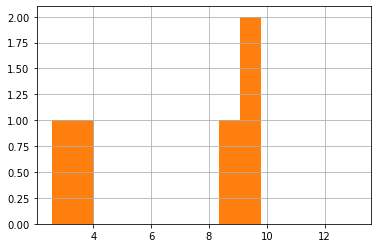

In [61]:
PROP_COVID_monthly['log_price'].hist()
PROP_COVID_monthly['Log Covid'].hist()
plt.show()

In [62]:
# Reshape again.

COVID_monthly = PROP_COVID_monthly['Log Covid'].values.reshape(-1,1)
PROP_monthly = PROP_COVID_monthly['log_price'].values.reshape(-1,1)

PROP_COVID_monthly

newCasesBySpecimenDate  cumCasesBySpecimenDate  % Change  \
date                                                                   
2020-02-29                      13                      61       inf   
2020-03-31                   10150                   85014 -2.885809   
2020-04-30                   17798                  630510  1.563512   
2020-05-31                    4381                  955986  3.309309   
2020-06-30                      49                   32391  0.000000   

            Sales volume  Average price All property types  \
date                                                         
2020-02-29        6025.0                            475536   
2020-03-31        6248.0                            482074   
2020-04-30        2812.0                            472208   
2020-05-31        2578.0                            469658   
2020-06-30        3873.0                            479150   

            Percentage change (yearly) All property types  \
date                                                        
2020-02-29                                           2.03   
2020-03-31                                           3.86   
2020-04-30                                           0.57   
2020-05-31                                           1.30   
2020-06-30                                           1.83   

            Percentage change (monthly) All property types  \
date                                                         
2020-02-29                                           -0.40   
2020-03-31                                            1.37   
2020-04-30                                           -2.05   
2020-05-31                                           -0.54   
2020-06-30                                            2.02   

            House price index All property types  \
date                                               
2020-02-29                                118.04   
2020-03-31                                119.67   
2020-04-30                                117.22   
2020-05-31                                116.58   
2020-06-30                                118.94   

            Sales volume All property types  Average price Detached houses  \
date                                                                         
2020-02-29                           6025.0                         913528   
2020-03-31                           6248.0                         918509   
2020-04-30                           2812.0                         923379   
2020-05-31                           2578.0                         906086   
2020-06-30                           3873.0                         910333   

            ...  Sales volume New build  Average price Existing properties  \
date        ...                                                              
2020-02-29  ...                   787.0                           476212.0   
2020-03-31  ...                   766.0                           481025.0   
2020-04-30  ...                   292.0                           471743.0   
2020-05-31  ...                   143.0                           468702.0   
2020-06-30  ...                   140.0                           481668.0   

            Percentage change (yearly) Existing properties  \
date                                                         
2020-02-29                                            2.74   
2020-03-31                                            3.98   
2020-04-30                                            0.78   
2020-05-31                                            1.22   
2020-06-30                                            2.30   

            Percentage change (monthly) Existing properties  \
date                                                          
2020-02-29                                             0.38   
2020-03-31                                             1.01   
2020-04-30                                            -1.93   


In [63]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(COVID_monthly, PROP_monthly)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [13.0771275]
slope: [[-0.00067593]]


After log transforming the data, an increase in COVID transmission would still see a decline in property price, however, by a much smaller amount of £0.001.

In [64]:
r_sq=model.score(COVID_monthly,PROP_monthly)
print("R2=",r_sq)

R2= 0.04465222934941926


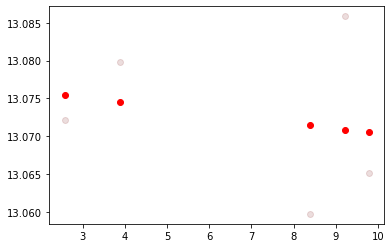

In [65]:
# Predicting property price from COVID-19 rate of transmission.

PROP_COVID_monthly['pred'] = model.predict(COVID_monthly)

plt.scatter(COVID_monthly,PROP_monthly,c="#77000022")
plt.scatter(COVID_monthly, PROP_COVID_monthly['pred'], c='red')

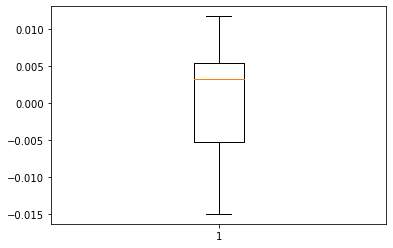

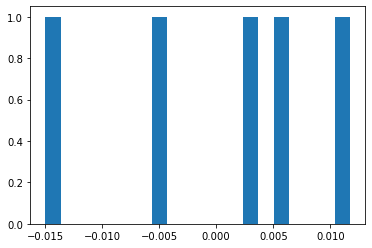

Mean 0.000000000000
Standard devation 0.010334567664
Mean price 13.072550930115
Median price 13.072197867881


In [66]:
# Residuals

PROP_COVID_monthly['resid'] = PROP_COVID_monthly['pred']-PROP_COVID_monthly['log_price']
plt.boxplot(PROP_COVID_monthly['resid'])
plt.show()
plt.hist(PROP_COVID_monthly['resid'],bins=20)
plt.show()
PROP_COVID_monthly['resid'].describe()
print("Mean {:.12f}".format(PROP_COVID_monthly['resid'].mean()))#More readable number
print("Standard devation {:.12f}".format(PROP_COVID_monthly['resid'].std()))
print("Mean price {:.12f}".format(PROP_COVID_monthly['log_price'].mean()))
print("Median price {:.12f}".format(PROP_COVID_monthly['log_price'].median()))



The sample size in these cases are quite small so it is not the most useful model, however it does provide some analytical insight.

In [67]:
PROP_COVID_monthly

newCasesBySpecimenDate  cumCasesBySpecimenDate  % Change  \
date                                                                   
2020-02-29                      13                      61       inf   
2020-03-31                   10150                   85014 -2.885809   
2020-04-30                   17798                  630510  1.563512   
2020-05-31                    4381                  955986  3.309309   
2020-06-30                      49                   32391  0.000000   

            Sales volume  Average price All property types  \
date                                                         
2020-02-29        6025.0                            475536   
2020-03-31        6248.0                            482074   
2020-04-30        2812.0                            472208   
2020-05-31        2578.0                            469658   
2020-06-30        3873.0                            479150   

            Percentage change (yearly) All property types  \
date                                                        
2020-02-29                                           2.03   
2020-03-31                                           3.86   
2020-04-30                                           0.57   
2020-05-31                                           1.30   
2020-06-30                                           1.83   

            Percentage change (monthly) All property types  \
date                                                         
2020-02-29                                           -0.40   
2020-03-31                                            1.37   
2020-04-30                                           -2.05   
2020-05-31                                           -0.54   
2020-06-30                                            2.02   

            House price index All property types  \
date                                               
2020-02-29                                118.04   
2020-03-31                                119.67   
2020-04-30                                117.22   
2020-05-31                                116.58   
2020-06-30                                118.94   

            Sales volume All property types  Average price Detached houses  \
date                                                                         
2020-02-29                           6025.0                         913528   
2020-03-31                           6248.0                         918509   
2020-04-30                           2812.0                         923379   
2020-05-31                           2578.0                         906086   
2020-06-30                           3873.0                         910333   

            ...  Sales volume New build  Average price Existing properties  \
date        ...                                                              
2020-02-29  ...                   787.0                           476212.0   
2020-03-31  ...                   766.0                           481025.0   
2020-04-30  ...                   292.0                           471743.0   
2020-05-31  ...                   143.0                           468702.0   
2020-06-30  ...                   140.0                           481668.0   

            Percentage change (yearly) Existing properties  \
date                                                         
2020-02-29                                            2.74   
2020-03-31                                            3.98   
2020-04-30                                            0.78   
2020-05-31                                            1.22   
2020-06-30                                            2.30   

            Percentage change (monthly) Existing properties  \
date                                                          
2020-02-29                                             0.38   
2020-03-31                                             1.01   
2020-04-30                                            -1.93   


In [68]:
import scipy.stats as stats

col1 = PROP_COVID_monthly['newCasesBySpecimenDate'];
col2 = PROP_COVID_monthly['Average price All property types'];

#col1 = PROP_COVID_monthly['Log Covid'];
#col2 = PROP_COVID_monthly['log_price'];

slope, intercept, r_value, p_value, std_err = stats.linregress(col1, col2)

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", p_value)
print ("std_err: ", std_err)



Slope:  -0.10723838233895429
Intercept:  476419.91168846824
p_value:  0.7954871760261921
std_err:  0.37875417479012097


Just another way to model the data, the slope indicates that for ever increase of 1 in COVID-19, the average price of all property types in London goes down by £0.11.

There is a very small difference between Log-transformed data and not.

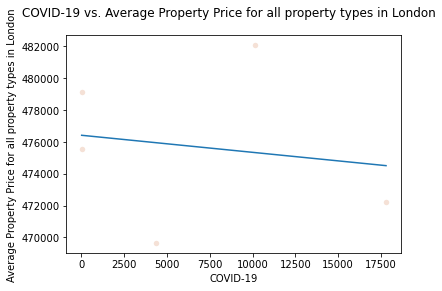

In [69]:
import numpy as np
import matplotlib.pyplot as plt

x1=col1.min() 
x2=col1.max() 
y1=x1*slope + intercept 
y2=x2*slope + intercept 

#Plot a scatterplot
plt.suptitle('COVID-19 vs. Average Property Price for all property types in London')
plt.xlabel('COVID-19')
plt.ylabel('Average Property Price for all property types in London')
plt.scatter(col1,col2 , c = "#D06B36", s = 30, alpha = 0.2, linewidth=0)


plt.plot([x1,x2],[y1,y2])


As there are not many values in the dataset the line does not seem to fit too well. This could also be due to there not being a linear relationship. Below we will try to fit a polynomial curve and see if there is a better fit.

Text(0, 0.5, 'Average Property Price')

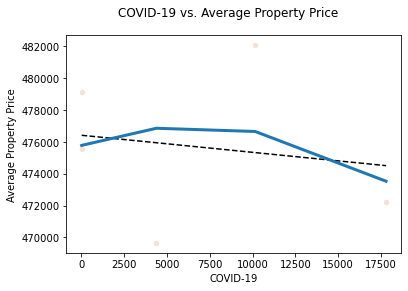

In [70]:
pCoeff = np.polyfit(col1, col2, 2)

xs = np.sort(col1)
ys = np.polyval(pCoeff, xs)


plt.scatter(col1,col2 , c = "#D06B36", s = 30, alpha = 0.2, linewidth=0)
plt.plot([x1,x2],[y1,y2], "k--")
plt.plot(xs, ys, linewidth = 3, fillstyle="none")
plt.suptitle('COVID-19 vs. Average Property Price')
plt.xlabel('COVID-19')
plt.ylabel('Average Property Price')


Polynomial curve fits better however due to the lack of data points in this data set the model is not very good. 

Below we will look at building a model using a cross sectional approach, more specifically building a linear regression model for a specific point in time, the height of COVID-19 infection rate.

**Cross-Sectional Approach**

In [71]:
# Prop data for 2020-04-01, the peak of covid infection.
prop_2020_04 = UKHPI_Combined.loc[(UKHPI_Combined.Period == '2020-04-01')] 
prop_2020_04 = prop_2020_04.drop([3080]) # Removed invalid entry London
prop_2020_04 = prop_2020_04.drop([891])  # Removed city of london due to duplicate.
prop_2020_04 = prop_2020_04.drop([1661]) # Removed Hackney due to conflict.
prop_2020_04 = prop_2020_04.drop([1019]) # Removed City of Westminster due to duplicate entry.

prop_2020_04['Name'] = prop_2020_04['Name'].replace({'City of Westminster':'Westminster'}) # Rename City of Westminster to Westminster so it matches COVID-19 Data.

prop_2020_04.shape
#prop_2020_04['Name'].unique()
#prop_2020_04

(31, 56)

In [72]:
# COVID data for 2020-04-01, the peak of covid infection.
COVID_2020_04 = COVID_Combined.loc[(COVID_Combined.date == '01/04/2020')] 
COVID_2020_04 = COVID_2020_04.drop([1671]) # Removed City of london/Hackney due to conflict.


COVID_2020_04.shape
#COVID_2020_04['areaName'].unique()
#COVID_2020_04

(31, 6)

In [73]:
prop_2020_04_index = prop_2020_04.set_index('Name') # Indexing by borough name to allow for easier merging.
COVID_2020_04_index = COVID_2020_04.set_index('areaName') # Indexing by borough name to allow for easier merging.

#COVID_2020_04_index
#prop_2020_04_index

PROP_COVID_2020_04 = COVID_2020_04_index.join(prop_2020_04_index)

PROP_COVID_2020_04.head()
#PROP_COVID_2020_04.index # Ensure there are no duplicates.

areaType   areaCode       date  newCasesBySpecimenDate  \
areaName                                                                      
Barking and Dagenham     ltla  E09000002 2020-01-04                      22   
Barnet                   ltla  E09000003 2020-01-04                      37   
Bexley                   ltla  E09000004 2020-01-04                      30   
Brent                    ltla  E09000005 2020-01-04                      56   
Bromley                  ltla  E09000006 2020-01-04                      49   

                      cumCasesBySpecimenDate  \
areaName                                       
Barking and Dagenham                     186   
Barnet                                   591   
Bexley                                   234   
Brent                                    643   
Bromley                                  463   

                                                                    URI  \
areaName                                                                  
Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
Barnet                 http://landregistry.data.gov.uk/id/region/barnet   
Bexley                 http://landregistry.data.gov.uk/id/region/bexley   
Brent                   http://landregistry.data.gov.uk/id/region/brent   
Bromley               http://landregistry.data.gov.uk/id/region/bromley   

                     Region GSS code     Period  Sales volume  \
areaName                                                        
Barking and Dagenham       E09000002 2020-04-01          48.0   
Barnet                     E09000003 2020-04-01         105.0   
Bexley                     E09000004 2020-04-01          93.0   
Brent                      E09000005 2020-04-01          48.0   
Bromley                    E09000006 2020-04-01         125.0   

                     Reporting period  ...  \
areaName                               ...   
Barking and Dagenham          monthly  ...   
Barnet                        monthly  ...   
Bexley                        monthly  ...   
Brent                         monthly  ...   
Bromley                       monthly  ...   

                      Percentage change (yearly) New build  \
areaName                                                     
Barking and Dagenham                                 -0.14   
Barnet                                                3.61   
Bexley                                                2.13   
Brent                                                -5.48   
Bromley                                               0.80   

                      Percentage change (monthly) New build  \
areaName                                                      
Barking and Dagenham                                  -2.50   
Barnet                                                 1.16   
Bexley                                                 0.62   
Brent                                                  0.81   
Bromley                                                0.58   

                      House price index New build  Sales volume New build  \
areaName                                                                    
Barking and Dagenham                       138.74                     2.0   
Barnet                                     121.12                     1.0   
Bexley                                     137.03                     2.0   
Brent                                      113.61                     3.0   
Bromley                                    121.45                     7.0   

                      Average price Existing properties  \
areaName                                                  
Barking and Dagenham                           290191.0   
Barnet                                         528401.0   
Bexley                                         343432.0   
Brent                                          474612.0   
Bromley                                        434063.

**Original data (Not transformed)**

In [74]:
col1 = PROP_COVID_2020_04['cumCasesBySpecimenDate'] # As this is a cross sectional analysis cumulative cases to date was selected as the independent variable as this the cases to date.
col2 = PROP_COVID_2020_04['Average price All property types'] # Average property price was selected as the dependant variable as we want to see how COVID-19 has affected property prices.


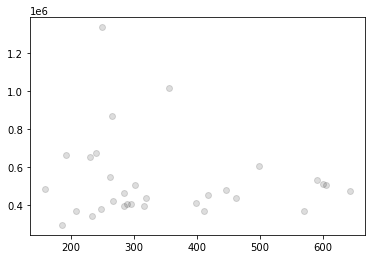

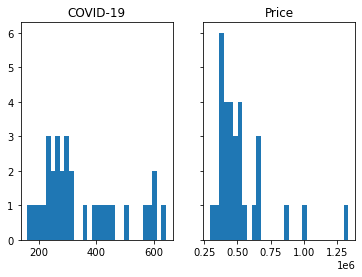

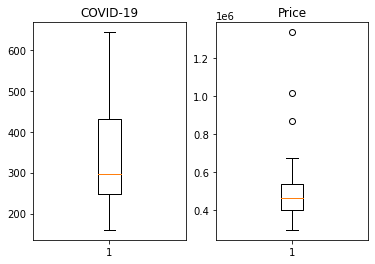

In [75]:
import matplotlib.pyplot as plt

plt.scatter(col1,col2,c="#00000022")
plt.show()

fig,axs=plt.subplots(ncols=2,sharey=True)
axs[0].hist(col1,bins=30)
axs[0].set_title("COVID-19")
axs[1].hist(col2,bins=30)
axs[1].set_title("Price")
plt.show()

fig,axs=plt.subplots(ncols=2)
axs[0].boxplot(col1)
axs[0].set_title("COVID-19")
axs[1].boxplot(col2)
axs[1].set_title("Price")
plt.show()

In [76]:
import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(col1, col2)

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", p_value)
print ("std_err: ", std_err)

Slope:  -165.99986743803788
Intercept:  579937.0181536519
p_value:  0.5624683298792793
std_err:  283.31949219410797


The slope in this case indicates that an increase of 1 new COVID-19 infection would reduce the average property price by £166.

The p_value is showing that there is a significant difference between the means.

The standard of error of the regression slope represents the average distance that the observed values deviate from the regression line, in this case there is a large distance, this is something that log-transforming the data may help with.

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(PROP_COVID_2020_04[["cumCasesBySpecimenDate"]],PROP_COVID_2020_04['Average price All property types'])
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 579937.0181536519
slope: [-165.99986744]


In [78]:
r_sq=model.score(PROP_COVID_2020_04[["cumCasesBySpecimenDate"]],PROP_COVID_2020_04['Average price All property types'])
print("R2=",r_sq)

R2= 0.011699134950080237


The r2 tells us that only 0.01% of the variation captured by the model can be explained by COVID-19.

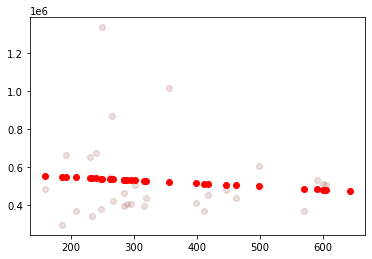

In [79]:
# Predicting the price based on COVID-19 levels.

PROP_COVID_2020_04['pred'] = model.predict(PROP_COVID_2020_04[["cumCasesBySpecimenDate"]])

plt.scatter(PROP_COVID_2020_04["cumCasesBySpecimenDate"],PROP_COVID_2020_04['Average price All property types'],c="#77000022")
plt.scatter(PROP_COVID_2020_04['cumCasesBySpecimenDate'], PROP_COVID_2020_04['pred'],c="red")



Text(0, 0.5, 'Average Property Price')

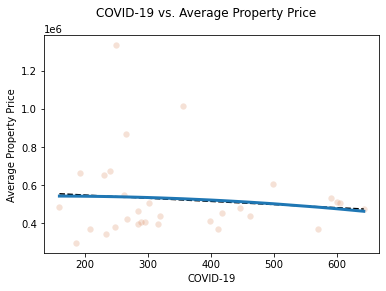

In [80]:
x1=PROP_COVID_2020_04['cumCasesBySpecimenDate'].min() # min value of the independent variable
x2=PROP_COVID_2020_04['cumCasesBySpecimenDate'].max() 
y1=x1*slope + intercept # calculate the dependent variable value from x1
y2=x2*slope + intercept 


pCoeff = np.polyfit(PROP_COVID_2020_04['cumCasesBySpecimenDate'], PROP_COVID_2020_04['Average price All property types'], 2)

xs = np.sort(PROP_COVID_2020_04['cumCasesBySpecimenDate'])

ys = np.polyval(pCoeff, xs)


plt.scatter(PROP_COVID_2020_04['cumCasesBySpecimenDate'],PROP_COVID_2020_04['Average price All property types'] , c = "#D06B36", s = 40, alpha = 0.2, linewidth=0)
plt.plot([x1,x2],[y1,y2], "k--")
plt.plot(xs, ys, linewidth = 3, fillstyle="none")
plt.suptitle('COVID-19 vs. Average Property Price')
plt.xlabel('COVID-19')
plt.ylabel('Average Property Price')

This model is predicting that as COVID-19 continues to rise, property price should fall but not drastically.

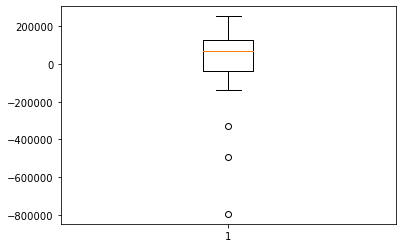

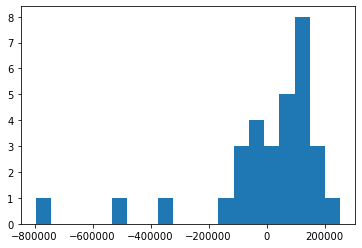

Mean -0.000000000006
Standard devation 213010.691872642929
Mean price 521879.903225806425
Median price 464143.000000000000


In [81]:
# Have a look at the residuals

PROP_COVID_2020_04['resid'] = PROP_COVID_2020_04['pred']-PROP_COVID_2020_04['Average price All property types']
plt.boxplot(PROP_COVID_2020_04['resid'])
plt.show()
plt.hist(PROP_COVID_2020_04['resid'],bins=20)
plt.show()
PROP_COVID_2020_04['resid'].describe()
print("Mean {:.12f}".format(PROP_COVID_2020_04['resid'].mean()))#More readable number
print("Standard devation {:.12f}".format(PROP_COVID_2020_04['resid'].std()))#More readable number
print("Mean price {:.12f}".format(PROP_COVID_2020_04['Average price All property types'].mean()))
print("Median price {:.12f}".format(PROP_COVID_2020_04['Average price All property types'].median()))


Residuals are the difference between the observed and the modelled data. With exceptions of a few outliers the data is somewhat normally distributed (this may improve if the data was log transformed).

**Log-Transformed**

Data is quite skewed therefore we will log-transform the data to see if it improves the distribution of the data.

In [82]:
PROP_COVID_2020_04['log_price'] = np.log(PROP_COVID_2020_04['Average price All property types'])
PROP_COVID_2020_04['Log Covid'] = np.log(PROP_COVID_2020_04["cumCasesBySpecimenDate"])
PROP_COVID_2020_04.head()

areaType   areaCode       date  newCasesBySpecimenDate  \
areaName                                                                      
Barking and Dagenham     ltla  E09000002 2020-01-04                      22   
Barnet                   ltla  E09000003 2020-01-04                      37   
Bexley                   ltla  E09000004 2020-01-04                      30   
Brent                    ltla  E09000005 2020-01-04                      56   
Bromley                  ltla  E09000006 2020-01-04                      49   

                      cumCasesBySpecimenDate  \
areaName                                       
Barking and Dagenham                     186   
Barnet                                   591   
Bexley                                   234   
Brent                                    643   
Bromley                                  463   

                                                                    URI  \
areaName                                                                  
Barking and Dagenham  http://landregistry.data.gov.uk/id/region/bark...   
Barnet                 http://landregistry.data.gov.uk/id/region/barnet   
Bexley                 http://landregistry.data.gov.uk/id/region/bexley   
Brent                   http://landregistry.data.gov.uk/id/region/brent   
Bromley               http://landregistry.data.gov.uk/id/region/bromley   

                     Region GSS code     Period  Sales volume  \
areaName                                                        
Barking and Dagenham       E09000002 2020-04-01          48.0   
Barnet                     E09000003 2020-04-01         105.0   
Bexley                     E09000004 2020-04-01          93.0   
Brent                      E09000005 2020-04-01          48.0   
Bromley                    E09000006 2020-04-01         125.0   

                     Reporting period  ...  Average price Existing properties  \
areaName                               ...                                      
Barking and Dagenham          monthly  ...                           290191.0   
Barnet                        monthly  ...                           528401.0   
Bexley                        monthly  ...                           343432.0   
Brent                         monthly  ...                           474612.0   
Bromley                       monthly  ...                           434063.0   

                      Percentage change (yearly) Existing properties  \
areaName                                                               
Barking and Dagenham                                           -0.22   
Barnet                                                          3.66   
Bexley                                                          1.15   
Brent                                                          -2.81   
Bromley                                                         0.78   

                      Percentage change (monthly) Existing properties  \
areaName                                                                
Barking and Dagenham                                            -2.27   
Barnet                                                           1.31   
Bexley                                                           1.11   
Brent                                                            1.59   
Bromley                                                          0.56   

                      House price index Existing properties  \
areaName                                                      
Barking and Dagenham                                 133.66   
Barnet                                               114.30   
Bexley                                               130.63   
Brent                                                111.27   
Bromley                                              116.48   

                      Sales volume Existing properties  Pivotable date  \
areaName                                       

In [83]:
col1_log = PROP_COVID_2020_04['Log Covid'] 
col2_log = PROP_COVID_2020_04['log_price']

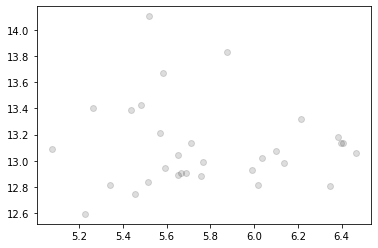

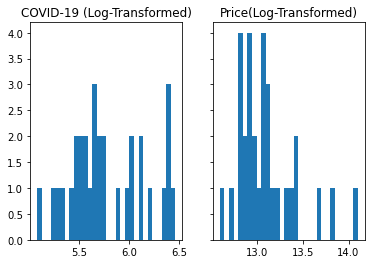

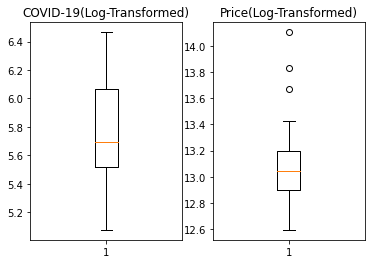

In [84]:
import matplotlib.pyplot as plt

plt.scatter(col1_log,col2_log,c="#00000022")
plt.show()

fig,axs=plt.subplots(ncols=2,sharey=True)
axs[0].hist(col1_log,bins=30)
axs[0].set_title("COVID-19 (Log-Transformed)")
axs[1].hist(col2_log,bins=30)
axs[1].set_title("Price(Log-Transformed)")
plt.show()

fig,axs=plt.subplots(ncols=2)
axs[0].boxplot(col1_log)
axs[0].set_title("COVID-19(Log-Transformed)")
axs[1].boxplot(col2_log)
axs[1].set_title("Price(Log-Transformed)")
plt.show()

Log-transforming the data has improved the summetry within the data and led to a more normal distribution.

However, this will make the model more difficult to interpret, therefore we will create a linear regression model for both the log-transformed data and the original data.

In [85]:
col1_log = PROP_COVID_2020_04['Log Covid'] 
col2_log = PROP_COVID_2020_04['log_price']

In [86]:
import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(PROP_COVID_2020_04['Log Covid'] , PROP_COVID_2020_04['log_price'])

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", p_value)
print ("std_err: ", std_err)

Slope:  -0.035302924987727996
Intercept:  13.31067863428093
p_value:  0.8236740359564036
std_err:  0.15700765665215766


In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(PROP_COVID_2020_04[['Log Covid']],PROP_COVID_2020_04['log_price'])
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 13.31067863428093
slope: [-0.03530292]


After log transforming the data the slope is now considerably smaller, indicating that a change in COVD-19 has a significantly smaller impact on property price than the previous model would suggest.

In [88]:
r_sq=model.score(PROP_COVID_2020_04[['Log Covid']],PROP_COVID_2020_04['log_price'])
print("R2=",r_sq)

R2= 0.0017403045484692958


After log tranforming the data the r2 tells us that only 0.002% of the variation captured by the model can be explained by COVID-19. Considerably smaller than the previous non-transformed model.

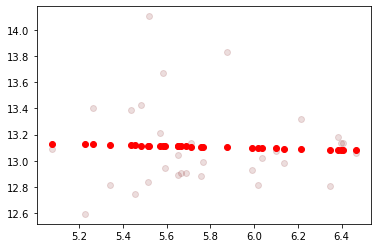

In [89]:
# Predicting the price based on COVID-19 levels.

PROP_COVID_2020_04['pred_log'] = model.predict(PROP_COVID_2020_04[["Log Covid"]])

plt.scatter(PROP_COVID_2020_04["Log Covid"],PROP_COVID_2020_04['log_price'],c="#77000022")
plt.scatter(PROP_COVID_2020_04['Log Covid'], PROP_COVID_2020_04['pred_log'],c="red")


Text(0, 0.5, 'Average Property Price (Log-Transformed)')

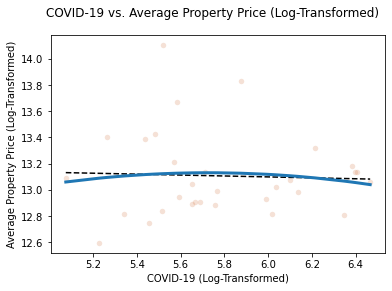

In [90]:
x1=PROP_COVID_2020_04['Log Covid'].min() 
x2=PROP_COVID_2020_04['Log Covid'].max() 
y1=x1*slope + intercept 
y2=x2*slope + intercept 


pCoeff = np.polyfit(PROP_COVID_2020_04['Log Covid'], PROP_COVID_2020_04['log_price'], 2)


xs = np.sort(PROP_COVID_2020_04['Log Covid'])


ys = np.polyval(pCoeff, xs)


plt.scatter(PROP_COVID_2020_04['Log Covid'],PROP_COVID_2020_04['log_price'] , c = "#D06B36", s = 30, alpha = 0.2, linewidth=0)


plt.plot([x1,x2],[y1,y2], "k--")

plt.plot(xs, ys, linewidth = 3, fillstyle="none")
plt.suptitle('COVID-19 vs. Average Property Price (Log-Transformed)')
plt.xlabel('COVID-19 (Log-Transformed)')
plt.ylabel('Average Property Price (Log-Transformed)')

When predicting the property price based on COVID-19 levels there is a negative correlation and both log-transformed and not transformed models indicate a small decrease in property price as COVID-19 increases.

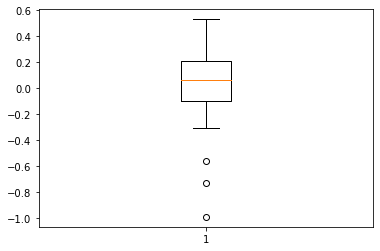

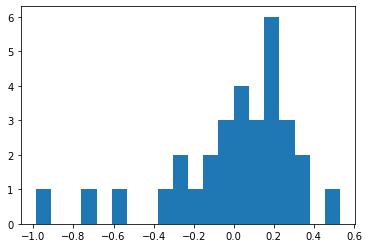

Mean -0.000000000000
Standard devation 0.324303456407
Mean price 13.106467270086
Median price 13.047947973383


In [91]:
# Have a look at the residuals

PROP_COVID_2020_04['resid_log'] = PROP_COVID_2020_04['pred_log']-PROP_COVID_2020_04['log_price']
plt.boxplot(PROP_COVID_2020_04['resid_log'])
plt.show()
plt.hist(PROP_COVID_2020_04['resid_log'],bins=20)
plt.show()
PROP_COVID_2020_04['resid_log'].describe()
print("Mean {:.12f}".format(PROP_COVID_2020_04['resid_log'].mean()))#More readable number
print("Standard devation {:.12f}".format(PROP_COVID_2020_04['resid_log'].std()))#More readable number
print("Mean price {:.12f}".format(PROP_COVID_2020_04['log_price'].mean()))
print("Median price {:.12f}".format(PROP_COVID_2020_04['log_price'].median()))


After log transforming the data, the distribution of the data is slightly more normal than before and still has a mean of zero which is a good sign, demonstrating that some of the key assumptions are not violated.

The standard deviation is also better in comparison with the non log-transformed model as it is much smaller in comparison with the mean price.

#### **Validation of Results**

K-Fold Cross Validation on non-transformed data

In [92]:
# Cross validation of non-transformed data
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import scipy.stats as stats
import numpy as np

dependent  = PROP_COVID_2020_04['Average price All property types'] # Average property price was selected as the dependant variable as we want to see how COVID-19 has affected property prices.
independent = PROP_COVID_2020_04['cumCasesBySpecimenDate'] # As this is a cross sectional analysis cumulative cases to date was selected as the independent variable as this the cases to date.


-------- Run:  0
Slope:  -192.02724960941396 Intercept:  599449.706038294 r_value:  -0.10204796682391498 p_value:  0.6351542950448555 std_err:  399.09288263950396
Average residuals 149299.7612284584
-------- Run:  1
Slope:  -151.3038810957038 Intercept:  583172.225633731 r_value:  -0.09749866110837191 p_value:  0.6429036929472763 std_err:  322.04267500749415
Average residuals 86747.58498186724
-------- Run:  2
Slope:  -58.28251877018467 Intercept:  523143.0887643467 r_value:  -0.05060255733444793 p_value:  0.810165088636485 std_err:  239.8530161977339
Average residuals 223871.66351880925
-------- Run:  3
Slope:  -135.51455218724587 Intercept:  579157.2455343619 r_value:  -0.08221012029743945 p_value:  0.6960420910639837 std_err:  342.5501486266174
Average residuals 90221.49391449963
-------- Run:  4
Slope:  -275.90155882977444 Intercept:  604922.6958103658 r_value:  -0.18296228498499228 p_value:  0.38135654319784973 std_err:  309.12573521877385
Average residuals 169676.70770161218


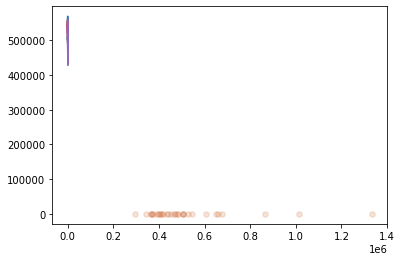

In [94]:
kf = KFold(n_splits=5)
foldCount = 0
plt.scatter(dependent,independent , c = "#D06B36", s = 30, alpha = 0.2)
for train_idxs, test_idxs in kf.split(PROP_COVID_2020_04):

    print("-------- Run: ", foldCount )
    dependentTrain = dependent[train_idxs]
    independentTrain = independent[train_idxs]
    dependentTest = dependent[test_idxs]
    independentTest = independent[test_idxs]

   
    slope, intercept, r_value, p_value, std_err = stats.linregress(independentTrain, dependentTrain)
    predTrain  = independentTrain*slope + intercept
    plt.plot(independentTrain,predTrain)
    print ("Slope: ", slope, "Intercept: ", intercept, "r_value: ", r_value, "p_value: ", p_value,"std_err: ", std_err)

    
    predTest = slope * independentTest + intercept
    residuals = dependentTest - predTest
    print ("Average residuals",np.average(residuals.abs()))
    foldCount += 1 
    

K-Fold Cross Validation on log-transformed data

In [95]:
# Cross validation of log-transformed data
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import scipy.stats as stats
import numpy as np

dependent  = PROP_COVID_2020_04['log_price']; 
independent = PROP_COVID_2020_04['Log Covid']; 

-------- Run:  0
Slope:  -0.08330208343181492 Intercept:  13.613480295113881 r_value:  -0.08884162118861318 p_value:  0.6797407730009697 std_err:  0.19911654202255064
Average residuals 0.288888673340547
-------- Run:  1
Slope:  -0.010204502211117298 Intercept:  13.170842592771395 r_value:  -0.012030799213537542 p_value:  0.9544844939610204 std_err:  0.17684875027524244
Average residuals 0.1620922879418464
-------- Run:  2
Slope:  0.021941539466089507 Intercept:  12.954589270859561 r_value:  0.02903056152832025 p_value:  0.8904378733148514 std_err:  0.15753050234481858
Average residuals 0.327522874641172
-------- Run:  3
Slope:  0.0157294373565149 Intercept:  13.026601370494648 r_value:  0.01749329166809744 p_value:  0.933855854166242 std_err:  0.1874611480241831
Average residuals 0.1640533396754226
-------- Run:  4
Slope:  -0.11456946073498288 Intercept:  13.745036781929503 r_value:  -0.14009383211516227 p_value:  0.5041887164684745 std_err:  0.16884249685551375
Average residuals 0.264

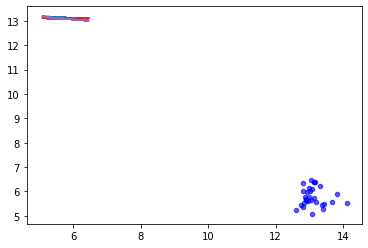

In [96]:
kf = KFold(n_splits=5)
foldCount = 0
plt.scatter(dependent,independent , c = "b", s = 20, alpha = 0.65)
for train_idxs, test_idxs in kf.split(PROP_COVID_2020_04):
    print("-------- Run: ", foldCount )
    dependentTrain = dependent[train_idxs]
    independentTrain = independent[train_idxs]
    dependentTest = dependent[test_idxs]
    independentTest = independent[test_idxs]


    slope, intercept, r_value, p_value, std_err = stats.linregress(independentTrain, dependentTrain)
    predTrain  = independentTrain*slope + intercept
    plt.plot(independentTrain,predTrain)
    print ("Slope: ", slope, "Intercept: ", intercept, "r_value: ", r_value, "p_value: ", p_value,"std_err: ", std_err)

    
    predTest = slope * independentTest + intercept
    residuals = dependentTest - predTest
    print ("Average residuals",np.average(residuals.abs()))
    foldCount += 1 
    